# 本project目標

1. 定義 Label
 * 1. Only use CBI1, CBI2, HADS_A, HADAS_B
 * 2. Define for high and low (below) 
    ```
      CBI >= 16
      HADS >= 8
    ```
2. EDA/ plot

3. feature selection (extraction 已做好) + Classfied + Plot margin and confussion matrix



In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# dataprocess

In [2]:
df_feature = pd.read_excel("Features.xlsx")
df_feature
# # dropna 補齊excel格式跑掉
df_feature_cl = df_feature.dropna()
df_feature_cl = df_feature_cl.rename(columns=  {'Unnamed: 0':'Name'})
df_feature_cl =  df_feature_cl.set_index('Name')
df_feature_cl.head()

CH1_Oxy_Task_begin_slope  CH1_Deoxy_Task_begin_slope  \
Name                                                             
Aak                       0.024819                   -0.013657   
Amiya                     0.035790                   -0.035772   
April                     0.019041                   -0.044347   
Archetto                  0.016882                   -0.028790   
Ash                       0.068736                    0.065589   

          CH2_Oxy_Task_begin_slope  CH2_Deoxy_Task_begin_slope  \
Name                                                             
Aak                       0.011554                   -0.009824   
Amiya                    -0.006235                    0.020678   
April                    -0.012907                   -0.014942   
Archetto                  0.011429                   -0.035307   
Ash                       0.057870                   -0.034063   

          CH3_Oxy_Task_begin_slope  CH3_Deoxy_Task_begin_slope  \
Name                                                             
Aak                       0.012998                   -0.020968   
Amiya                     0.020728                    0.019056   
April                     0.014461                   -0.013636   
Archetto                  0.004710                   -0.004605   
Ash                       0.048478                   -0.021619   

          CH1_Oxy_stage_Recovery_slope  CH1_Deoxy_stage_Recovery_slope  \
Name                                                                     
Aak                           0.022015                       -0.047618   
Amiya                        -0.031904                        0.031897   
April                        -0.008208                        0.014011   
Archetto                     -0.031117                        0.006936   
Ash                           0.010310                        0.006476   

          CH2_Oxy_stage_Recovery_slope  CH2_Deoxy_stage_Recovery_slope  ...  \
Name                                                                    ...   
Aak                           0.057992                        0.007034  ...   
Amiya                        -0.026799                       -0.047282  ...   
April                        -0.010022                       -0.009350  ...   
Archetto                     -0.045191                       -0.013461  ...   
Ash                           0.007697                        0.004553  ...   

          CH3_Oxy Second Freq  CH3_Oxy Second Amp  CH3_Oxy Third Freq  \
Name                                                                    
Aak                  0.099723            0.045054            0.116343   
Amiya                0.091413            0.060163            0.049861   
April                0.058091            0.016478            0.082988   
Archetto             0.041522            0.048479            0.083045   
Ash                  0.049827            0.064042            0.132872   

          CH3_Oxy Third Amp  CH3_Deoxy First Freq  CH3_Deoxy First Amp  \
Name                                                                     
Aak                0.018806              0.033241             0.066239   
Amiya              0.045932              0.024931             0.201037   
April              0.016365              0.033195             0.091326   
Archetto           0.036470              0.041522             0.042617   
Ash                0.016568              0.024913             0.121502   

          CH3_Deoxy Second Freq  CH3_Deoxy Second Amp  CH3_Deoxy Third Freq  \
Name                                                                          
Aak                    0.074792              0.033351              0.091413   
Amiya                  0.049861              0.026774              0.074792   
April                  0.049793              0.086211              0.074689   
Archetto               0.024913              0.027272              0.107958   
Ash                    0.041522            

In [3]:
# 確認乾淨
print(df_feature_cl.shape)
print(df_feature_cl.isna().sum())

df_feature_cl.shape

(37, 168)
CH1_Oxy_Task_begin_slope      0
CH1_Deoxy_Task_begin_slope    0
CH2_Oxy_Task_begin_slope      0
CH2_Deoxy_Task_begin_slope    0
CH3_Oxy_Task_begin_slope      0
                             ..
CH3_Deoxy First Amp           0
CH3_Deoxy Second Freq         0
CH3_Deoxy Second Amp          0
CH3_Deoxy Third Freq          0
CH3_Deoxy Third Amp           0
Length: 168, dtype: int64


(37, 168)

In [4]:
# 讀label
df_label = pd.read_excel("label.xlsx")
df_label = df_label.T
df_label.columns = df_label.iloc[0]
df_label = df_label.iloc[1:]
df_label = df_label.drop(columns= ['CBI_3', 'CBI_4'])
print(df_label.shape)
df_label.head()

(39, 8)


Name                       CBI_1 CBI_2 A score D score Gender   Age Seniority  \
Carnelian                   14.0  15.0     8.0     6.0    0.0  35.0      12.0   
Kal'tsit                      19    22       1       0      0    33        12   
Skadi-the-Corrupting-Heart    21    25       3       8      1    34        13   
Gladiia                       12    16      10       4      0    36        15   
Ash                           15    15       8      10      1    42        15   

Name                       Educate  
Carnelian                      4.0  
Kal'tsit                         5  
Skadi-the-Corrupting-Heart       4  
Gladiia                          5  
Ash                              4

In [5]:
def change(x):
    if x >= 16:
        return 1
    else:
        return 0

def change_hade(x):
    if x >= 8:
        return 1
    else:
        return 0       

change_list = ["CBI_1", "CBI_2"]

for col in change_list:
    df_label[col + "_label"] = df_label[col].apply(change)
    df_label.drop(columns= col, inplace= True)

change_list2 = ["A score", "D score"]

for col in change_list2:
    df_label[col + "_label"] = df_label[col].apply(change_hade)
    df_label.drop(columns= col, inplace= True)

df_label.head()

Name                       Gender   Age Seniority Educate  CBI_1_label  \
Carnelian                     0.0  35.0      12.0     4.0            0   
Kal'tsit                        0    33        12       5            1   
Skadi-the-Corrupting-Heart      1    34        13       4            1   
Gladiia                         0    36        15       5            0   
Ash                             1    42        15       4            0   

Name                        CBI_2_label  A score_label  D score_label  
Carnelian                             0              1              0  
Kal'tsit                              1              0              0  
Skadi-the-Corrupting-Heart            1              0              1  
Gladiia                               1              1              0  
Ash                                   0              1              1

# boxplot


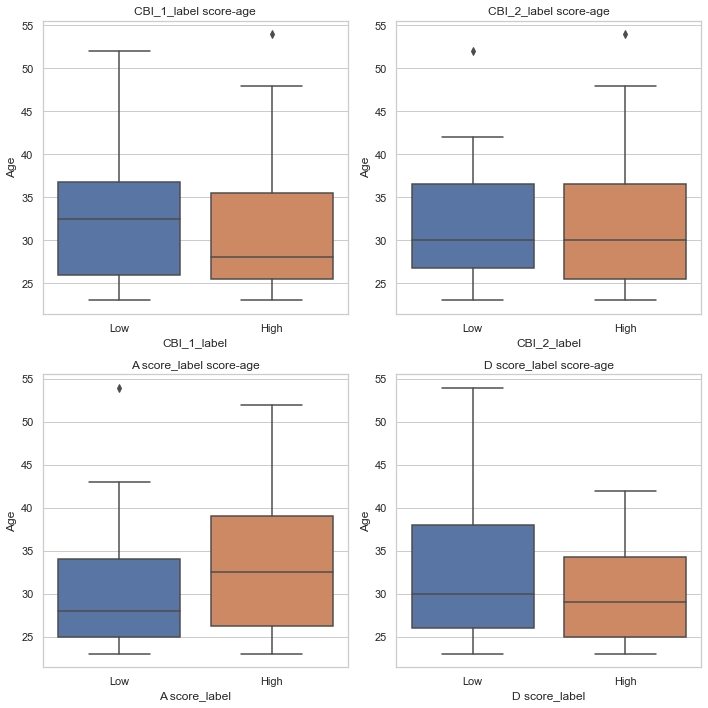

In [8]:
plt.figure(figsize= (10, 10))
for i, col_p in enumerate(["CBI_1_label", "CBI_2_label", "A score_label", "D score_label"]):
    plt.subplot(2, 2, i+1)
    sns.set_theme(style="whitegrid")
    sns.boxplot(x= col_p, y='Age', data= df_label)
    plt.title(col_p + " score-age")
    plt.xticks([0, 1], ['Low', 'High'])
    plt.tight_layout()
    
plt.show()

# countplot

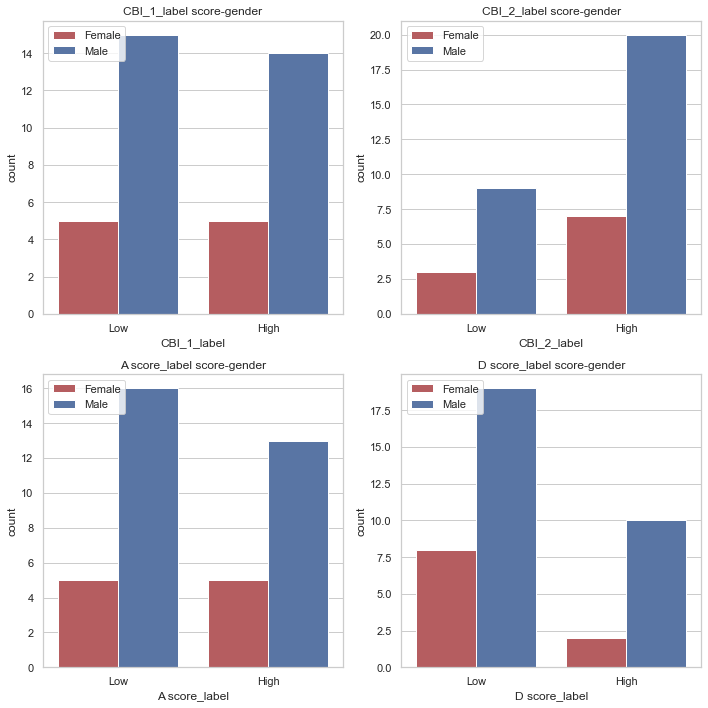

In [9]:
plt.figure(figsize= (10, 10))

for i, col_p in enumerate(["CBI_1_label", "CBI_2_label", "A score_label", "D score_label"]):
    plt.subplot(2, 2, i+1)
    sns.set_theme(style="whitegrid")
    sns.countplot(x= col_p, data= df_label, hue= 'Gender', palette= ['r', 'b'])
    plt.title(col_p + " score-gender")
    plt.xticks([0, 1], ['Low', 'High'])
    plt.legend(loc='upper left', labels=['Female', 'Male'])
    plt.tight_layout()

plt.show()

In [10]:
# merge ，用 inner ，人名一樣的才會上
dfs = pd.merge(df_feature_cl, df_label, left_index= True, right_index= True)
print(dfs.shape)
dfs.head()

(37, 176)


CH1_Oxy_Task_begin_slope  CH1_Deoxy_Task_begin_slope  \
Aak                       0.024819                   -0.013657   
Amiya                     0.035790                   -0.035772   
April                     0.019041                   -0.044347   
Archetto                  0.016882                   -0.028790   
Ash                       0.068736                    0.065589   

          CH2_Oxy_Task_begin_slope  CH2_Deoxy_Task_begin_slope  \
Aak                       0.011554                   -0.009824   
Amiya                    -0.006235                    0.020678   
April                    -0.012907                   -0.014942   
Archetto                  0.011429                   -0.035307   
Ash                       0.057870                   -0.034063   

          CH3_Oxy_Task_begin_slope  CH3_Deoxy_Task_begin_slope  \
Aak                       0.012998                   -0.020968   
Amiya                     0.020728                    0.019056   
April                     0.014461                   -0.013636   
Archetto                  0.004710                   -0.004605   
Ash                       0.048478                   -0.021619   

          CH1_Oxy_stage_Recovery_slope  CH1_Deoxy_stage_Recovery_slope  \
Aak                           0.022015                       -0.047618   
Amiya                        -0.031904                        0.031897   
April                        -0.008208                        0.014011   
Archetto                     -0.031117                        0.006936   
Ash                           0.010310                        0.006476   

          CH2_Oxy_stage_Recovery_slope  CH2_Deoxy_stage_Recovery_slope  ...  \
Aak                           0.057992                        0.007034  ...   
Amiya                        -0.026799                       -0.047282  ...   
April                        -0.010022                       -0.009350  ...   
Archetto                     -0.045191                       -0.013461  ...   
Ash                           0.007697                        0.004553  ...   

          CH3_Deoxy Third Freq  CH3_Deoxy Third Amp  Gender   Age  Seniority  \
Aak                   0.091413             0.032022       1    27          6   
Amiya                 0.074792             0.021590     0.0  39.0        NaN   
April                 0.074689             0.032692       1    39          4   
Archetto              0.107958             0.023621       0    30          3   
Ash                   0.066436             0.043672       1    42         15   

          Educate  CBI_1_label  CBI_2_label  A score_label  D score_label  
Aak             4            1            1              0              0  
Amiya         3.0            0            1              0              0  
April           4            1            1              0              0  
Archetto        4            1            1              0              0  
Ash             4            0            0              1              1  

[5 rows x 176 columns]

In [11]:
df_feature_cl = dfs.loc[:, :'CH3_Deoxy Third Amp']
df_label = dfs.loc[:, 'Gender':]
df_label.head()

Gender   Age Seniority Educate  CBI_1_label  CBI_2_label  \
Aak           1    27         6       4            1            1   
Amiya       0.0  39.0       NaN     3.0            0            1   
April         1    39         4       4            1            1   
Archetto      0    30         3       4            1            1   
Ash           1    42        15       4            0            0   

          A score_label  D score_label  
Aak                   0              0  
Amiya                 0              0  
April                 0              0  
Archetto              0              0  
Ash                   1              1

In [12]:
# name 放回來，我也不知道為啥要放回來，當初寫有放回來?

df_feature_cl = df_feature_cl.reset_index()
df_feature_cl = df_feature_cl.rename(columns={'index':'Name'})
df_feature_cl.head()

Name  CH1_Oxy_Task_begin_slope  CH1_Deoxy_Task_begin_slope  \
0       Aak                  0.024819                   -0.013657   
1     Amiya                  0.035790                   -0.035772   
2     April                  0.019041                   -0.044347   
3  Archetto                  0.016882                   -0.028790   
4       Ash                  0.068736                    0.065589   

   CH2_Oxy_Task_begin_slope  CH2_Deoxy_Task_begin_slope  \
0                  0.011554                   -0.009824   
1                 -0.006235                    0.020678   
2                 -0.012907                   -0.014942   
3                  0.011429                   -0.035307   
4                  0.057870                   -0.034063   

   CH3_Oxy_Task_begin_slope  CH3_Deoxy_Task_begin_slope  \
0                  0.012998                   -0.020968   
1                  0.020728                    0.019056   
2                  0.014461                   -0.013636   
3                  0.004710                   -0.004605   
4                  0.048478                   -0.021619   

   CH1_Oxy_stage_Recovery_slope  CH1_Deoxy_stage_Recovery_slope  \
0                      0.022015                       -0.047618   
1                     -0.031904                        0.031897   
2                     -0.008208                        0.014011   
3                     -0.031117                        0.006936   
4                      0.010310                        0.006476   

   CH2_Oxy_stage_Recovery_slope  ...  CH3_Oxy Second Freq  CH3_Oxy Second Amp  \
0                      0.057992  ...             0.099723            0.045054   
1                     -0.026799  ...             0.091413            0.060163   
2                     -0.010022  ...             0.058091            0.016478   
3                     -0.045191  ...             0.041522            0.048479   
4                      0.007697  ...             0.049827            0.064042   

   CH3_Oxy Third Freq  CH3_Oxy Third Amp  CH3_Deoxy First Freq  \
0            0.116343           0.018806              0.033241   
1            0.049861           0.045932              0.024931   
2            0.082988           0.016365              0.033195   
3            0.083045           0.036470              0.041522   
4            0.132872           0.016568              0.024913   

   CH3_Deoxy First Amp  CH3_Deoxy Second Freq  CH3_Deoxy Second Amp  \
0             0.066239               0.074792              0.033351   
1             0.201037               0.049861              0.026774   
2             0.091326               0.049793              0.086211   
3             0.042617               0.024913              0.027272   
4             0.121502               0.041522              0.097635   

   CH3_Deoxy Third Freq  CH3_Deoxy Third Amp  
0              0.091413             0.032022  
1              0.074792             0.021590  
2              0.074689             0.032692  
3              0.107958             0.023621  
4              0.066436             0.043672  

[5 rows x 169 columns]

# Feature selection + Model + Plot margin and confussion matrix 

> ### 哥打的是Kaggle，誰在跟你凹

> ### 哥發現Kaggle打不贏，還是求穩畢個業

> ### OR 加起來，凹完再重現

* ### Feature selection
    * 爆幹難，方法百百種，沒有標準答案，大概跟Feature Selection 一樣難
    * 大致有 選擇 : [Filter](https://ithelp.ithome.com.tw/articles/10245037)、[Wrapper](https://ithelp.ithome.com.tw/articles/10246251)、[Embedded](https://ithelp.ithome.com.tw/articles/10246876)
    * 以及 降維度 : PCA、LDA
    * [referance](https://www.itread01.com/content/1516714703.html)
    * 或者，資料少且需要特徵少 -> 排列組合

* ### Model 
    * 小難，種類也百百種，每年一直出新的
    * 但其實好抓，小數具有小數據該用的，大數據亦然
    * 小量數據: KNN、SVM、...?LDA?，然後信不信RandomForestTree讓你train_accuracy = 1
    * 大量數據: 諸多大招可用，sklearn.ensemble (是一個合集不是一個model)，ML界史爾特爾 XGB & LightGMB，linear界大佬SGD (最近有MSGD但沒有包，要手刻，手刻過DNN的人可以試試)
    * ### *推薦資料量不大時用GridSearchCV找參數*
    * p.s. 大量數據時不代表"簡單"model不可用，Lasso有時會神經刀一波

* ### Plot
    * 就畫圖，有手就行，但是Excel不行
    * Plot margin -> mesh + grid 疊圖 train/test point
    * Confussion Matrix -> 包好的
    * ROC/AUC -> 包好的


# 統計
### [# 看這裡](https://statistics-using-python.blogspot.com/2019/08/blog-post.html)

# 1. ttest(with standardscaler) + SVC + plot

In [13]:
pure_feature = df_label[["CBI_1_label", "CBI_2_label", "A score_label", "D score_label"]]

In [14]:
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler

# StarifiedKfold
def Starifieds(df_feature_cl, pure_feature, random_state= 42, n_splits= 4, shuffle= True):

    #======================================
    # 用處: Starifieds Kflod 原本只能出index，這裡二合一
    #
    # Parameter: 
    #     df_feature_cl, feature
    #     pure_feature, label
    #     random_state= 42, 不必多說
    #     n_splits= 4,  分幾份
    #     shuffle= True  如字面上
    #======================================

    xtrain, xtest = list(StratifiedKFold(n_splits= n_splits, shuffle= shuffle, random_state= random_state).split(df_feature_cl, pure_feature))[0]
    train_fea, test_fea = df_feature_cl.iloc[xtrain], df_feature_cl.iloc[xtest]
    train_label, test_label = pure_feature.iloc[xtrain], pure_feature.iloc[xtest]

    #===============
    

    try:
        train_fea.drop(columns= ["Gender"], inplace=True)
        test_fea.drop(columns= ["Gender"], inplace=True)
    except:
        pass
    
    return train_fea, train_label, test_fea, test_label



In [15]:
def acc_plot(data_fea, data_label, train_fea, train_label,  model, h = 0.02, bound= 1,  **params):

    # plot function
    #===========================================#
    #用途: 畫出邊界plot

    #切記: 二維才能畫圖
    #===========================================#
    # Import: 
    # numpy
    # matplotlib.pyplot
    #===========================================#

    plt.style.use('seaborn-white')

    if len(data_fea.columns) == 2:
        def make_meshgrid(x1, x2, h = h):
            x_min, x_max = x1.min() - bound, x1.max() + bound
            y_min, y_max = x2.min() - bound, x2.max() + bound
            xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
            return xx, yy

        def plot_contours(clf, xx, yy, ax, **params ):
            z = clf.predict(np.c_[xx.ravel(), yy.ravel()])  #np.c_ 帥爛
            z = z.reshape(xx.shape)
            ax.contourf(xx, yy, z, alpha= 0.8, cmap = plt.cm.coolwarm)
            ax.set_xlim(xx.min(), xx.max())
            ax.set_ylim(yy.min(), yy.max())
            
        sns.set(font_scale=1.4)

        fig, (ax1, ax2) = plt.subplots(1, 2, figsize= (12, 6))
        xx, yy = make_meshgrid(data_fea.iloc[:, 0],  data_fea.iloc[:, 1])
        plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, ax= ax1,  **params)
        ax1.scatter(data_fea.iloc[:, 0], data_fea.iloc[:, 1], c= data_label, cmap=plt.cm.coolwarm)  # 用label拚座標，暈爛
        ax1.set_xlabel(data_fea.columns[0])
        ax1.set_ylabel(data_fea.columns[1])
        ax1.set_title(f"{model.__class__.__name__} Test Plot {accuracy_score(test_labels, model.predict(data_fea))}")
        # plt.show()

        # plt.figure(figsize= (6, 6))
        plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, ax= ax2, **params)
        ax2.scatter(train_fea.iloc[:, 0], train_fea.iloc[:, 1], c= train_label, cmap=plt.cm.coolwarm)  # 用label拚座標，暈爛
        ax2.set_xlabel(train_fea.columns[0])
        ax2.set_ylabel(train_fea.columns[1])
        ax2.set_title(f"{model.__class__.__name__} Train Plot {accuracy_score(train_label, model.predict(train_fea))}")
        plt.tight_layout()
        plt.show()

    else: 
        print("Data should be two dimension!!")

        pass

    #==================R=O=C===================================================#

In [16]:
def condusion_m(test_fea, test_label, model):

    #=============================
    # 用途: 
    #     製造出confusion matrix

    # Parameter:
    #     test_fea  就feature
    #     test_label  就label
    #     model  就model
    #=============================

    from sklearn.metrics import confusion_matrix
    
    conf = confusion_matrix(test_label, model.predict(test_fea))
    conp = np.array([(x/sum(x)) for x in conf])

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize= (14, 7))
    # 重點是 annot，cmap='Blues'
    sns.set(font_scale=1.8)
    sns.heatmap(conp , annot= True, cmap='Blues', ax= ax1)
    ax1.set_title(f"CM of {model.__class__.__name__}")

    sns.heatmap(conf , annot= True, cmap='Blues', ax= ax2)
    ax2.set_title(f"CM of {model.__class__.__name__}")
    plt.tight_layout()
    plt.show()

In [17]:
def ROCP(test_fea, test_label, model, a= 0, pos_label= 0):
    from sklearn.metrics import roc_curve, auc

    #=============================
    # 用途: 
    #     製造出confusion matrix

    # Parameter:
    #     test_fea  就feature
    #     test_label  就label
    #     model  就model
    #     a= 0 如果auc很奇怪，就 =1 
    #=============================

    try:
        prob = model.predict_proba(test_fea)[:, a]
        sns.set(font_scale=1.4)
        fig, ax= plt.subplots(1, 1, figsize= (8, 7))

        
        
        
        fpr, tpr, thresholds = roc_curve(test_label, prob, pos_label= pos_label)  #pos_label= 0 要設值
        plt.plot(fpr, tpr,   color= 'b', linewidth=3.0)

        
        x, y = np.arange(0, 1, 0.01), np.arange(0, 1, 0.01)
        plt.plot(x, y, '-.', linewidth=3.0, label= f"AUC  = {auc(fpr, tpr)}", color= 'r')
        
        ax.set_xlabel(" 1 - specificity")
        ax.set_ylabel("Sensitivity")
        ax.set_title(f"{model.__class__.__name__}'s  ROC")
        plt.legend()
        plt.show()
    
    except:
        print("Can't print ROC")

## ttest

[這裡](https://statistics-using-python.blogspot.com/2019/08/t-two-sample-t-test-with-equal.html)

In [18]:
import scipy.stats
# feature selection



def ttttest(train_fea, train_label):

    #======================================================
    # 1. scipy.stats.shapiro


    shap_low = []
    shap_high = []
    shap_cols = []

    all_fea = train_fea.merge(train_label, left_on= 'Name', right_index= True)
    all_fea = all_fea.sort_values(by= train_label.name)

    # print(train_label.name)

    cols = all_fea.drop(columns= ["Name", train_label.name]).columns
    #print(cols)

    all_low = all_fea[all_fea[train_label.name] == 0]
    all_high = all_fea[all_fea[train_label.name] == 1]

    for col in cols:
        # 看p_value 可不留
        lows = scipy.stats.shapiro(all_low[col])[1]
        highs = scipy.stats.shapiro(all_high[col])[1]

        shap_low.append(lows)
        shap_high.append(highs)

        if lows > 0.05 and highs > 0.05:
            shap_cols.append(col)

    shap_cols
    #=====================================================
    # 2.scipy.stats.levene

    levene = []
    good_levene = []

    for shapiro_col in shap_cols:

        lev = scipy.stats.levene(all_low[shapiro_col], all_high[shapiro_col], center = 'mean')[1]  
        levene.append(lev)

        if lev > 0.05:
            good_levene.append(shapiro_col)

    good_levene

    #======================================================
    # 3. scipy.stats.ttest_ind
    
    ttest = []
    good_ttest = []


    for good_lev in good_levene:
        ttestn = scipy.stats.ttest_ind(all_low[good_lev], all_high[good_lev], equal_var = True)[1]
        ttest.append(ttestn)

    #display results
    ttest_df = pd.Series(ttest, index= good_levene, name= train_label.name + '_T_score').sort_values()
    return ttest_df



In [ ]:
# 找個pretty ttest score
# 先ttest 再標準化

for rand in range(10):
    train_fea2, train_label2, test_fea2, test_label2 = Starifieds(df_feature_cl, pure_feature["CBI_1_label"], random_state= rand)

    cbi2 = ttttest(train_fea2, train_label2)
    # print(cbi2)
    if cbi2[0] < 0.05 and cbi2[1] < 0.05:
        print("rand ", rand, "\n", cbi2[:2], end= '\n\n')


### 改這裡即可改要測甚麼:

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import ParameterSampler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import SGDClassifier

for iui in range(200):
    print(iui, end= " ")
    train_feas, train_labels, test_feas, test_labels = Starifieds(df_feature_cl, pure_feature["CBI_2_label"], random_state= iui)
    try:
        cbi2 = ttttest(train_feas, train_labels)
        if cbi2[0] < 0.05 and cbi2[1] < 0.05:
            
            train_feas, test_feas = train_feas[cbi2.index[:2]], test_feas[cbi2.index[:2]]

            # ====================
            # print(train_feas.columns)
            for imm in train_feas.columns:
                if 'std' not in imm:     
                    sd = StandardScaler()
                    train_feasn = sd.fit_transform(train_feas[imm].values.reshape(-1,1))
                    test_feasn = sd.transform(test_feas[imm].values.reshape(-1,1))

                    train_feas[imm] = train_feasn
                    test_feas[imm] = test_feasn

                    # print(f'trans {imm}')
            # print(test_feas)
            # ===================================

            
            param_grid = {"C": [0.01, 0.1, 1, 10, 100], "gamma":[0.01, 0.1, 1, 5]}

            param_list = list(ParameterSampler(param_grid, n_iter=10000))

            for par in param_list:
                csc = SVC(probability=True, **par)                          
            
            #gc = GridSearchCV(csc, params, cv= 5, n_jobs= -1, scoring= 'accuracy')
                csc.fit(train_feas, train_labels)
                train_s = accuracy_score(train_labels, csc.predict(train_feas))
                test_s = accuracy_score(test_labels, csc.predict(test_feas))


            # pred = gc.best_estimator_.predict(test_feas)

                if test_s  >= 0.87 and train_s  >= 0.87 and test_s < 1 and train_s < 1:
                    print('rand = ', iui)
                    print(cbi2[:2])
                    
                    # print("train ", gc.best_score_)
                    print('train ', train_s)
                    print('test', test_s)
                    print("par = ", par)




                    acc_plot(test_feas, test_labels, train_feas, train_labels, csc)
                    condusion_m(test_feas, test_labels, csc)
                    ROCP(test_feas, test_labels, csc, a= 0)
    except:
        pass

CH1_Deoxy_Task_begin_slope    0.015094
CH1_Oxy_Task_auc              0.022778
Name: CBI_1_label_T_score, dtype: float64
train  0.9259259259259259
test 0.8888888888888888
param C =  100 param gamma =  1


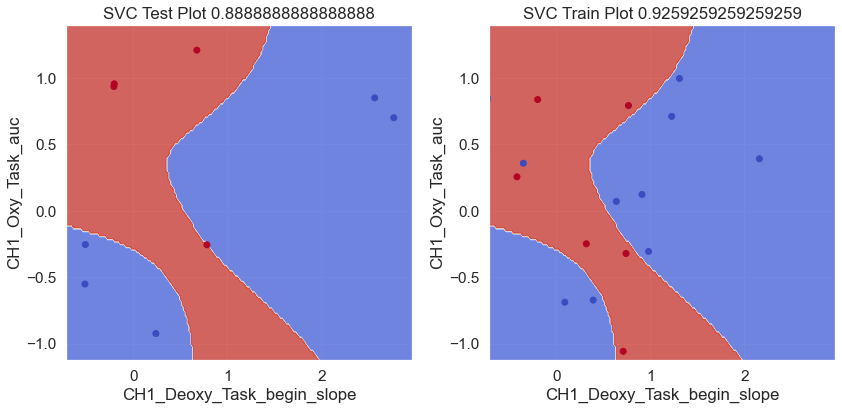

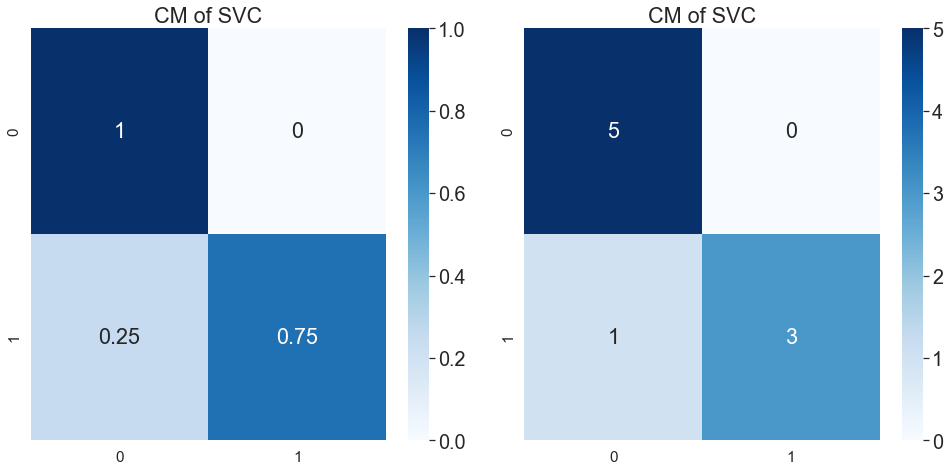

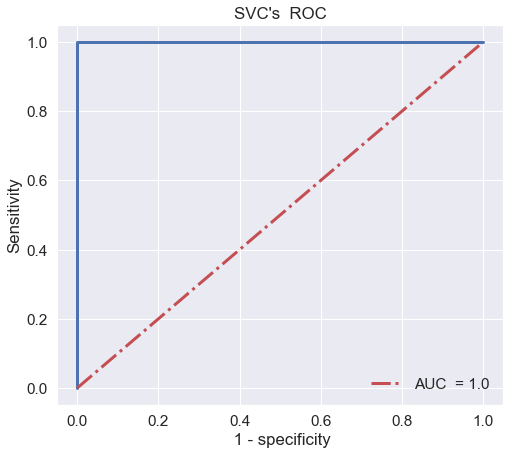

In [59]:
# CBI 1 
train_feas, train_labels, test_feas, test_labels = Starifieds(df_feature_cl, pure_feature["CBI_1_label"], random_state= 407)
cbi2 = ttttest(train_feas, train_labels)
train_feas, test_feas = train_feas[cbi2.index[:2]], test_feas[cbi2.index[:2]]


# ====================
# print(train_feas.columns)
for imm in train_feas.columns:
    if 'std' not in imm:     
        sd = StandardScaler()
        train_feasn = sd.fit_transform(train_feas[imm].values.reshape(-1,1))
        test_feasn = sd.transform(test_feas[imm].values.reshape(-1,1))

        train_feas[imm] = train_feasn
        test_feas[imm] = test_feasn

        # print(f'trans {imm}')
# print(test_feas)
# ===================================


csc = SVC(probability=True, gamma= 1, C= 100)                          
csc.fit(train_feas, train_labels)
train_s = accuracy_score(train_labels, csc.predict(train_feas))
test_s = accuracy_score(test_labels, csc.predict(test_feas))
print(cbi2[:2])
print('train ', train_s)
print('test', test_s)
print("param C = ", csc.get_params()["C"], "param gamma = ", csc.get_params()["gamma"])

acc_plot(test_feas, test_labels, train_feas, train_labels, csc, bound = 0.2)
condusion_m(test_feas, test_labels, csc)
ROCP(test_feas, test_labels, csc, a= 0)

CH3_Oxy_stage_activation    0.004713
CH1_Deoxy Third Freq        0.005158
Name: CBI_2_label_T_score, dtype: float64
train  0.9259259259259259
test 0.9
param: C =  100 , param: gamma =  1


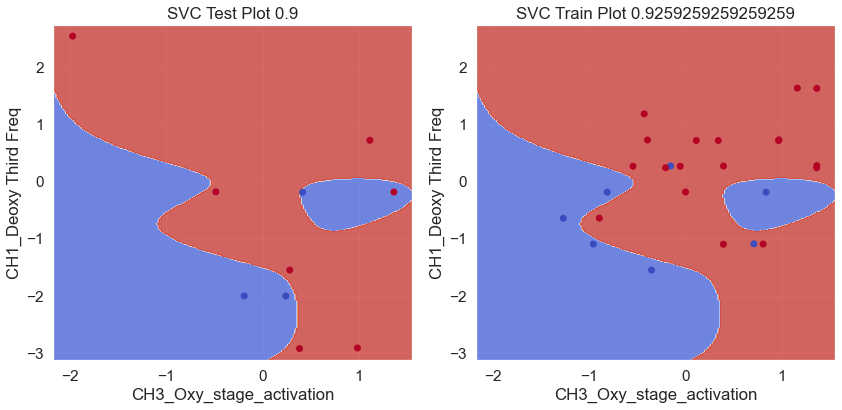

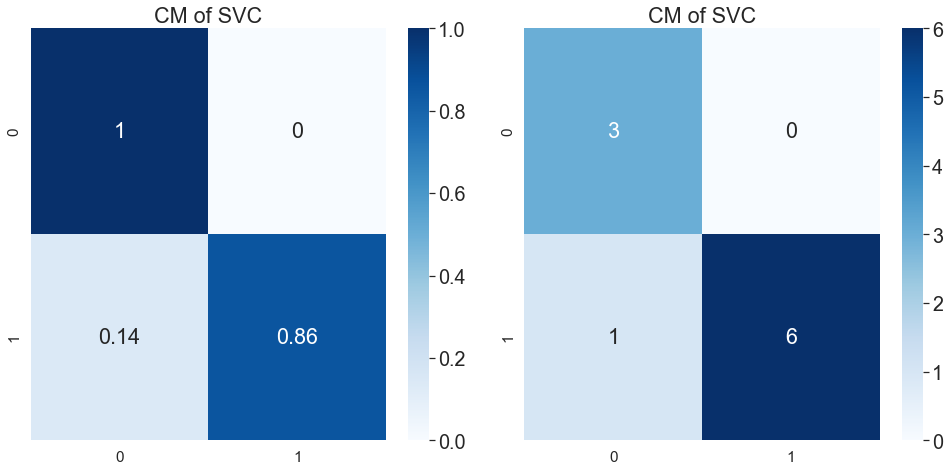

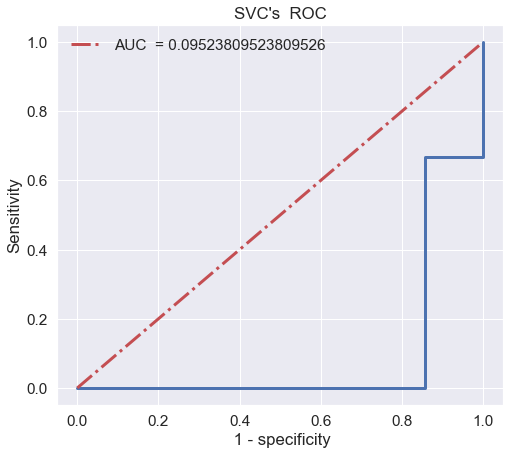

In [22]:
# CBI 2 
train_feas, train_labels, test_feas, test_labels = Starifieds(df_feature_cl, pure_feature["CBI_2_label"], random_state= 180)
cbi2 = ttttest(train_feas, train_labels)
train_feas, test_feas = train_feas[cbi2.index[:2]], test_feas[cbi2.index[:2]]

# ====================
# print(train_feas.columns)
for imm in train_feas.columns:
    if 'std' not in imm:     
        sd = StandardScaler()
        train_feasn = sd.fit_transform(train_feas[imm].values.reshape(-1,1))
        test_feasn = sd.transform(test_feas[imm].values.reshape(-1,1))

        train_feas[imm] = train_feasn
        test_feas[imm] = test_feasn

        # print(f'trans {imm}')
# print(test_feas)
# ===================================


csc = SVC(probability=True, gamma= 1, C= 100)                          
csc.fit(train_feas, train_labels)
train_s = accuracy_score(train_labels, csc.predict(train_feas))
test_s = accuracy_score(test_labels, csc.predict(test_feas))
print(cbi2[:2])
print('train ', train_s)
print('test', test_s)
print("param: C = ", csc.get_params()["C"], ", param: gamma = ", csc.get_params()["gamma"])

acc_plot(test_feas, test_labels, train_feas, train_labels, csc, bound = 0.2)
condusion_m(test_feas, test_labels, csc)
ROCP(test_feas, test_labels, csc, a= 1)

CH3_Oxy_rest_skew           0.011301
CH3_Oxy_stage_activation    0.019710
Name: D score_label_T_score, dtype: float64
train  0.9259259259259259
test 0.8888888888888888
param C =  100 param gamma =  1


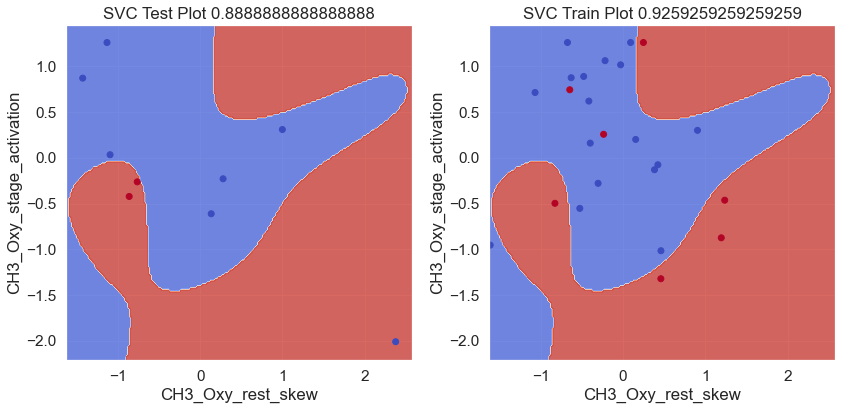

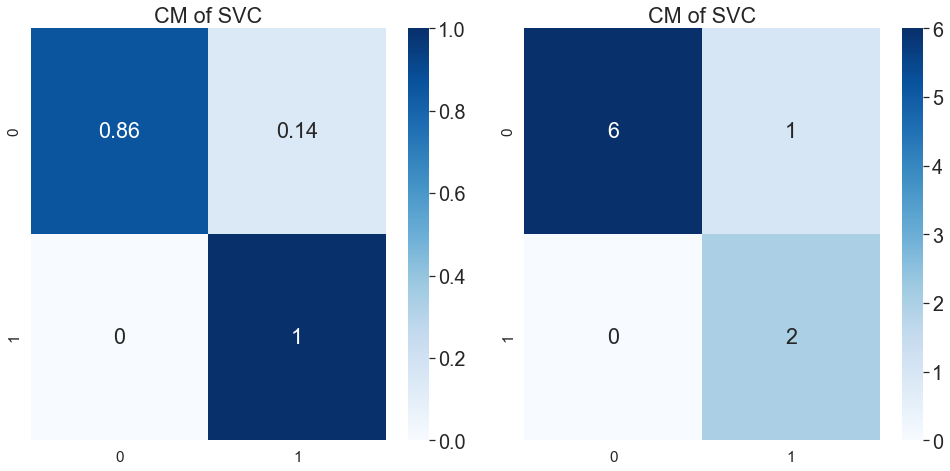

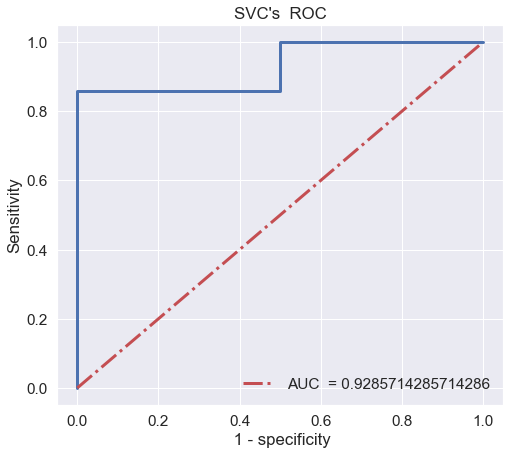

In [71]:
# "D score_label" 
train_feas, train_labels, test_feas, test_labels = Starifieds(df_feature_cl, pure_feature["D score_label"], random_state= 844)
cbi2 = ttttest(train_feas, train_labels)
train_feas, test_feas = train_feas[cbi2.index[:2]], test_feas[cbi2.index[:2]]

# ====================
# print(train_feas.columns)
for imm in train_feas.columns:
    if 'std' not in imm:     
        sd = StandardScaler()
        train_feasn = sd.fit_transform(train_feas[imm].values.reshape(-1,1))
        test_feasn = sd.transform(test_feas[imm].values.reshape(-1,1))

        train_feas[imm] = train_feasn
        test_feas[imm] = test_feasn

        # print(f'trans {imm}')
# print(test_feas)
# ===================================

csc = SVC(probability=True, gamma= 1, C= 100)                          
csc.fit(train_feas, train_labels)
train_s = accuracy_score(train_labels, csc.predict(train_feas))
test_s = accuracy_score(test_labels, csc.predict(test_feas))
print(cbi2[:2])
print('train ', train_s)
print('test', test_s)
print("param C = ", csc.get_params()["C"], "param gamma = ", csc.get_params()["gamma"])

acc_plot(test_feas, test_labels, train_feas, train_labels, csc, bound= 0.2)
condusion_m(test_feas, test_labels, csc)
ROCP(test_feas, test_labels, csc, a= 1)

CH2_Oxy_recovery_skew    0.001502
CH1_Deoxy_Task_mean      0.009647
Name: A score_label_T_score, dtype: float64
train  0.8888888888888888
test 0.8888888888888888
param C =  1 param gamma =  1


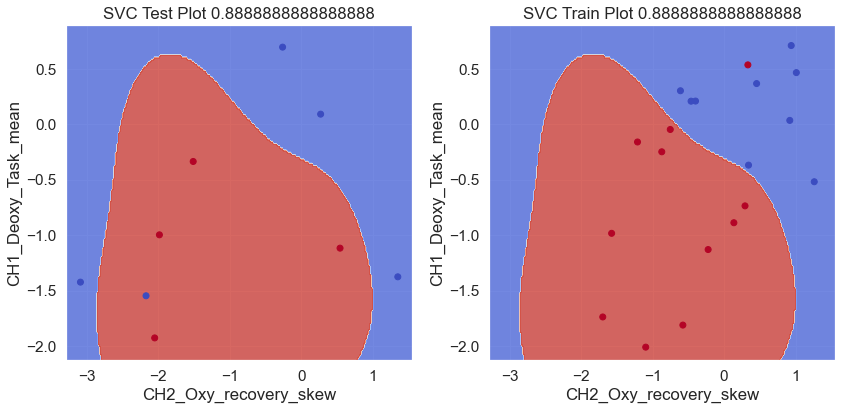

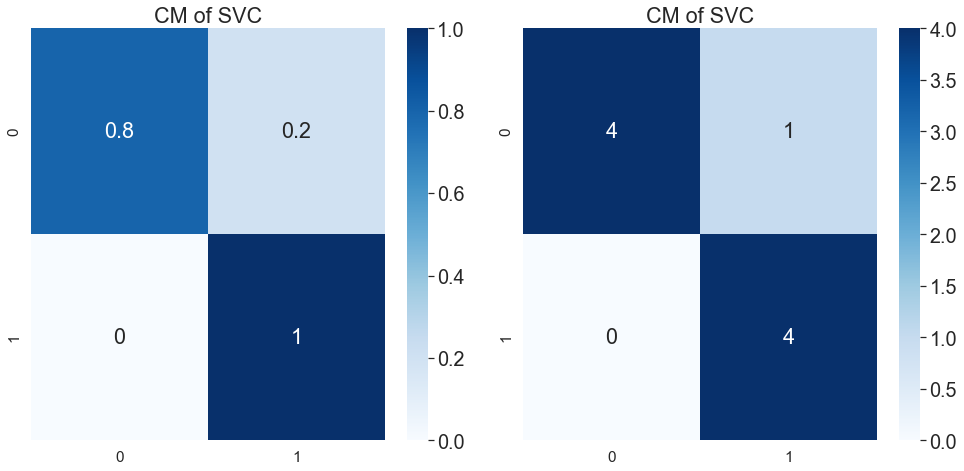

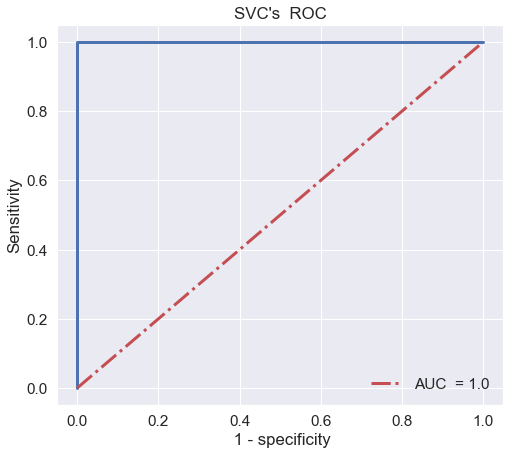

In [46]:
# "A score_label" 
train_feas, train_labels, test_feas, test_labels = Starifieds(df_feature_cl, pure_feature["A score_label"], random_state= 704)
cbi2 = ttttest(train_feas, train_labels)
train_feas, test_feas = train_feas[cbi2.index[:2]], test_feas[cbi2.index[:2]]

# ====================
# print(train_feas.columns)
for imm in train_feas.columns:
    if 'std' not in imm:     
        sd = StandardScaler()
        train_feasn = sd.fit_transform(train_feas[imm].values.reshape(-1,1))
        test_feasn = sd.transform(test_feas[imm].values.reshape(-1,1))

        train_feas[imm] = train_feasn
        test_feas[imm] = test_feasn

        # print(f'trans {imm}')
# print(test_feas)
# ===================================

csc = SVC(probability=True, gamma= 1, C= 1)                          
csc.fit(train_feas, train_labels)
train_s = accuracy_score(train_labels, csc.predict(train_feas))
test_s = accuracy_score(test_labels, csc.predict(test_feas))
print(cbi2[:2])
print('train ', train_s)
print('test', test_s)
print("param C = ", csc.get_params()["C"], "param gamma = ", csc.get_params()["gamma"])

acc_plot(test_feas, test_labels, train_feas, train_labels, csc, bound= 0.2)
condusion_m(test_feas, test_labels, csc)
ROCP(test_feas, test_labels, csc, a= 0)

## 2. 樹的feature important + SVC + plot

In [47]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
for rand in range(2000):
    print(rand, end= " ")
    train_feas, train_labels, test_feas, test_labels = Starifieds(df_feature_cl, pure_feature['CBI_2_label'], random_state= rand)
    train_feas = train_feas.drop(columns = "Name")
    test_feas = test_feas.drop(columns = "Name")

    # print(train_feas.columns.shape)

    coll = train_feas.columns

    rfc = RandomForestClassifier(random_state= rand)
    rfc.fit(train_feas, train_labels)
    
    imp = rfc.feature_importances_

    Se = pd.Series(imp, index= coll).sort_values(ascending= False)
    # print(Se)
    if Se[0] > 0.03 and Se[1] > 0.03:

        train_feas, test_feas = train_feas[Se.index[:2]], test_feas[Se.index[:2]]

        # ====================
        # print(train_feas.columns)
        for imm in train_feas.columns:
            if 'std' not in imm:     
                sd = StandardScaler()
                train_feasn = sd.fit_transform(train_feas[imm].values.reshape(-1,1))
                test_feasn = sd.transform(test_feas[imm].values.reshape(-1,1))

                train_feas[imm] = train_feasn
                test_feas[imm] = test_feasn

                # print('go')
                # print(f'trans {imm}')
        # print(test_feas)
        # ===================================


        param_grid = {"C": [0.01, 0.1, 1, 10, 100], "gamma":[0.01, 0.1, 1, 5]}

        param_list = list(ParameterSampler(param_grid, n_iter=10000))

        for par in param_list:
            csc = SVC(probability=True, **par)                          

            #gc = GridSearchCV(csc, params, cv= 5, n_jobs= -1, scoring= 'accuracy')
            csc.fit(train_feas, train_labels)
            train_s = accuracy_score(train_labels, csc.predict(train_feas))
            test_s = accuracy_score(test_labels, csc.predict(test_feas))


            # pred = gc.best_estimator_.predict(test_feas)

            if test_s  >= 0.83 and train_s  >= 0.83 and test_s < 1 and train_s < 1:
                print('rand = ', rand)
                print(Se[:3])

                # print("train ", gc.best_score_)
                print('train ', train_s)
                print('test', test_s)
                print("par = ", par)




                acc_plot(test_feas, test_labels, train_feas, train_labels, csc, bound= 0.2)
                condusion_m(test_feas, test_labels, csc)
                ROCP(test_feas, test_labels, csc, a= 0)



train  0.8888888888888888
test 0.8888888888888888


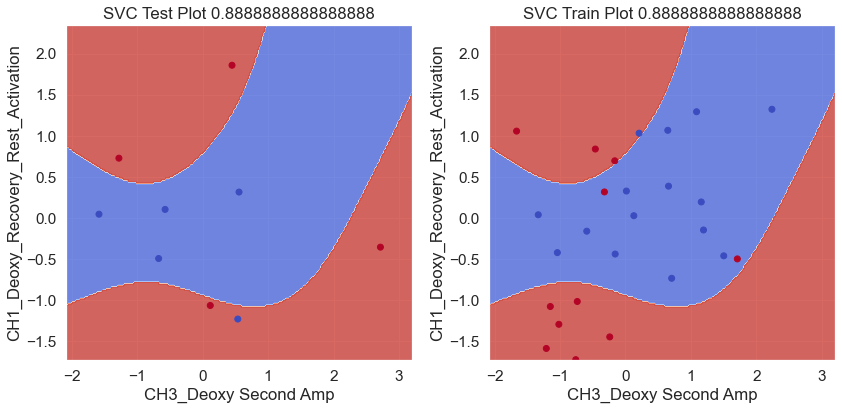

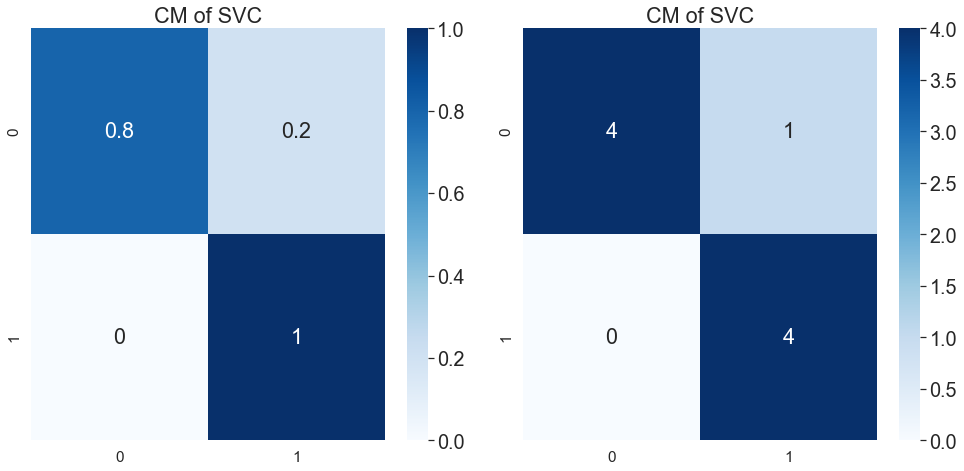

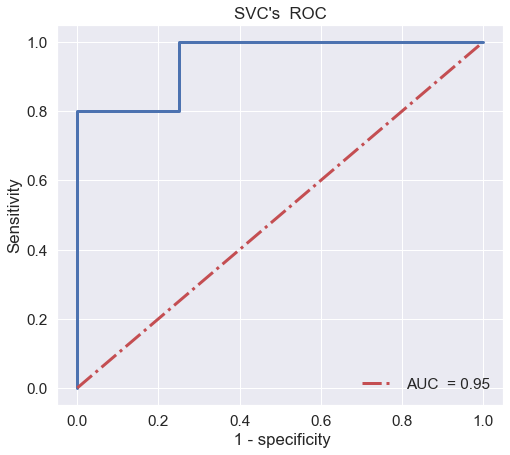

In [ ]:
# CBI_1_label
train_feas, train_labels, test_feas, test_labels = Starifieds(df_feature_cl, pure_feature["CBI_1_label"], random_state= 21)
train_fea = train_feas.drop(columns = "Name")
train_feas, test_feas = train_feas[["CH3_Deoxy Second Amp", "CH1_Deoxy_Recovery_Rest_Activation"]], test_feas[["CH3_Deoxy Second Amp", "CH1_Deoxy_Recovery_Rest_Activation"]]

# ====================
# print(train_feas.columns)
for imm in train_feas.columns:
    if 'std' not in imm:     
        sd = StandardScaler()
        train_feasn = sd.fit_transform(train_feas[imm].values.reshape(-1,1))
        test_feasn = sd.transform(test_feas[imm].values.reshape(-1,1))

        train_feas[imm] = train_feasn
        test_feas[imm] = test_feasn

        # print('go')
        # print(f'trans {imm}')
# print(test_feas)
# ===================================

csc = SVC(probability=True, gamma= 0.1, C= 100)                          


csc.fit(train_feas, train_labels)
train_s = accuracy_score(train_labels, csc.predict(train_feas))
test_s = accuracy_score(test_labels, csc.predict(test_feas))

print('train ', train_s)
print('test', test_s)
# print("par = ", par)

acc_plot(test_feas, test_labels, train_feas, train_labels, csc, bound= 0.5)
condusion_m(test_feas, test_labels, csc)
ROCP(test_feas, test_labels, csc, a= 0)


train  0.9629629629629629
test 0.8888888888888888


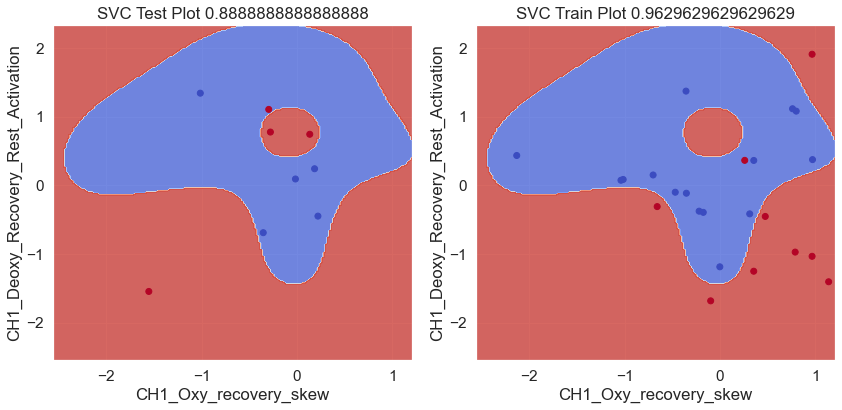

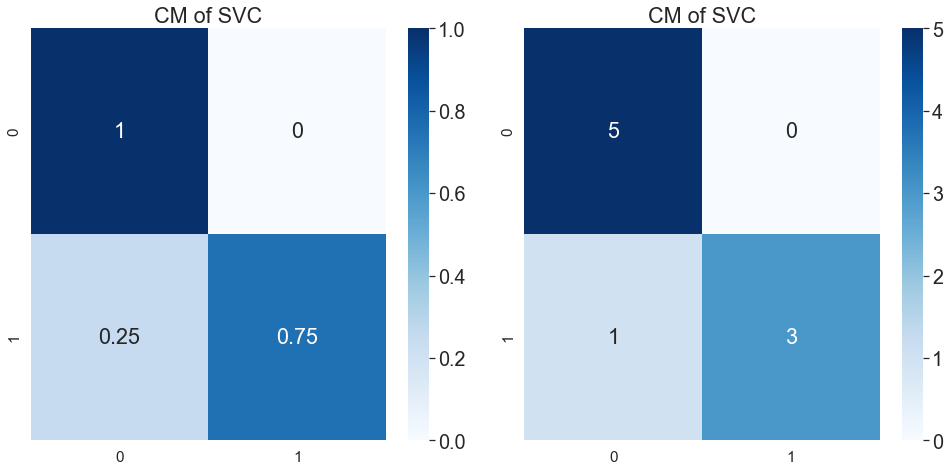

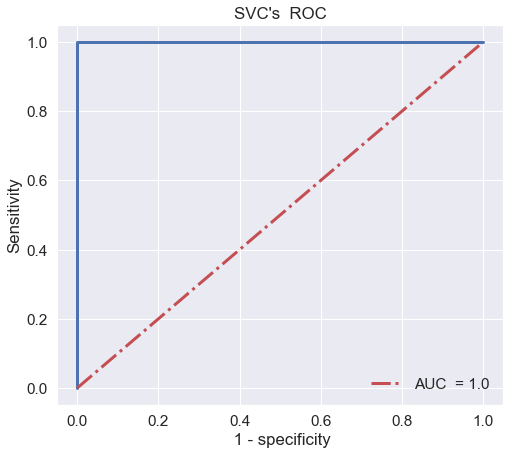

In [ ]:
# CBI_1_label
train_feas, train_labels, test_feas, test_labels = Starifieds(df_feature_cl, pure_feature["CBI_1_label"], random_state= 383)
train_fea = train_feas.drop(columns = "Name")
train_feas, test_feas = train_feas[["CH1_Oxy_recovery_skew", "CH1_Deoxy_Recovery_Rest_Activation"]], test_feas[["CH1_Oxy_recovery_skew", "CH1_Deoxy_Recovery_Rest_Activation"]]


# ====================
# print(train_feas.columns)
for imm in train_feas.columns:
    if 'std' not in imm:     
        sd = StandardScaler()
        train_feasn = sd.fit_transform(train_feas[imm].values.reshape(-1,1))
        test_feasn = sd.transform(test_feas[imm].values.reshape(-1,1))

        train_feas[imm] = train_feasn
        test_feas[imm] = test_feasn

        # print('go')
        # print(f'trans {imm}')
# print(test_feas)
# ===================================

csc = SVC(probability=True, gamma= 1, C= 100)                          


csc.fit(train_feas, train_labels)
train_s = accuracy_score(train_labels, csc.predict(train_feas))
test_s = accuracy_score(test_labels, csc.predict(test_feas))

print('train ', train_s)
print('test', test_s)
# print("par = ", par)

acc_plot(test_feas, test_labels, train_feas, train_labels, csc, bound= 1)
condusion_m(test_feas, test_labels, csc)
ROCP(test_feas, test_labels, csc, a= 0)

train  0.8888888888888888
test 0.8888888888888888


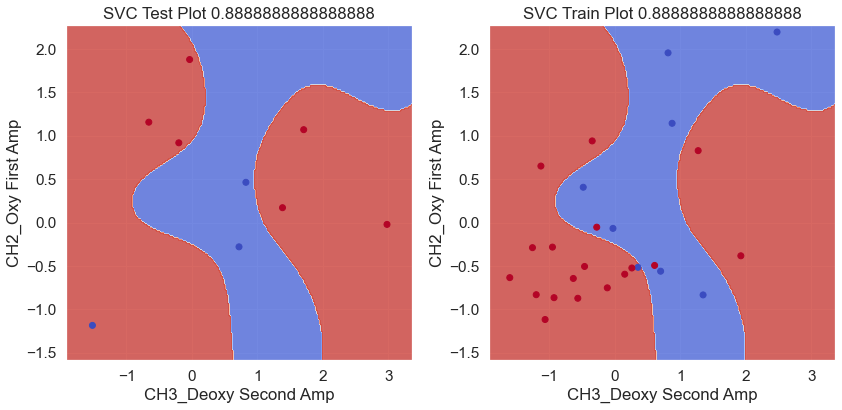

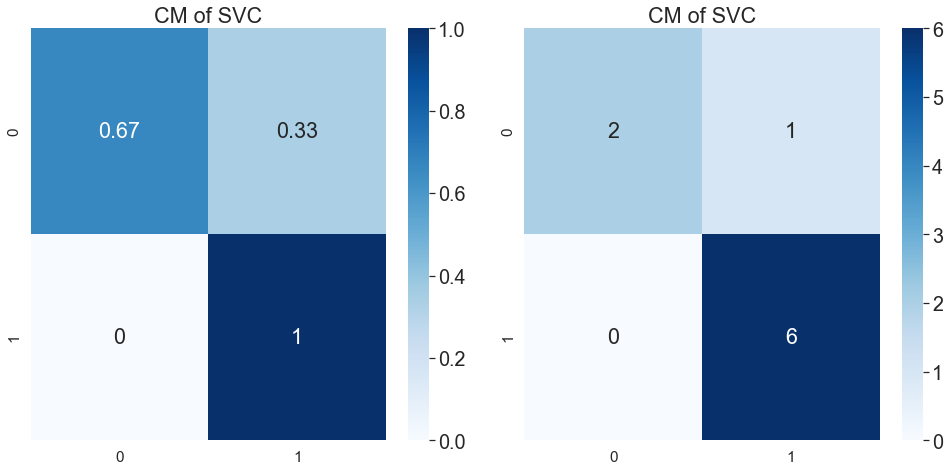

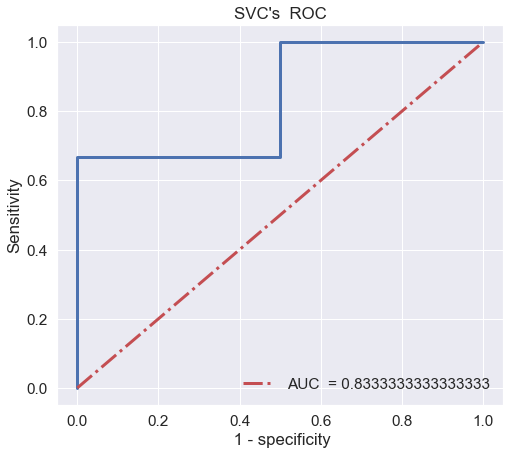

In [ ]:
# CBI_2_label
train_feas, train_labels, test_feas, test_labels = Starifieds(df_feature_cl, pure_feature["CBI_2_label"], random_state= 711)
train_fea = train_feas.drop(columns = "Name")
train_feas, test_feas = train_feas[["CH3_Deoxy Second Amp", "CH2_Oxy First Amp"]], test_feas[["CH3_Deoxy Second Amp", "CH2_Oxy First Amp"]]


# ====================
# print(train_feas.columns)
for imm in train_feas.columns:
    if 'std' not in imm:     
        sd = StandardScaler()
        train_feasn = sd.fit_transform(train_feas[imm].values.reshape(-1,1))
        test_feasn = sd.transform(test_feas[imm].values.reshape(-1,1))

        train_feas[imm] = train_feasn
        test_feas[imm] = test_feasn

        # print('go')
        # print(f'trans {imm}')
# print(test_feas)
# ===================================

csc = SVC(probability=True, gamma= 1, C= 10)                          


csc.fit(train_feas, train_labels)
train_s = accuracy_score(train_labels, csc.predict(train_feas))
test_s = accuracy_score(test_labels, csc.predict(test_feas))

print('train ', train_s)
print('test', test_s)
# print("par = ", par)

acc_plot(test_feas, test_labels, train_feas, train_labels, csc, bound= 0.4)
condusion_m(test_feas, test_labels, csc)
ROCP(test_feas, test_labels, csc, a= 0)

train  0.8888888888888888
test 0.8888888888888888


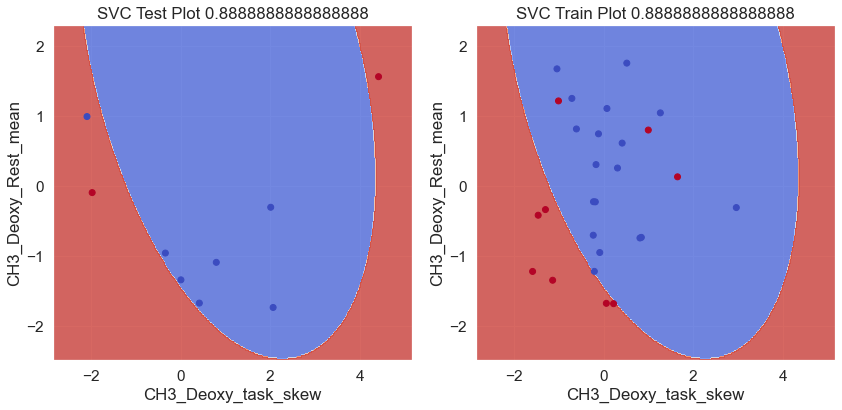

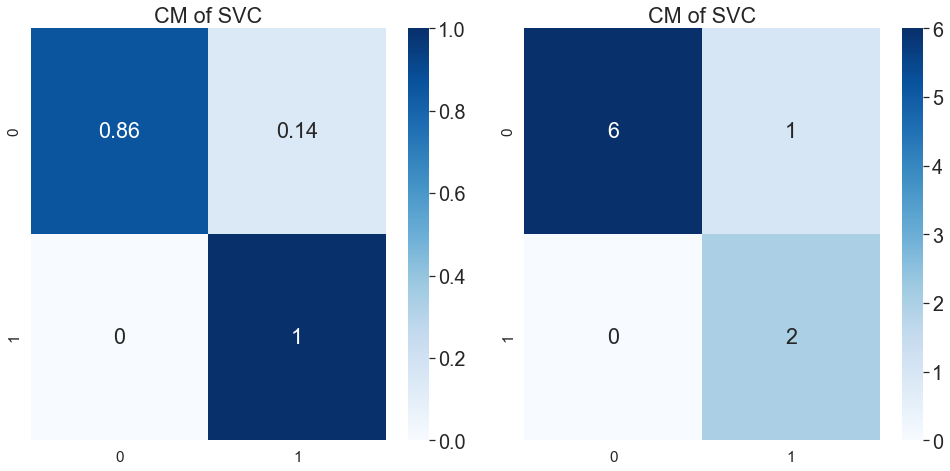

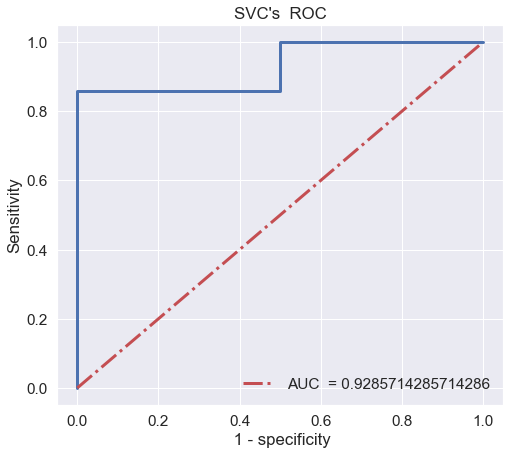

In [ ]:
# D score_label
train_feas, train_labels, test_feas, test_labels = Starifieds(df_feature_cl, pure_feature["D score_label"], random_state= 648)
train_fea = train_feas.drop(columns = "Name")
train_feas, test_feas = train_feas[["CH3_Deoxy_task_skew", "CH3_Deoxy_Rest_mean"]], test_feas[["CH3_Deoxy_task_skew", "CH3_Deoxy_Rest_mean"]]

# ====================
# print(train_feas.columns)
for imm in train_feas.columns:
    if 'std' not in imm:     
        sd = StandardScaler()
        train_feasn = sd.fit_transform(train_feas[imm].values.reshape(-1,1))
        test_feasn = sd.transform(test_feas[imm].values.reshape(-1,1))

        train_feas[imm] = train_feasn
        test_feas[imm] = test_feasn

        # print('go')
        # print(f'trans {imm}')
# print(test_feas)
# ===================================

csc = SVC(probability=True, gamma= 0.01, C= 100)                          


csc.fit(train_feas, train_labels)
train_s = accuracy_score(train_labels, csc.predict(train_feas))
test_s = accuracy_score(test_labels, csc.predict(test_feas))

print('train ', train_s)
print('test', test_s)
# print("par = ", par)

acc_plot(test_feas, test_labels, train_feas, train_labels, csc, bound= 0.75)
condusion_m(test_feas, test_labels, csc)
ROCP(test_feas, test_labels, csc, a= 0)

train  0.9259259259259259
test 0.8888888888888888


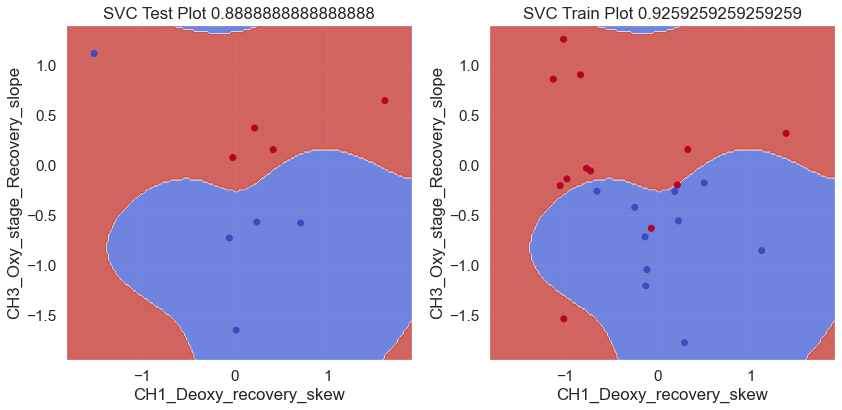

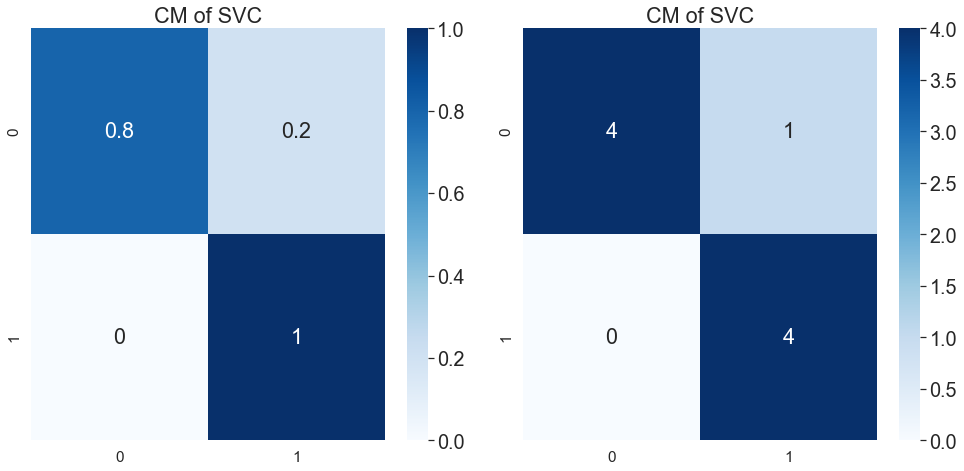

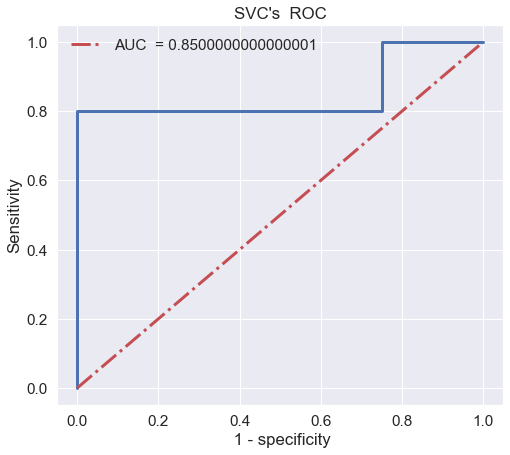

In [ ]:
# A score_label
train_feas, train_labels, test_feas, test_labels = Starifieds(df_feature_cl, pure_feature["A score_label"], random_state= 177)
train_fea = train_feas.drop(columns = "Name")
train_feas, test_feas = train_feas[["CH1_Deoxy_recovery_skew", "CH3_Oxy_stage_Recovery_slope"]], test_feas[["CH1_Deoxy_recovery_skew", "CH3_Oxy_stage_Recovery_slope"]]


# ====================
# print(train_feas.columns)
for imm in train_feas.columns:
    if 'std' not in imm:     
        sd = StandardScaler()
        train_feasn = sd.fit_transform(train_feas[imm].values.reshape(-1,1))
        test_feasn = sd.transform(test_feas[imm].values.reshape(-1,1))

        train_feas[imm] = train_feasn
        test_feas[imm] = test_feasn

        # print('go')
        # print(f'trans {imm}')
# print(test_feas)
# ===================================

csc = SVC(probability=True, gamma= 1, C= 100)                          


csc.fit(train_feas, train_labels)
train_s = accuracy_score(train_labels, csc.predict(train_feas))
test_s = accuracy_score(test_labels, csc.predict(test_feas))

print('train ', train_s)
print('test', test_s)
# print("par = ", par)

acc_plot(test_feas, test_labels, train_feas, train_labels, csc, bound= 0.3)
condusion_m(test_feas, test_labels, csc)
ROCP(test_feas, test_labels, csc, a= 0)

# 3. RFE + 含 _coef, feature_importance 的model + plot

        * 吃_coef的都是linear
        * 吃feature important的都太高階

# 4. 窮舉 + VotingClassifier + plot



In [91]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import ParameterSampler
from sklearn.metrics import accuracy_score


from sklearn.naive_bayes import GaussianNB
from itertools import combinations


In [ ]:
for rand1 in range(1000):
    print(rand1, end= " ")
    train_feas, train_labels, test_feas, test_labels = Starifieds(df_feature_cl, pure_feature["CBI_2_label"], random_state= rand1)
    train_feas = train_feas.drop(columns = "Name")
    test_feas = test_feas.drop(columns = "Name")

    coll = train_feas.columns
    all_col = combinations(coll, 2)
    all_cols = list(all_col)
   

    # ====================
    # print(train_feas.columns)
    for imm in train_feas.columns:
        if 'std' not in imm:     
            sd = StandardScaler()
            train_feasn = sd.fit_transform(train_feas[imm].values.reshape(-1,1))
            test_feasn = sd.transform(test_feas[imm].values.reshape(-1,1))

            train_feas[imm] = train_feasn
            test_feas[imm] = test_feasn

            # print('go')
            # print(f'trans {imm}')
    # print(test_feas)
    # ===================================

    for cols in all_cols:
        
        clf1 = LogisticRegression(random_state=rand1)
        clf2 = SGDClassifier(random_state= rand1)
        gb3 = GaussianNB()

        vc = VotingClassifier([('lr', clf1), ('sgd', clf2), ('gb', gb3)], n_jobs= -1)
        vc.fit(train_feas[list(cols)], train_labels)

        train_s = accuracy_score(train_labels, vc.predict(train_feas[list(cols)]))
        test_s = accuracy_score(test_labels, vc.predict(test_feas[list(cols)]))

        #print(train_s, test_s)
        #print(train_feas.iloc[:,rrf.get_support()].columns)

        if test_s  > 0.8 and train_s  > 0.8 :
            print('rand = ', rand1)
            print(cols)
            # print(train_feas.iloc[:,rrf.get_support()].columns)
            # colss = train_feas.iloc[:,rrf.get_support()].columns
            # print("train ", gc.best_score_)
            print('train ', train_s)
            print('test', test_s)
            # print("par = ", par)




            acc_plot(test_feas[list(cols)], test_labels, train_feas[list(cols)], train_labels, vc, bound= 1)
            condusion_m(test_feas[list(cols)], test_labels, vc)
            ROCP(test_feas[list(cols)], test_labels, vc, a= 0)


rand =  13
train  0.8518518518518519
test 0.8888888888888888


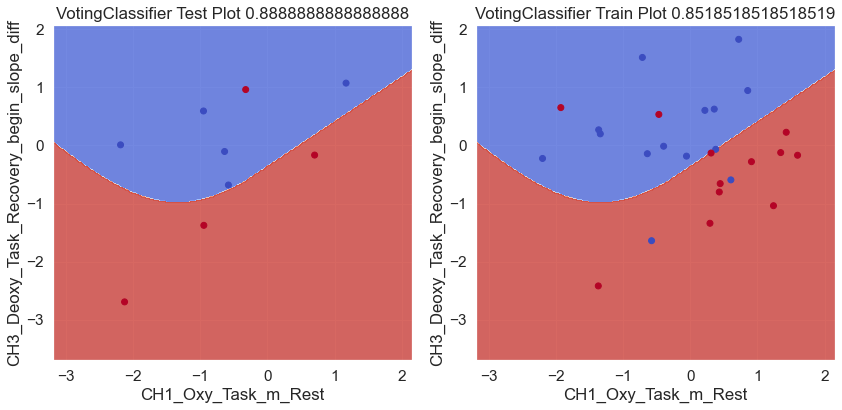

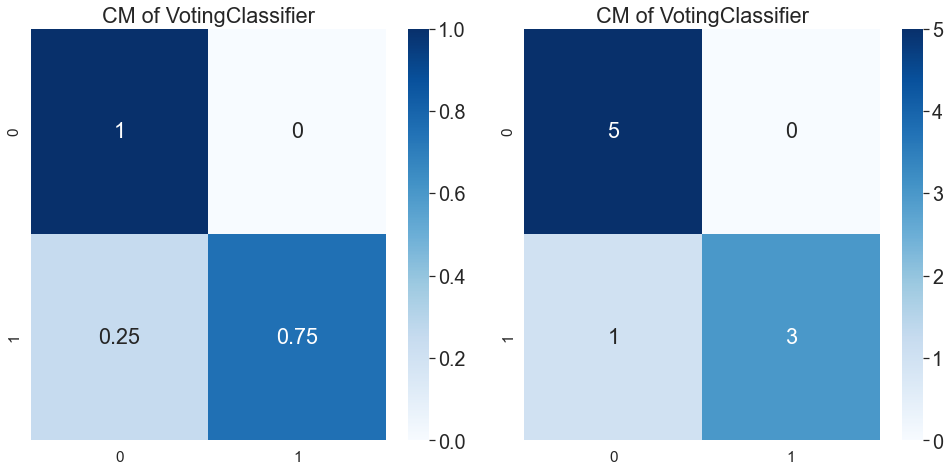

Can't print ROC


In [94]:
# CBI_1_label
rand1= 13
train_feas, train_labels, test_feas, test_labels = Starifieds(df_feature_cl, pure_feature["CBI_1_label"], random_state= rand1)
train_feas = train_feas.drop(columns = "Name")
test_feas = test_feas.drop(columns = "Name")

coll = train_feas.columns

good_col = ['CH1_Oxy_Task_m_Rest', 'CH3_Deoxy_Task_Recovery_begin_slope_diff']

sd = StandardScaler()
train_feasn = sd.fit_transform(train_feas)
test_feasn = sd.transform(test_feas)

train_feas = pd.DataFrame(train_feasn, columns= train_feas.columns)
test_feas = pd.DataFrame(test_feasn, columns= test_feas.columns)

clf1 = LogisticRegression(random_state=rand1)
clf2 = SGDClassifier(random_state= rand1)
gb3 = GaussianNB()

vc1 = VotingClassifier([('lr', clf1), ('sgd', clf2), ('gb', gb3)], n_jobs= -1)
vc1.fit(train_feas[good_col], train_labels)

train_s = accuracy_score(train_labels, vc1.predict(train_feas[good_col]))
test_s = accuracy_score(test_labels, vc1.predict(test_feas[good_col]))



print('rand = ', rand1)
print('train ', train_s)
print('test', test_s)





acc_plot(test_feas[good_col], test_labels, train_feas[good_col], train_labels, vc1)
condusion_m(test_feas[good_col], test_labels, vc1)
ROCP(test_feas[good_col], test_labels, vc1, a= 0)

rand =  5
train  0.8518518518518519
test 0.8888888888888888


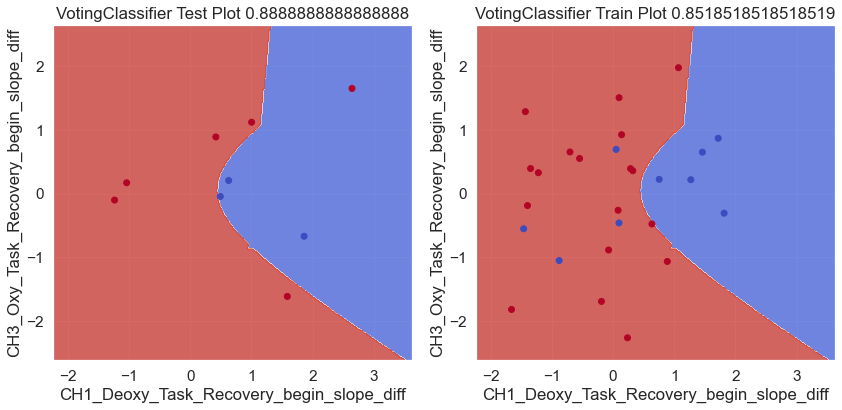

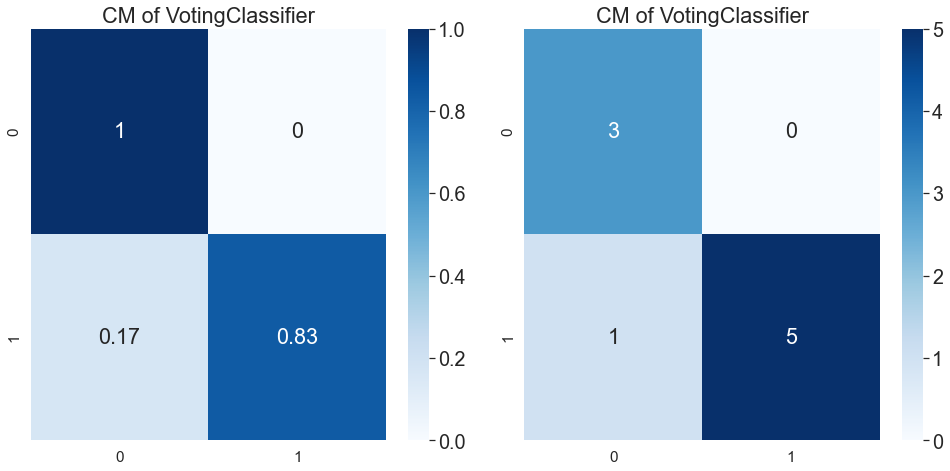

Can't print ROC


In [103]:
# CBI_2_label
rand1= 5
train_feas, train_labels, test_feas, test_labels = Starifieds(df_feature_cl, pure_feature["CBI_2_label"], random_state= rand1)
train_feas = train_feas.drop(columns = "Name")
test_feas = test_feas.drop(columns = "Name")

coll = train_feas.columns

good_col = ['CH1_Deoxy_Task_Recovery_begin_slope_diff', 'CH3_Oxy_Task_Recovery_begin_slope_diff']

sd = StandardScaler()
train_feasn = sd.fit_transform(train_feas)
test_feasn = sd.transform(test_feas)

train_feas = pd.DataFrame(train_feasn, columns= train_feas.columns)
test_feas = pd.DataFrame(test_feasn, columns= test_feas.columns)

clf1 = LogisticRegression(random_state=rand1)
clf2 = SGDClassifier(random_state= rand1)
gb3 = GaussianNB()

vc1 = VotingClassifier([('lr', clf1), ('sgd', clf2), ('gb', gb3)], n_jobs= -1)
vc1.fit(train_feas[good_col], train_labels)

train_s = accuracy_score(train_labels, vc1.predict(train_feas[good_col]))
test_s = accuracy_score(test_labels, vc1.predict(test_feas[good_col]))



print('rand = ', rand1)
print('train ', train_s)
print('test', test_s)





acc_plot(test_feas[good_col], test_labels, train_feas[good_col], train_labels, vc1, bound= 1)
condusion_m(test_feas[good_col], test_labels, vc1)
ROCP(test_feas[good_col], test_labels, vc1, a= 0)

# 5.窮舉 + GaussianNB + plot


In [33]:
from sklearn.naive_bayes import GaussianNB

0 rand =  0
train  0.8148148148148148
test 0.8888888888888888


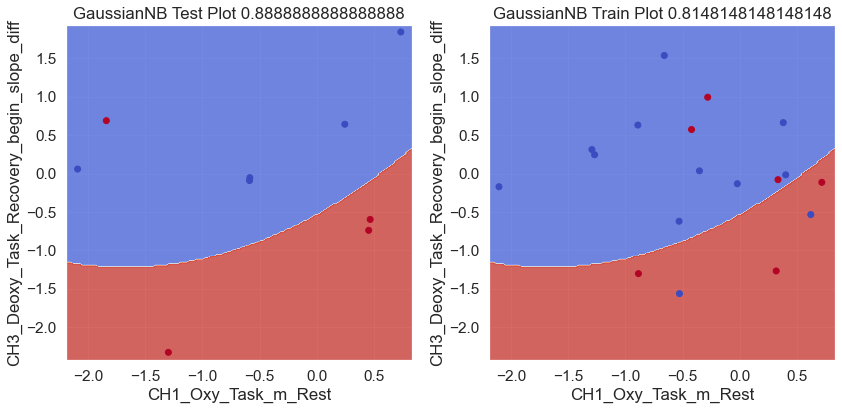

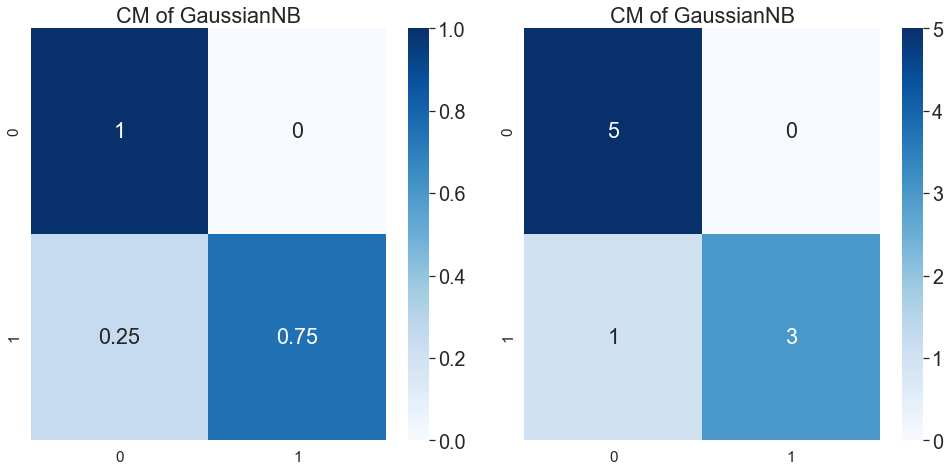

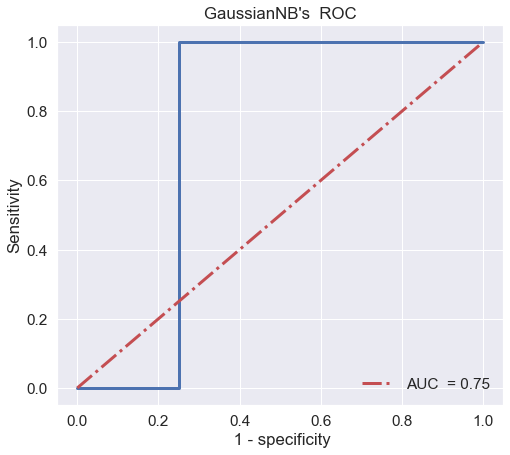

1 rand =  1
train  0.8148148148148148
test 0.8888888888888888


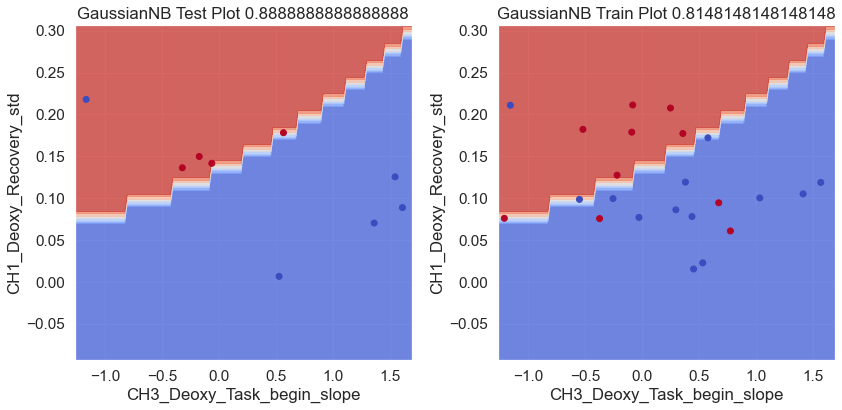

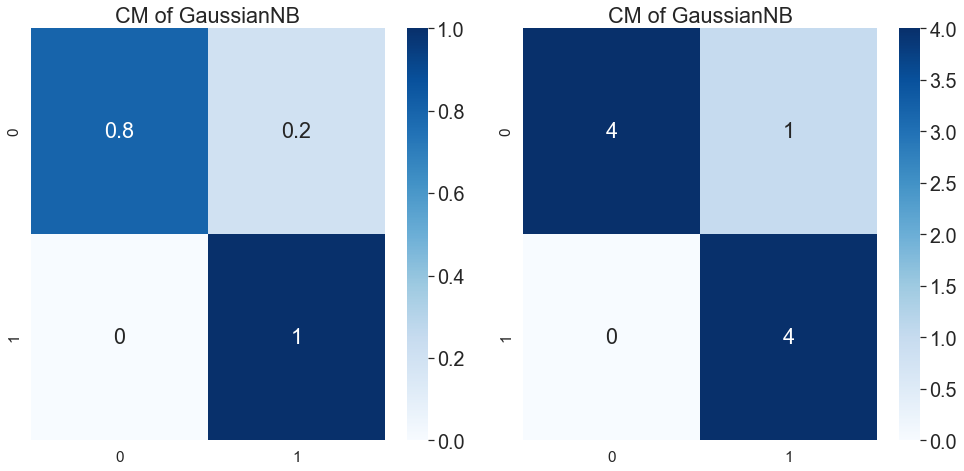

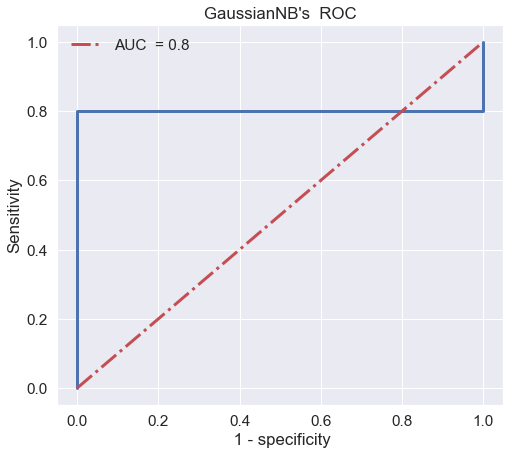

2 rand =  2
train  0.8148148148148148
test 0.8888888888888888


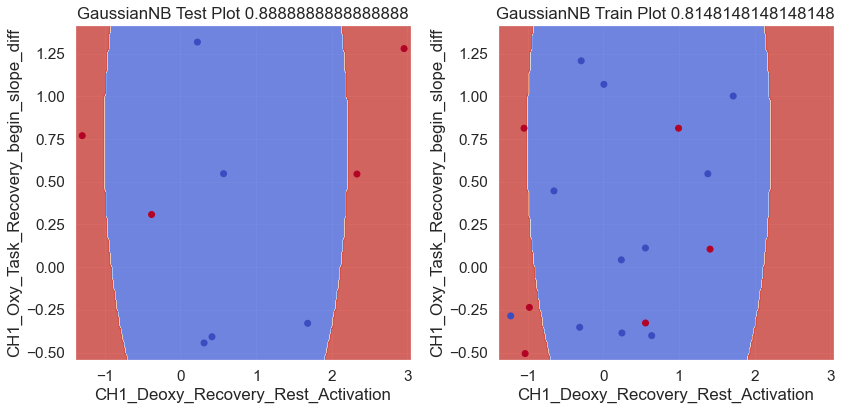

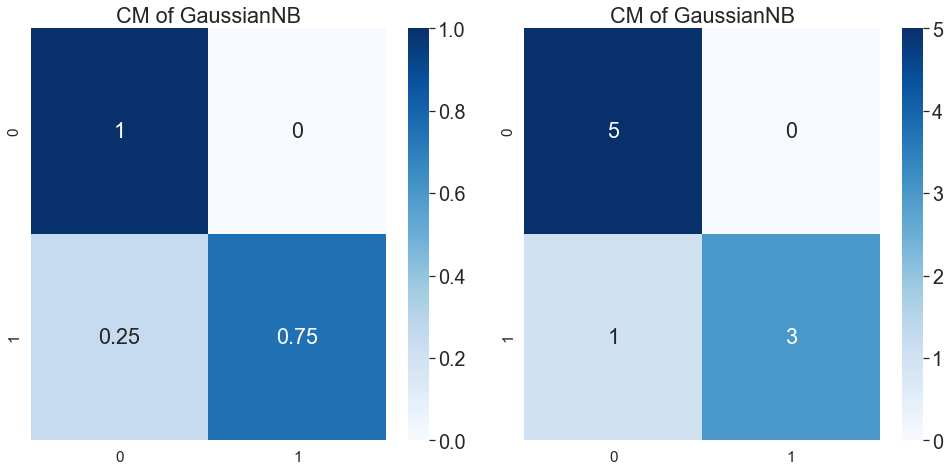

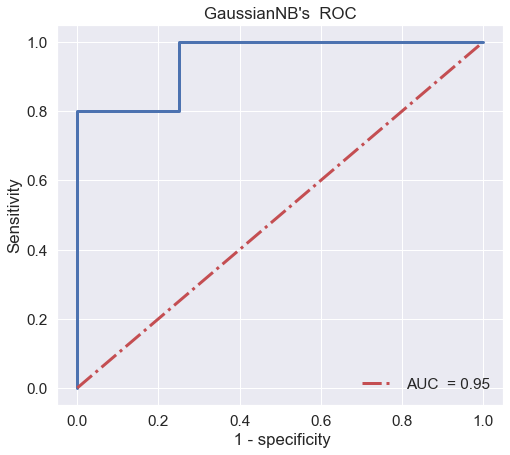

rand =  2
train  0.8148148148148148
test 0.8888888888888888


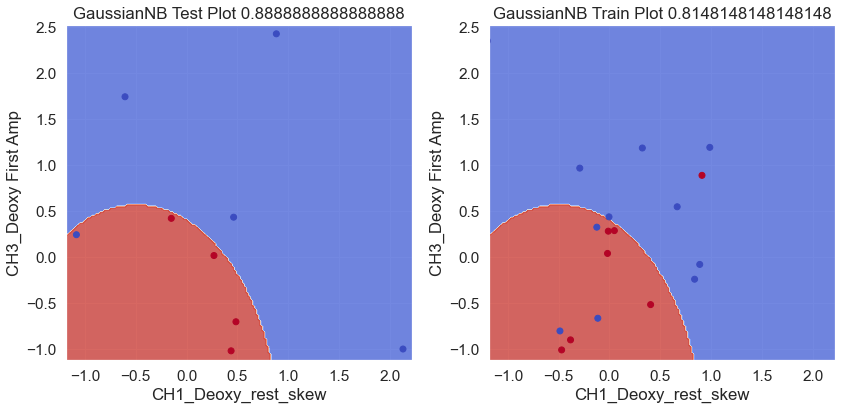

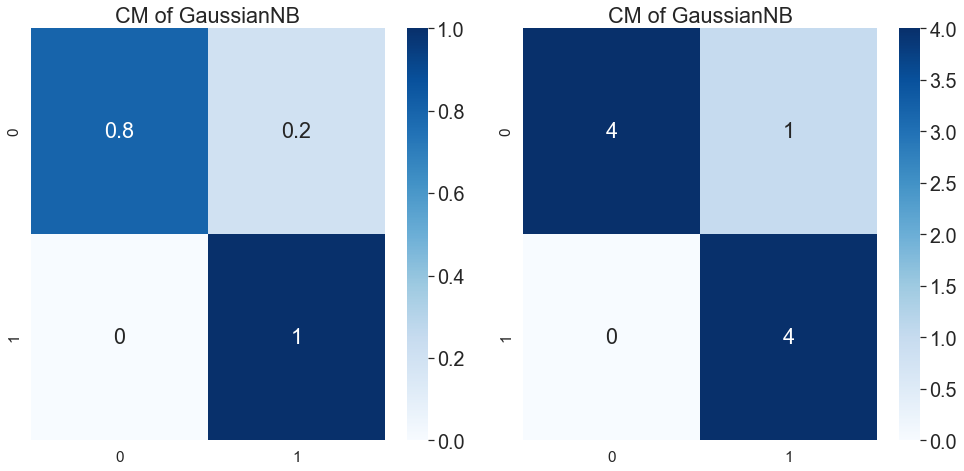

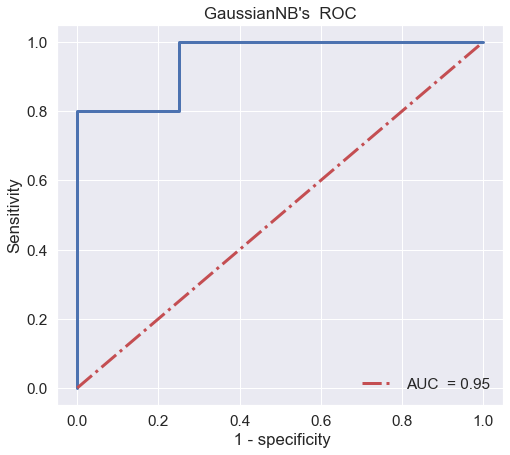

3 rand =  3
train  0.8148148148148148
test 0.8888888888888888


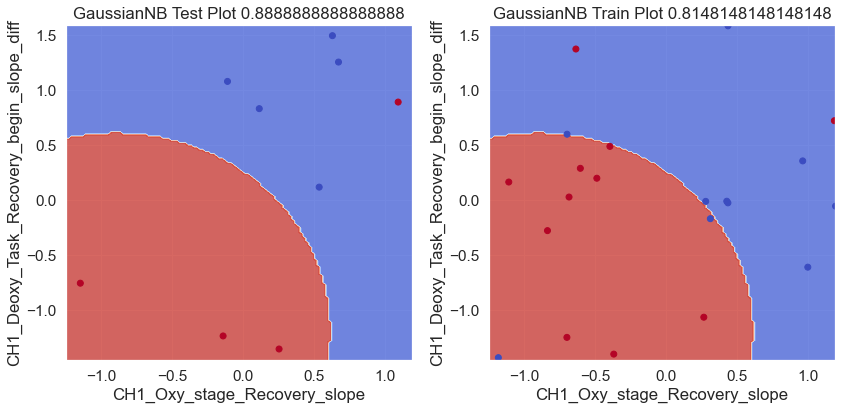

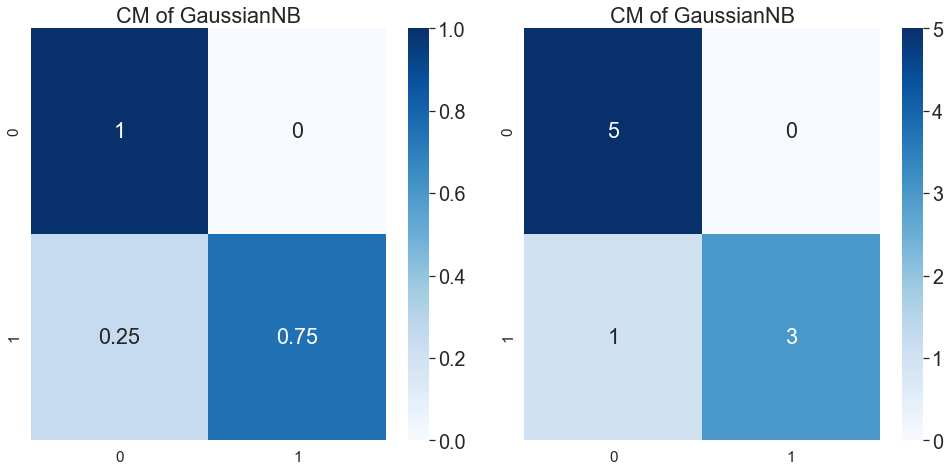

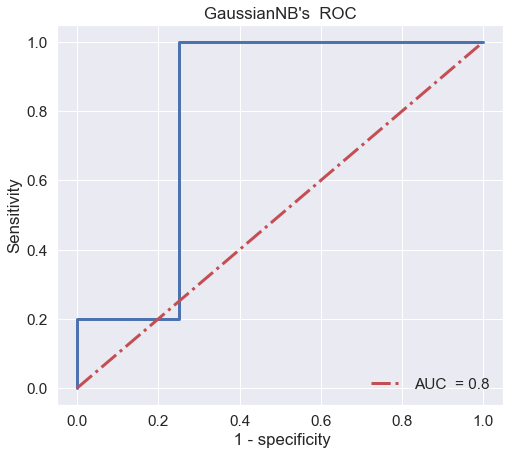

4 5 rand =  5
train  0.8148148148148148
test 0.8888888888888888


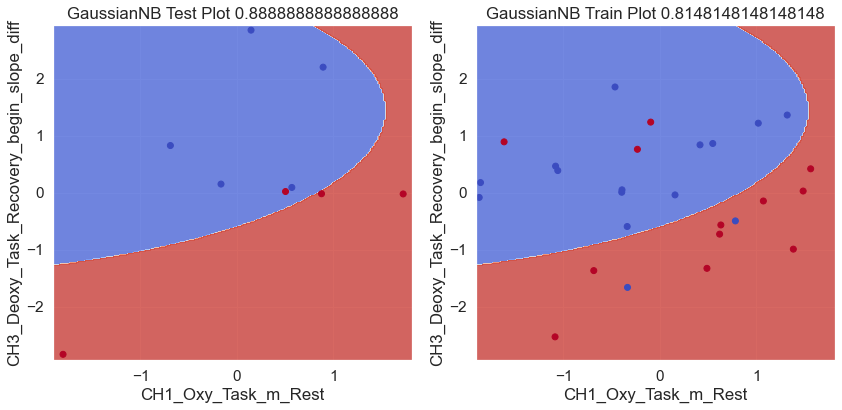

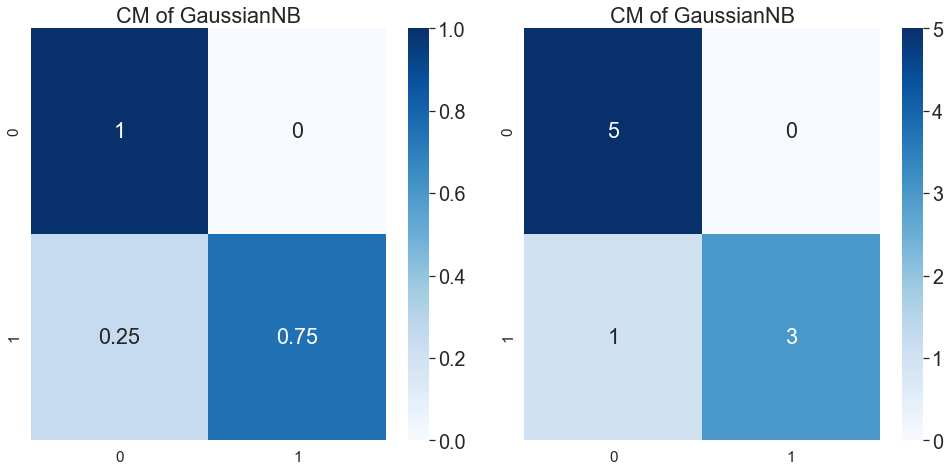

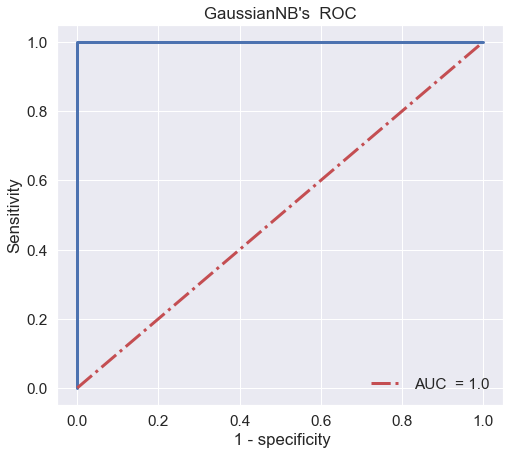

6 rand =  6
train  0.8148148148148148
test 0.8888888888888888


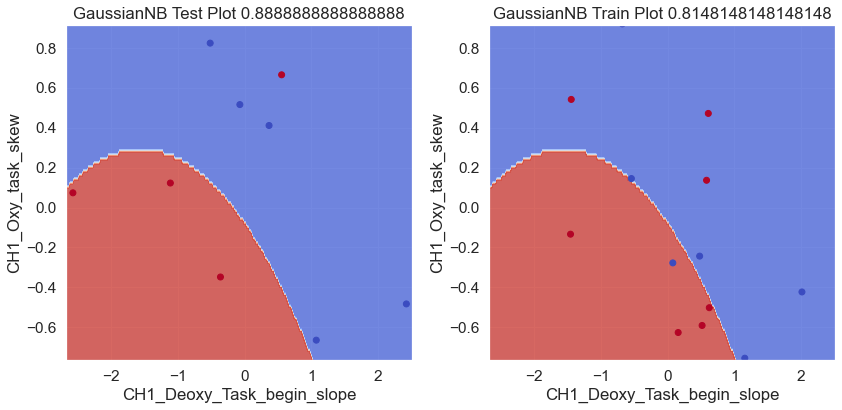

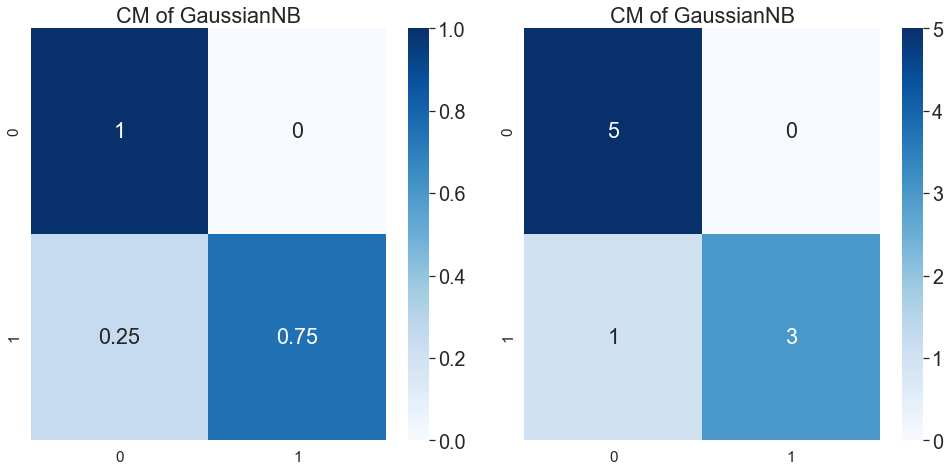

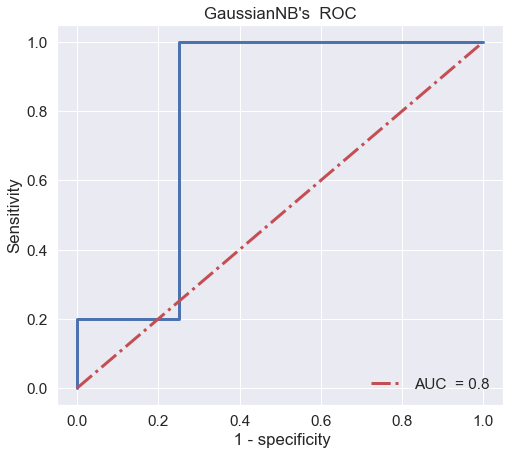

rand =  6
train  0.8518518518518519
test 0.8888888888888888


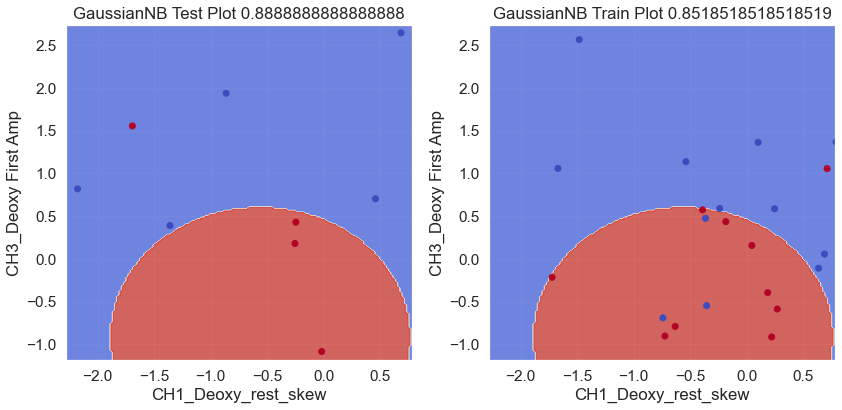

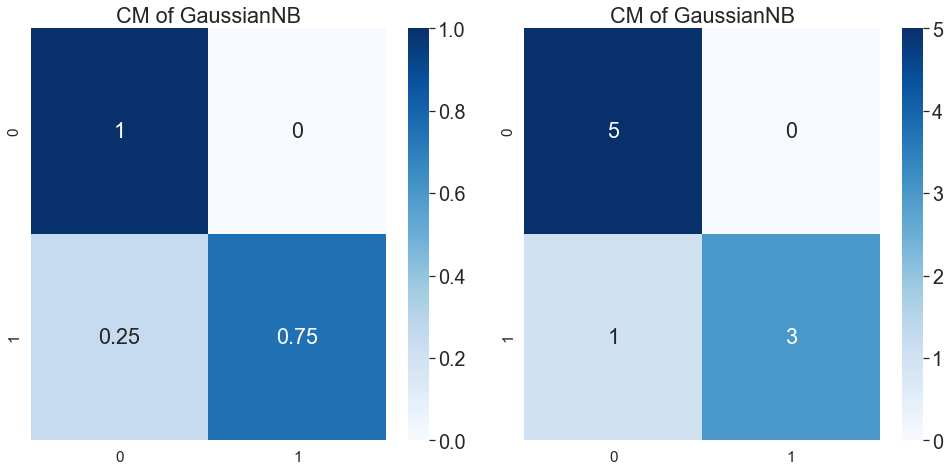

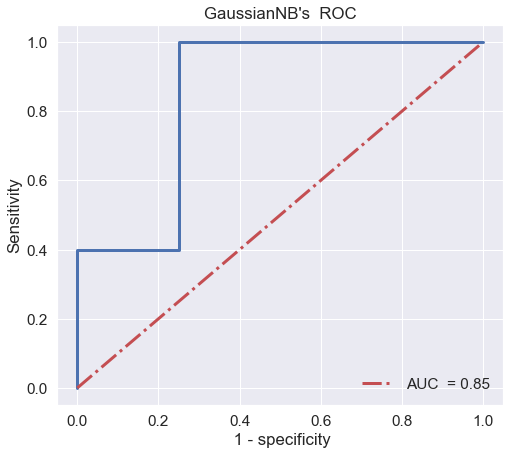

7 rand =  7
train  0.8148148148148148
test 0.8888888888888888


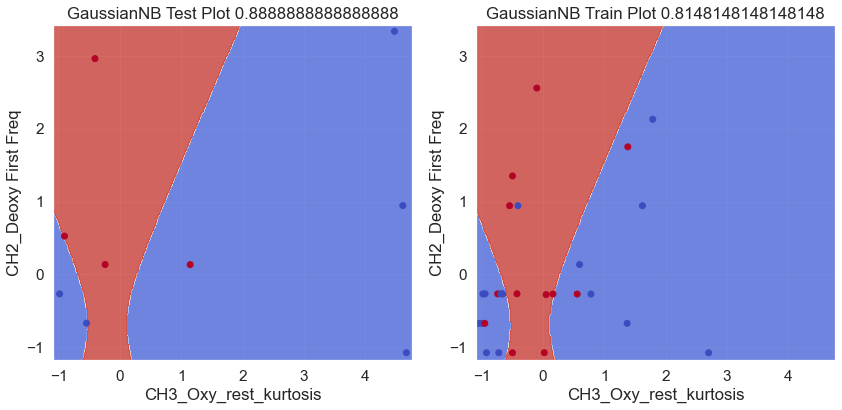

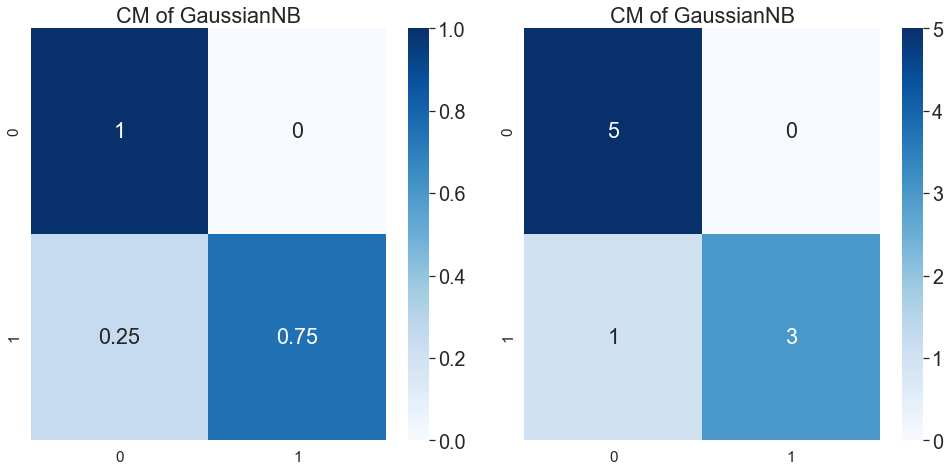

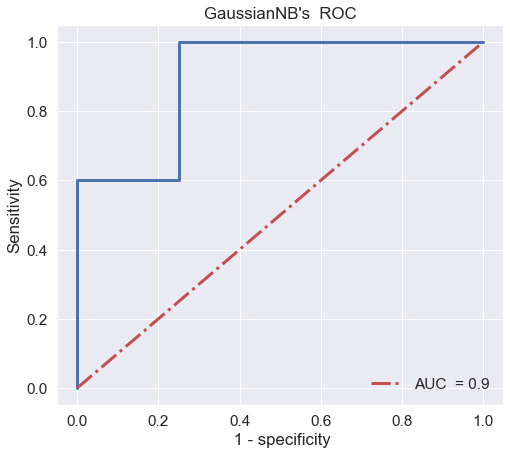

8 rand =  8
train  0.8148148148148148
test 0.8888888888888888


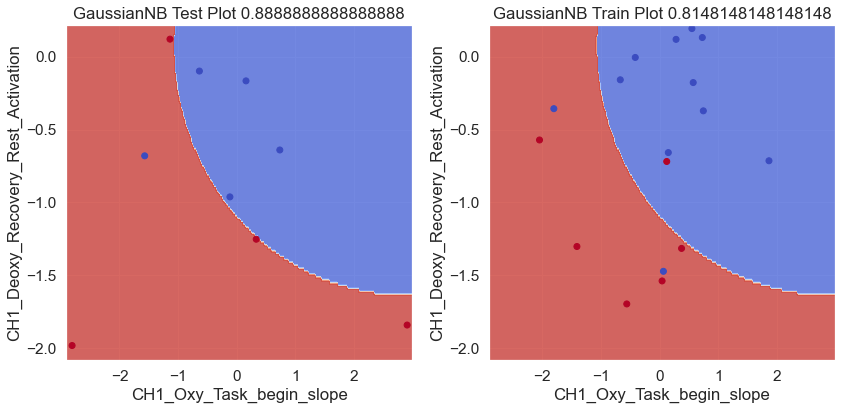

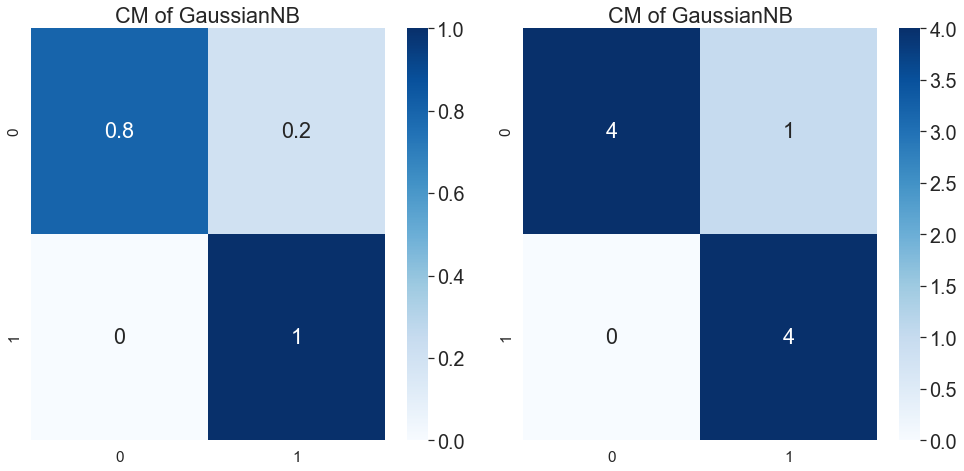

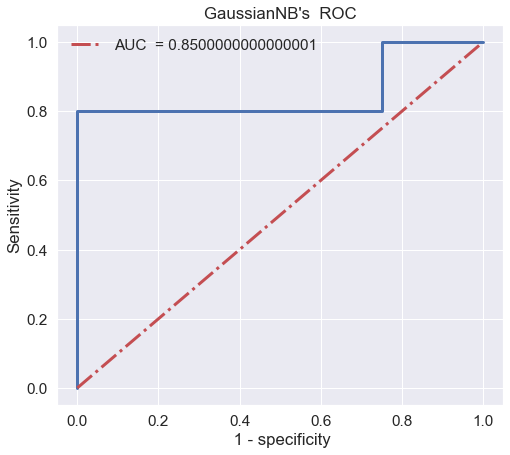

rand =  8
train  0.8148148148148148
test 0.8888888888888888


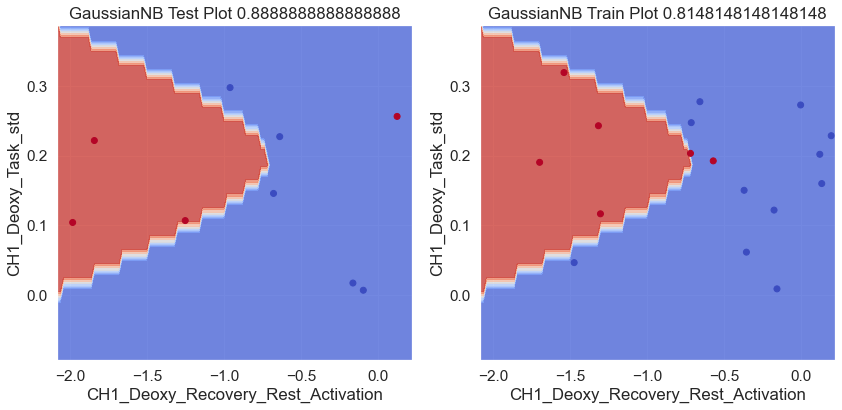

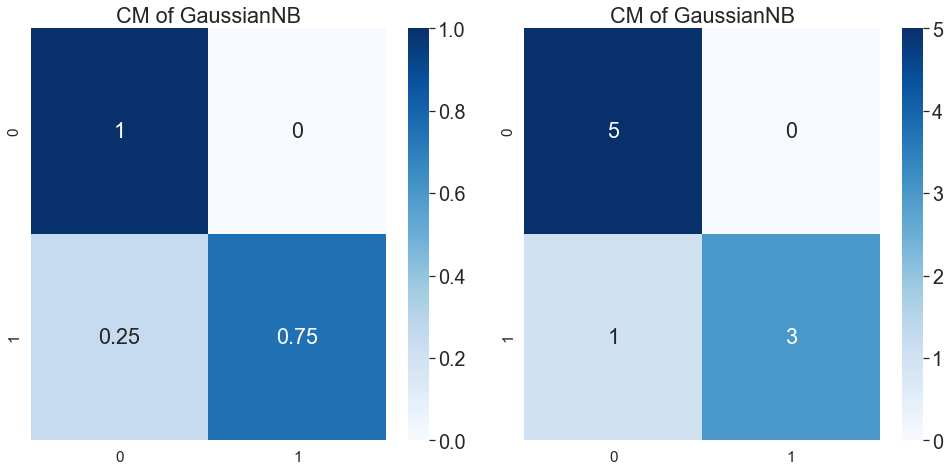

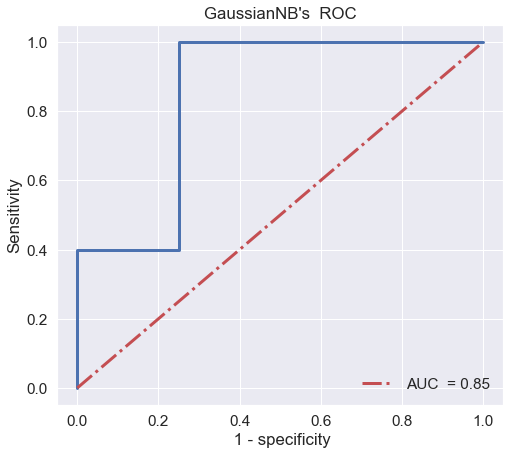

rand =  8
train  0.8148148148148148
test 0.8888888888888888


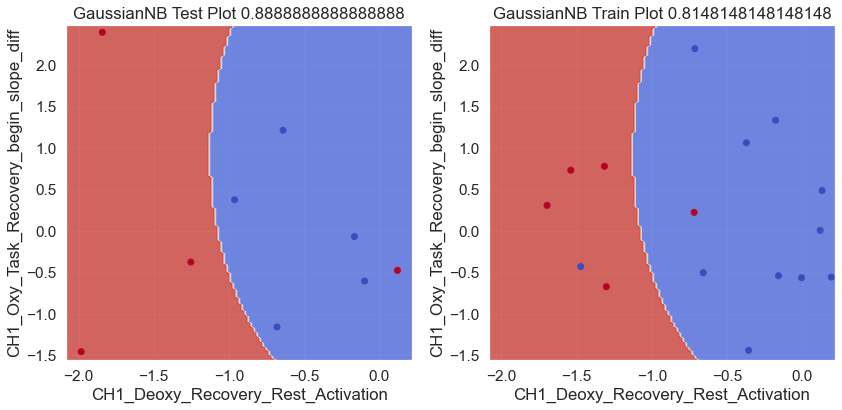

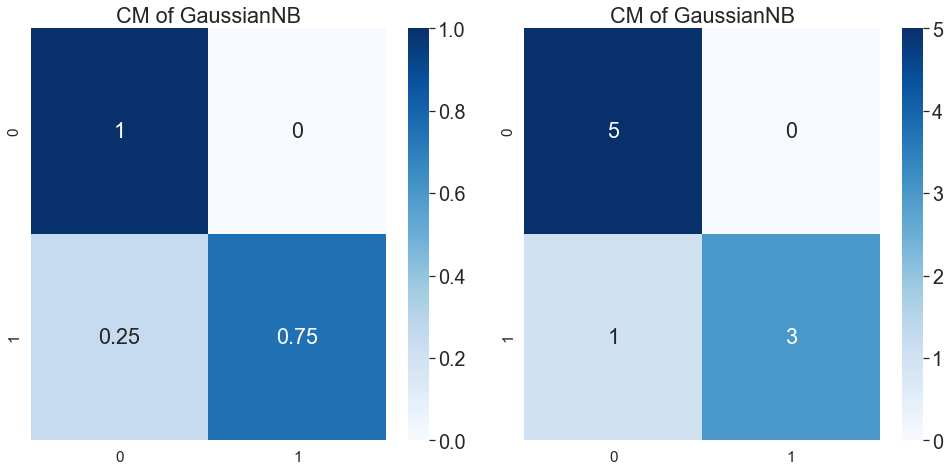

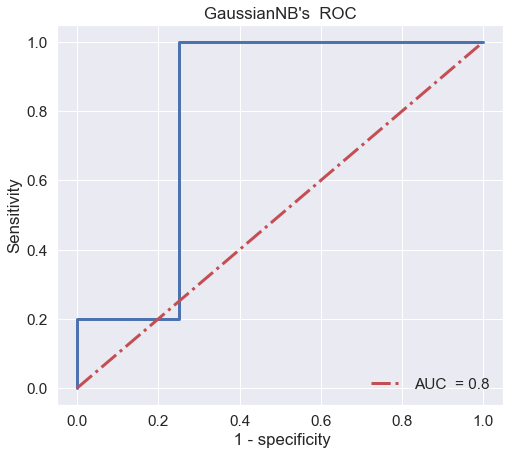

9 rand =  9
train  0.8148148148148148
test 0.8888888888888888


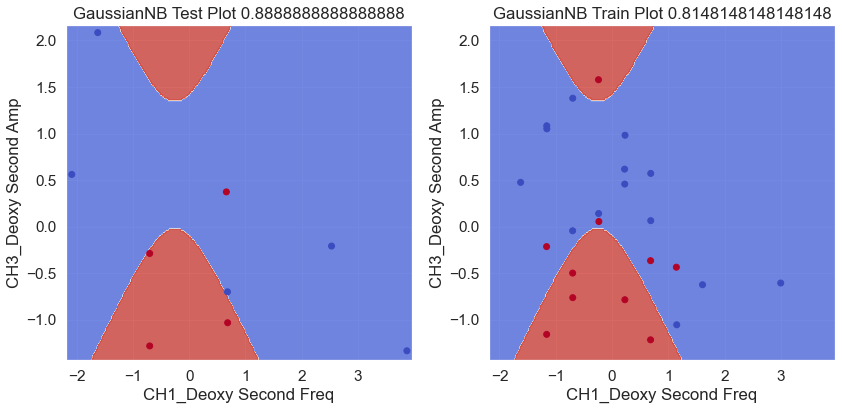

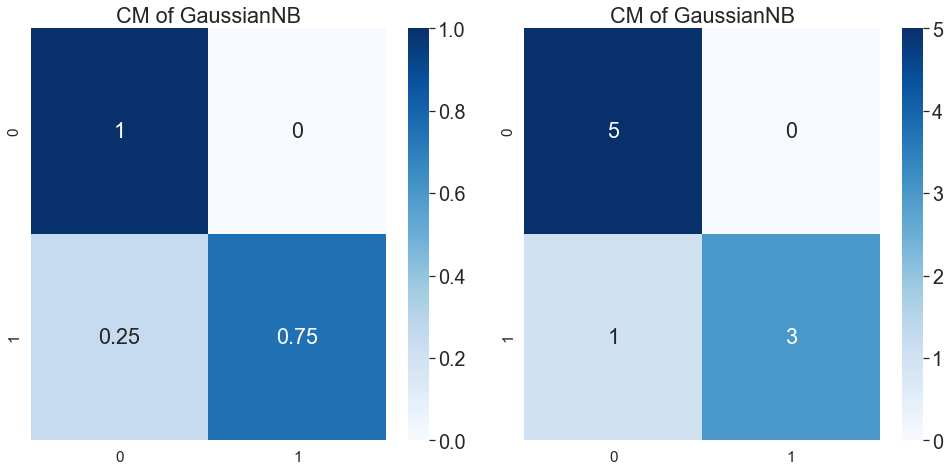

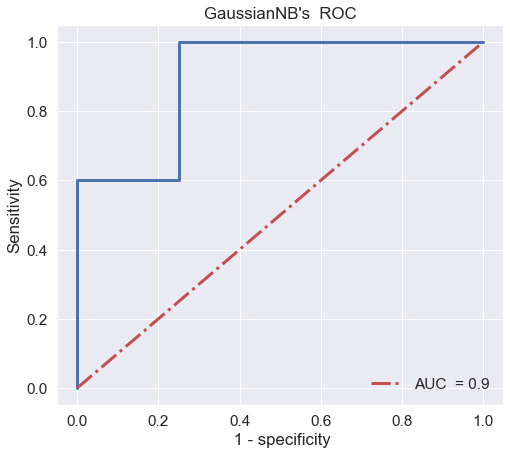

10 11 rand =  11
train  0.8148148148148148
test 0.8888888888888888


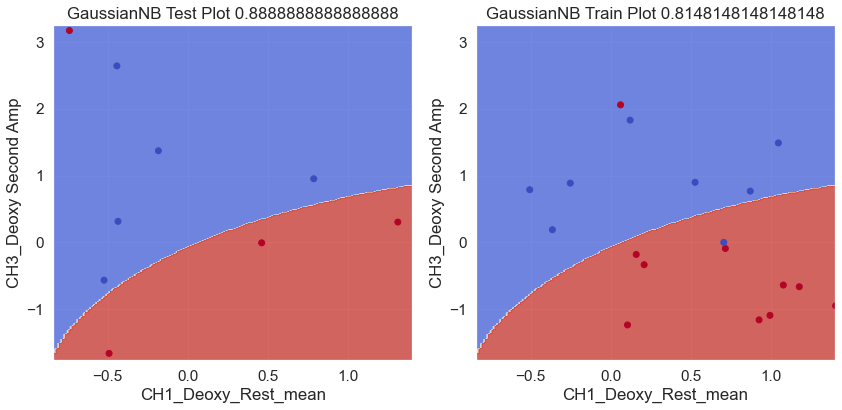

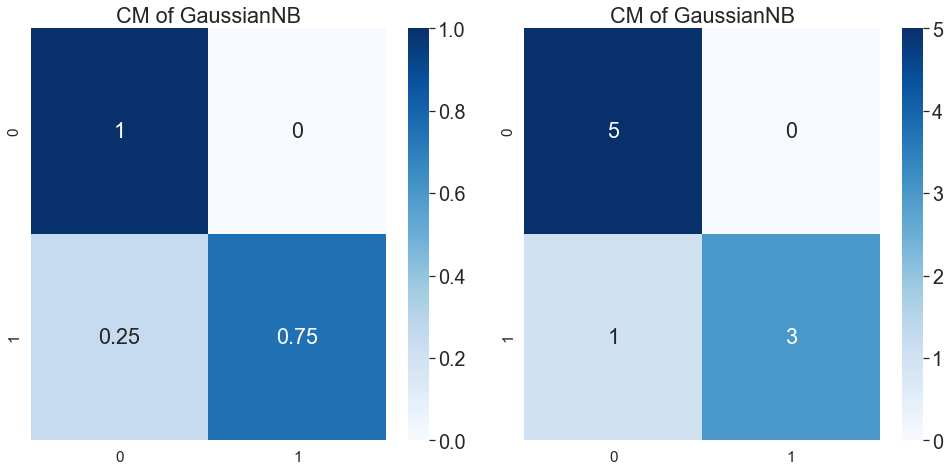

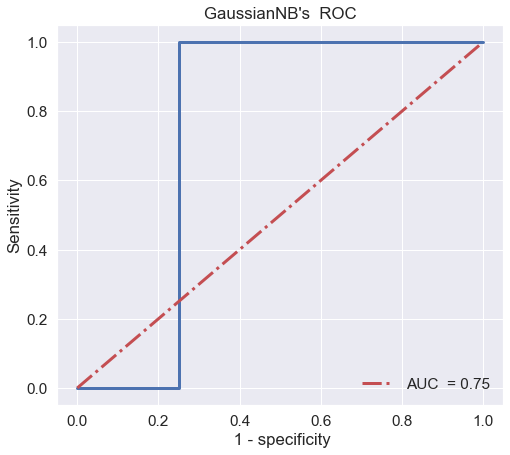

rand =  11
train  0.8888888888888888
test 0.8888888888888888


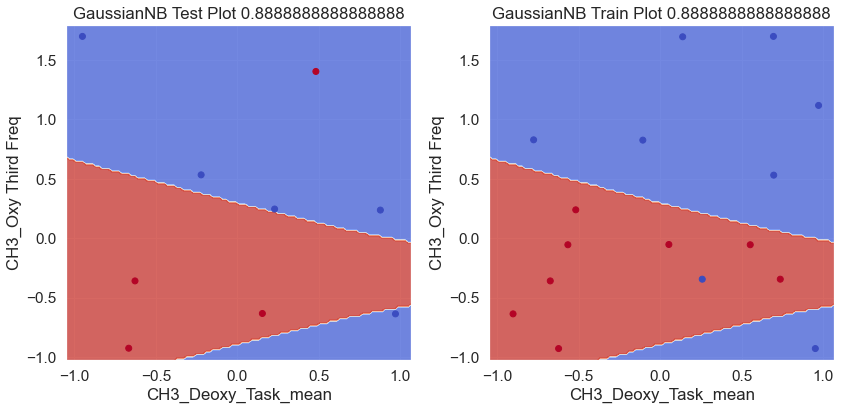

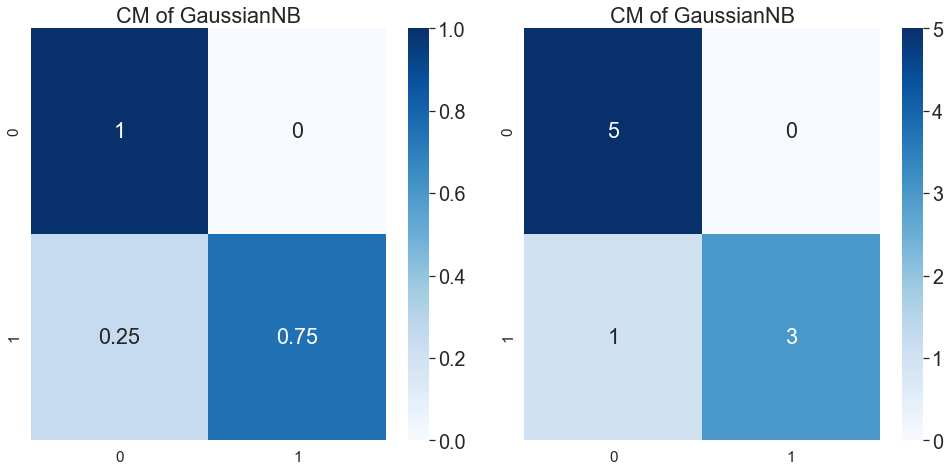

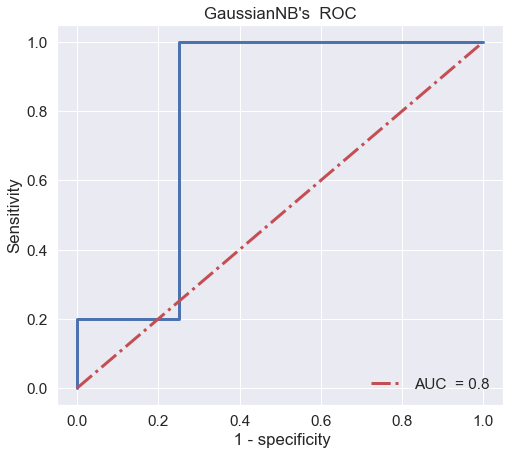

rand =  11
train  0.8148148148148148
test 0.8888888888888888


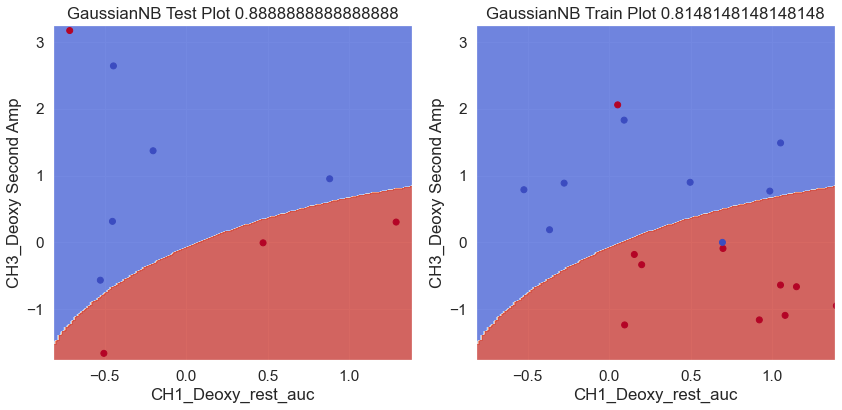

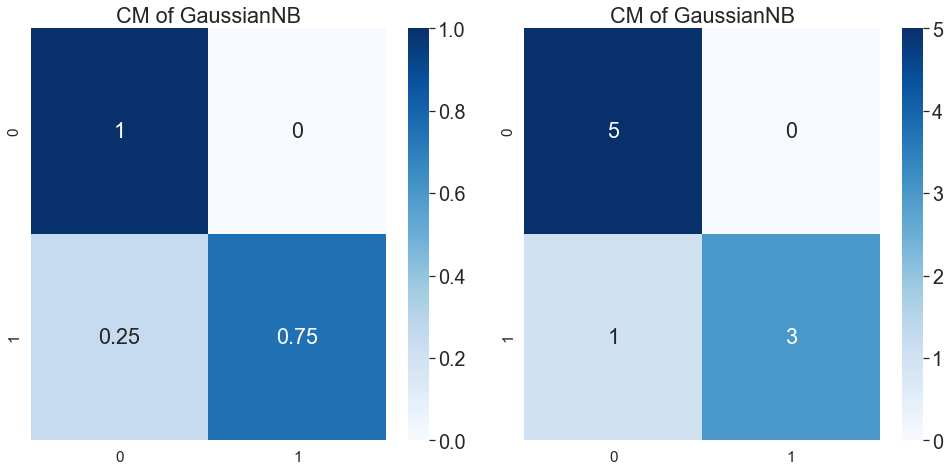

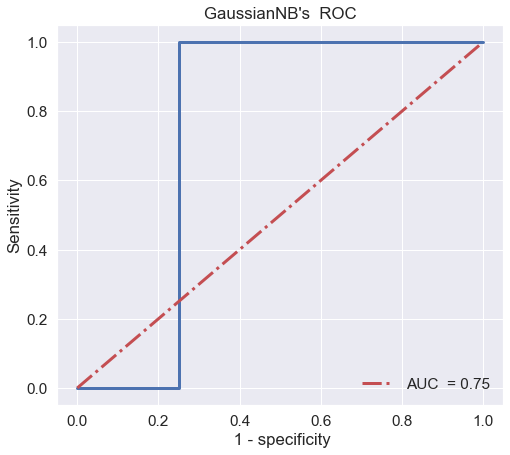

rand =  11
train  0.8888888888888888
test 0.8888888888888888


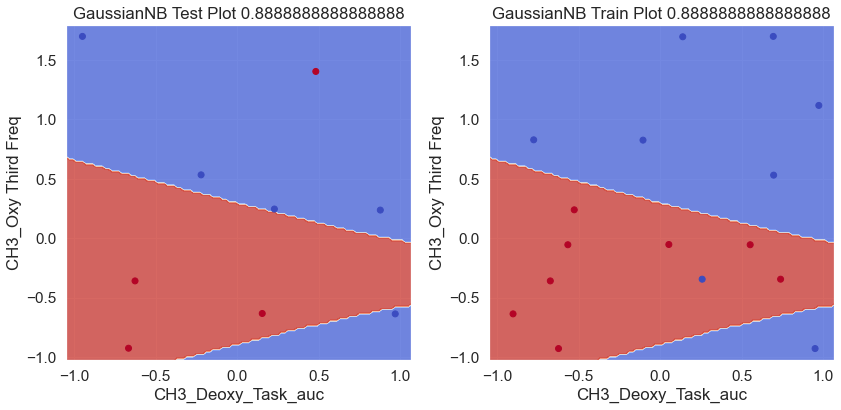

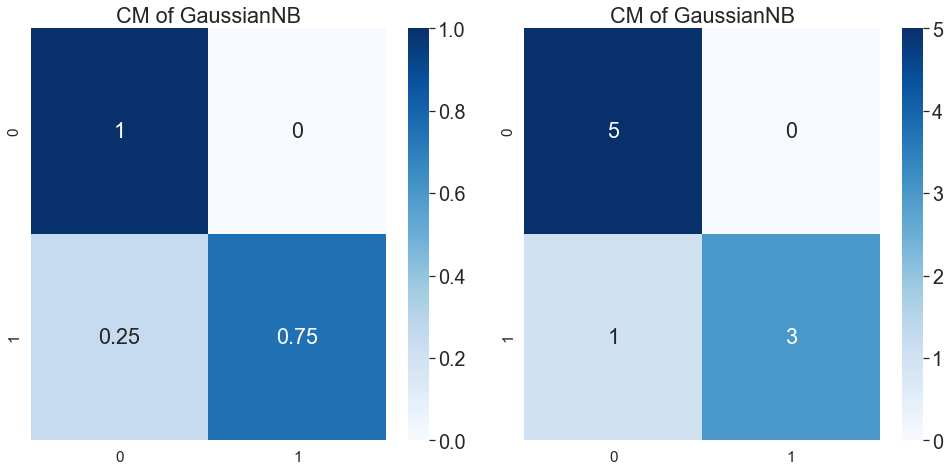

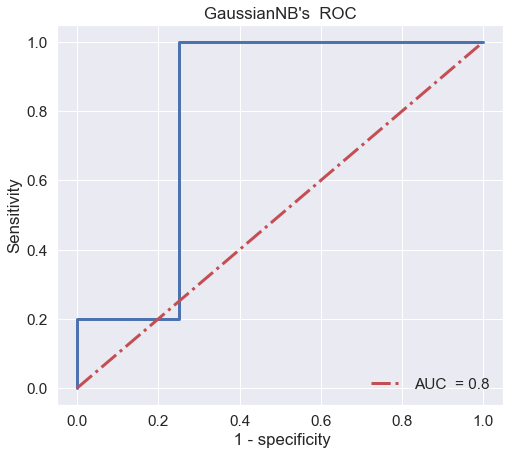

rand =  11
train  0.8148148148148148
test 0.8888888888888888


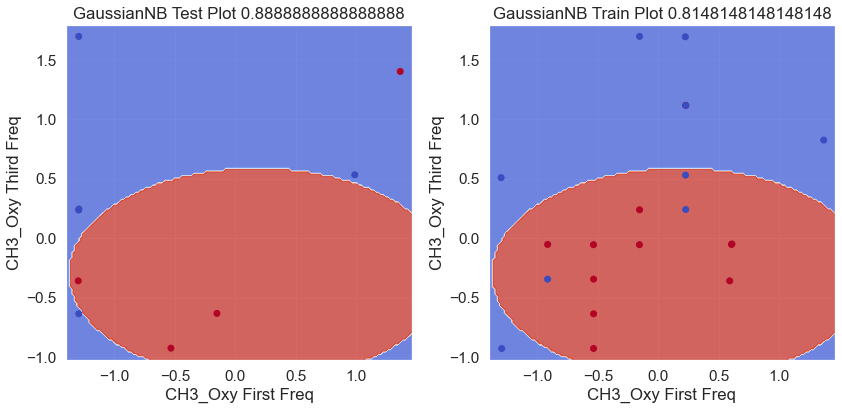

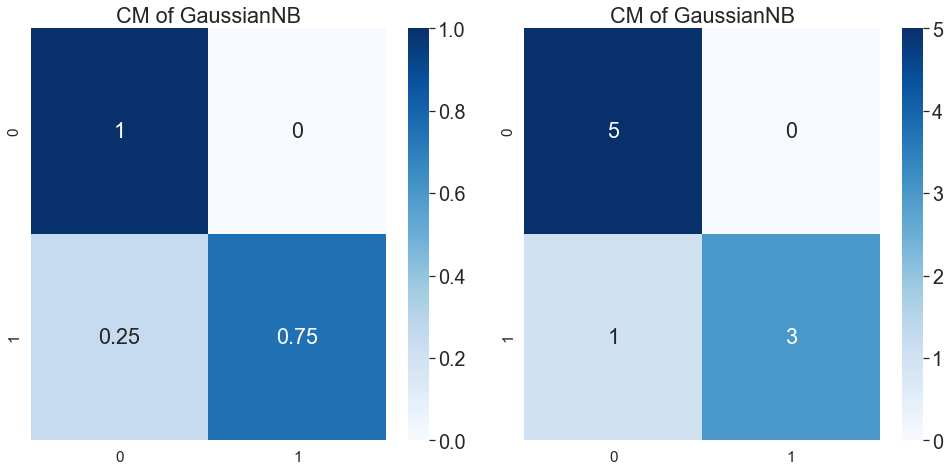

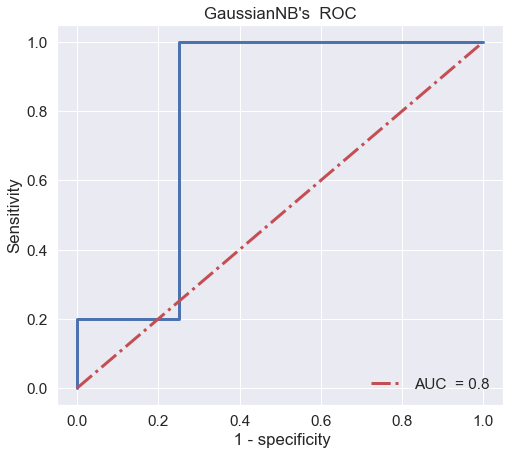

rand =  11
train  0.8148148148148148
test 0.8888888888888888


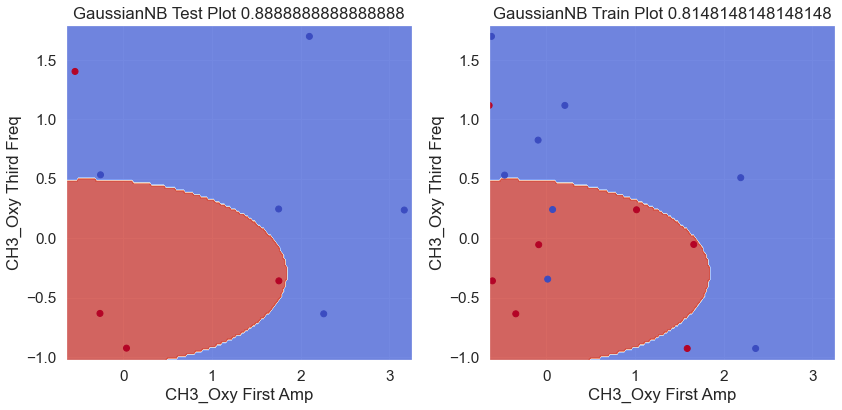

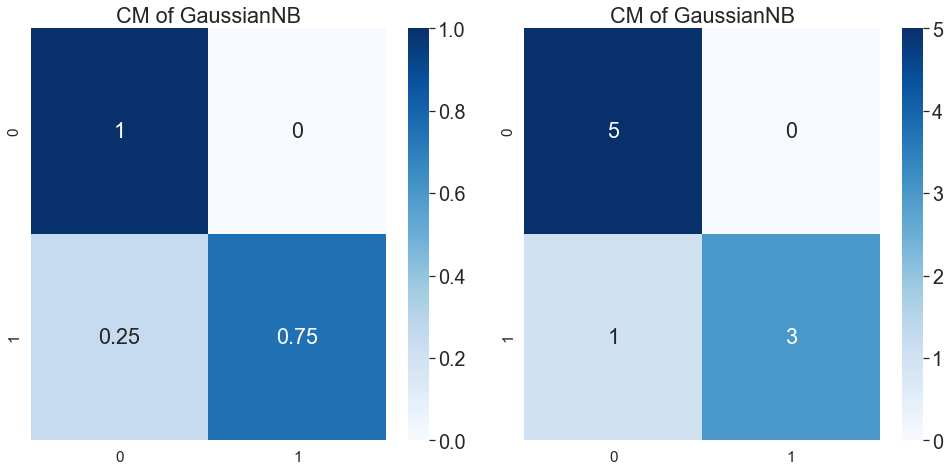

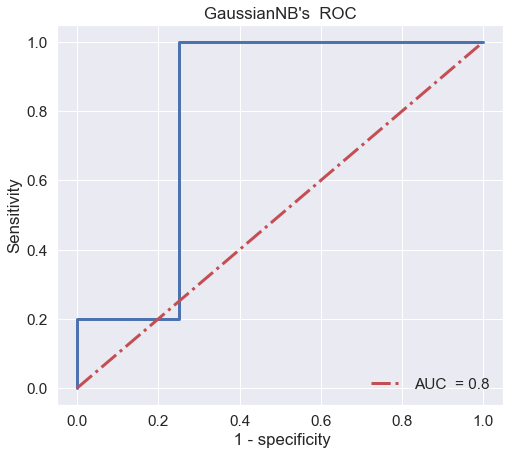

12 rand =  12
train  0.8148148148148148
test 0.8888888888888888


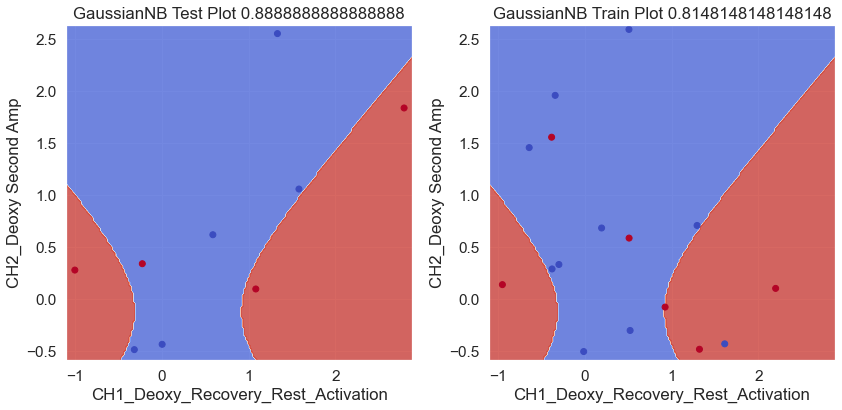

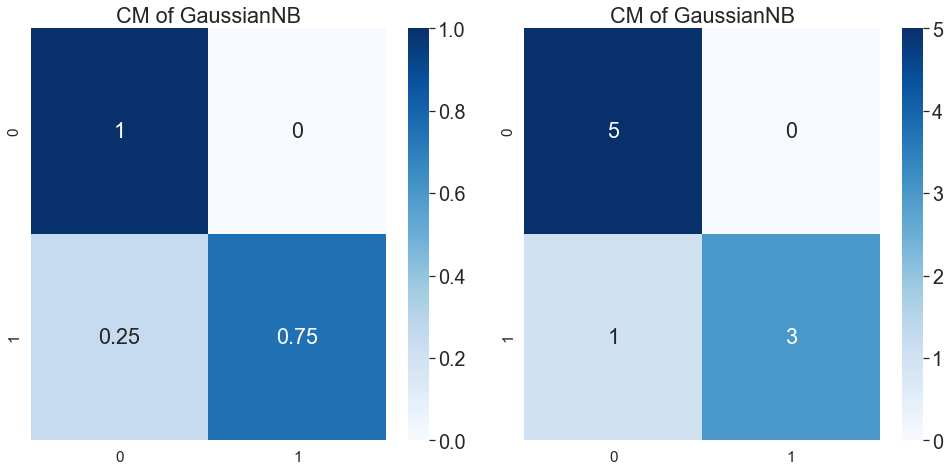

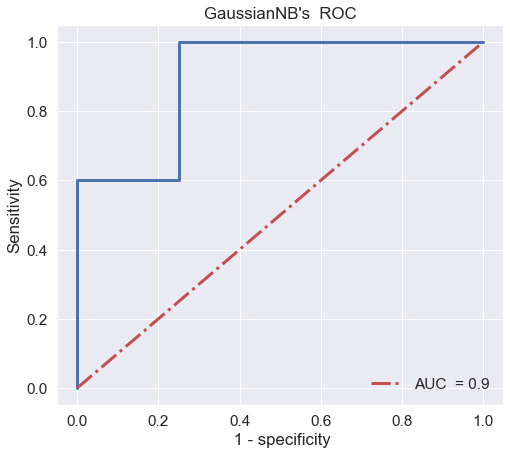

13 rand =  13
train  0.8148148148148148
test 0.8888888888888888


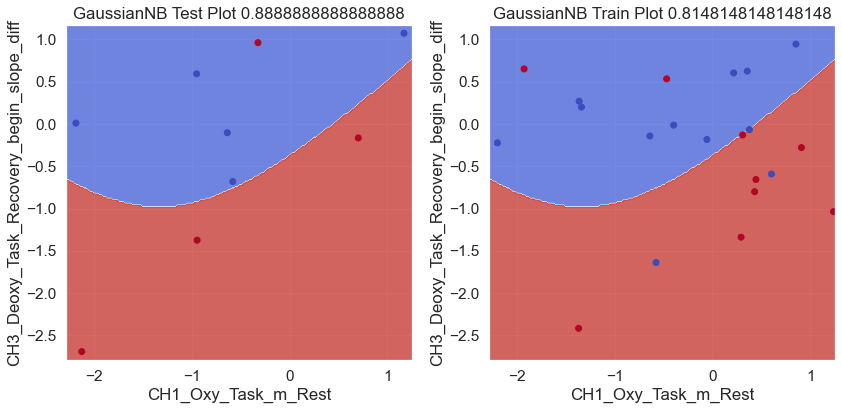

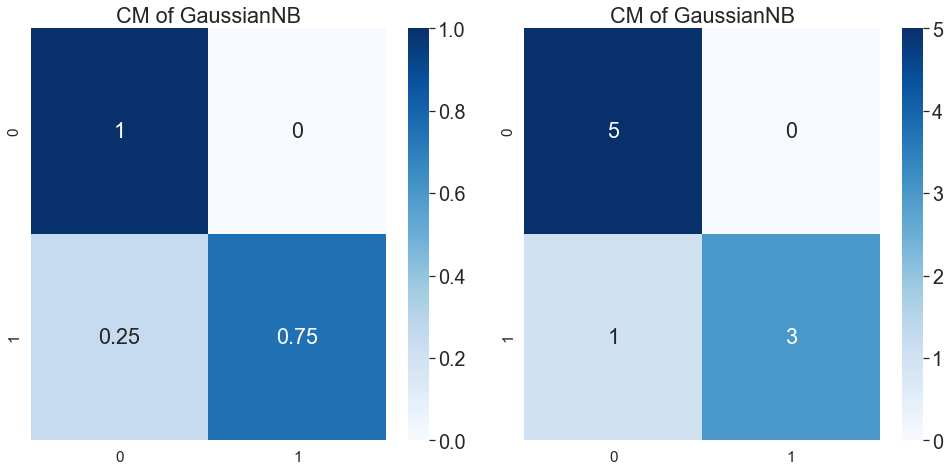

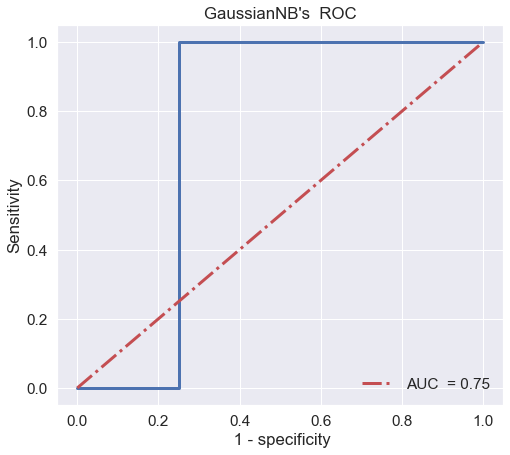

14 15 rand =  15
train  0.8148148148148148
test 0.8888888888888888


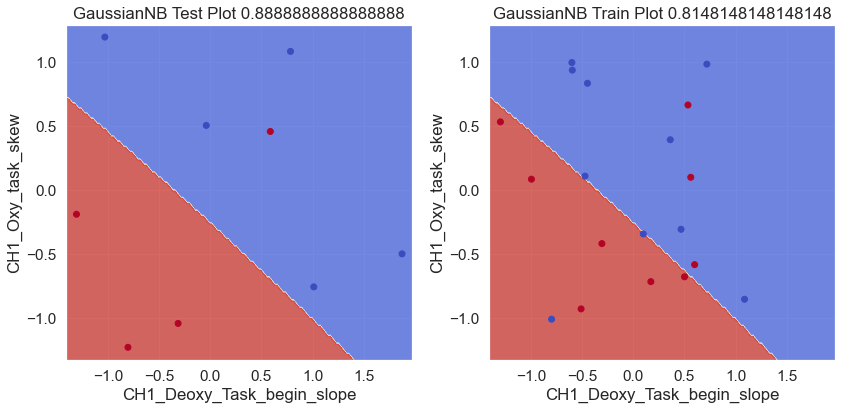

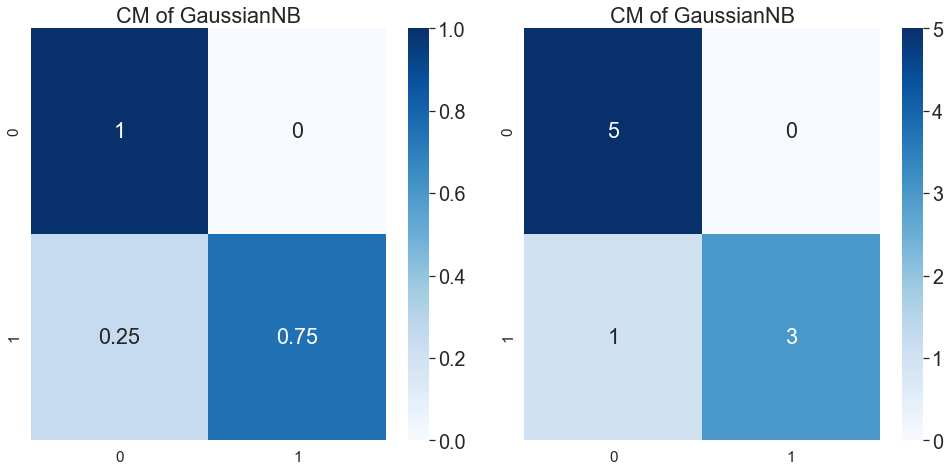

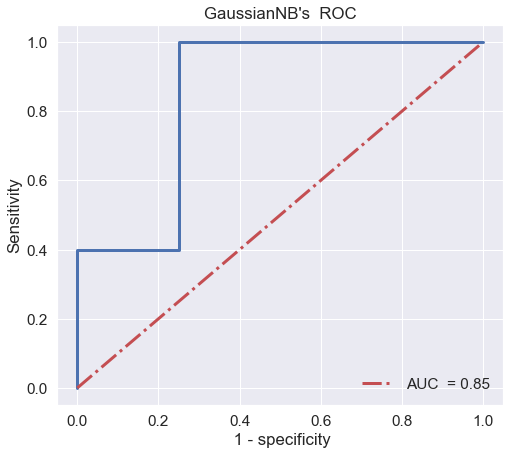

16 rand =  16
train  0.8518518518518519
test 0.8888888888888888


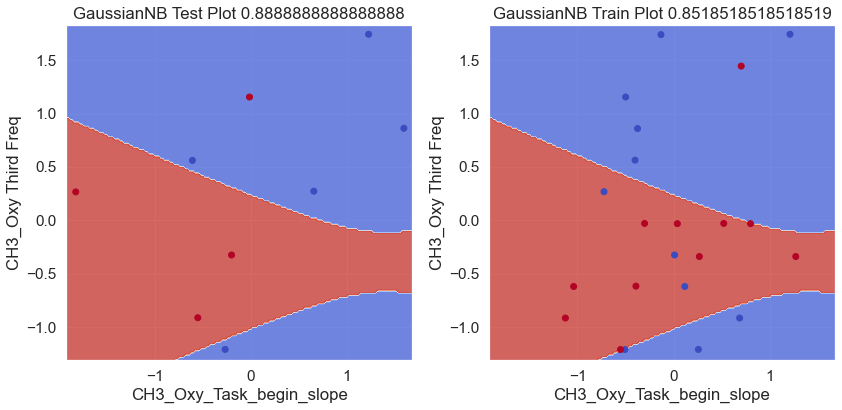

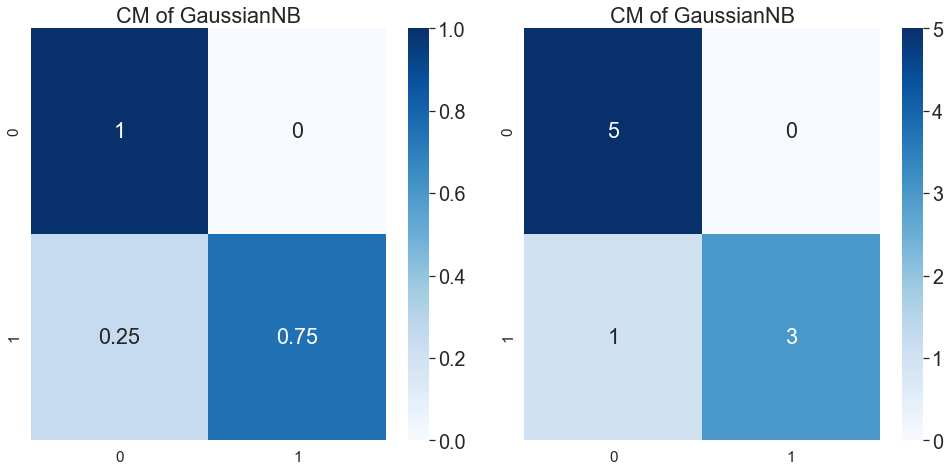

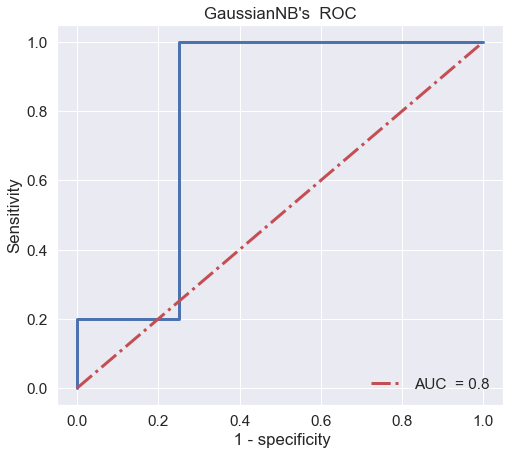

rand =  16
train  0.8148148148148148
test 0.8888888888888888


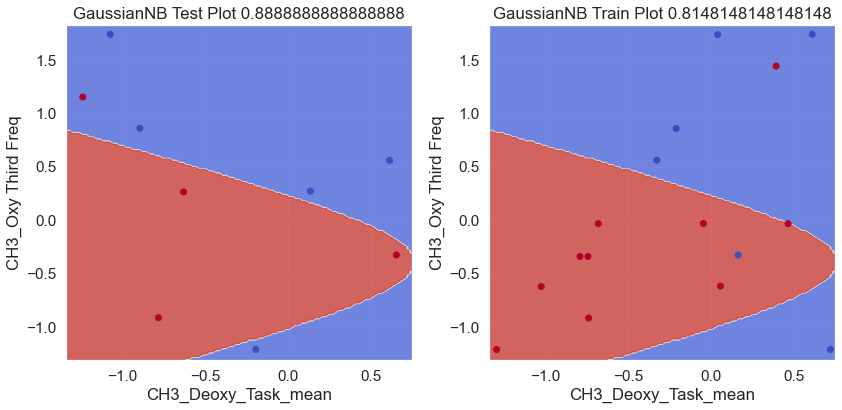

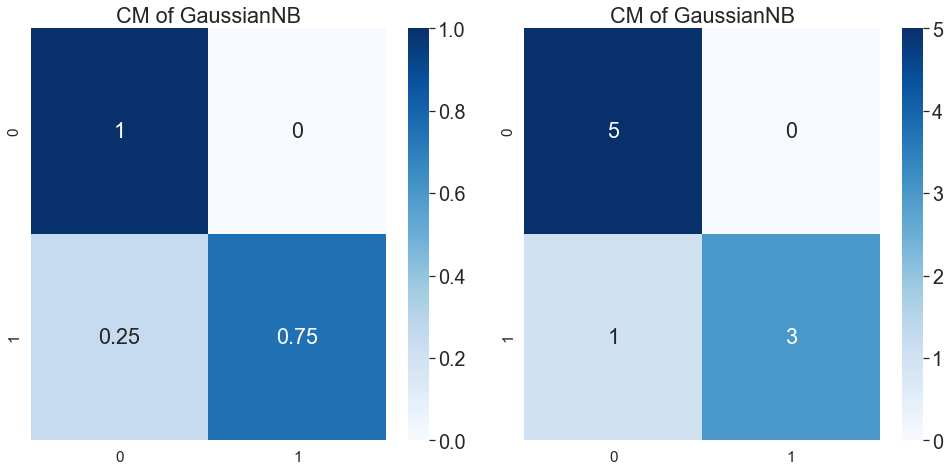

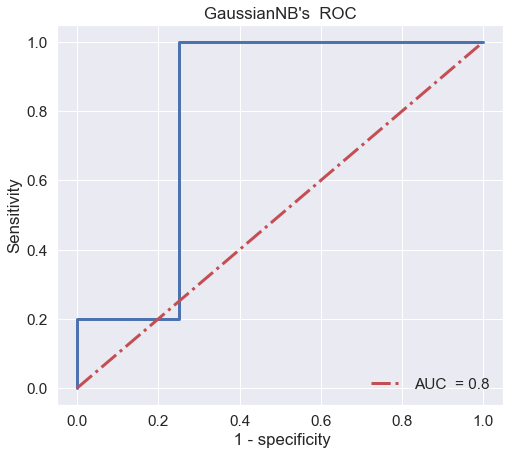

rand =  16
train  0.8148148148148148
test 0.8888888888888888


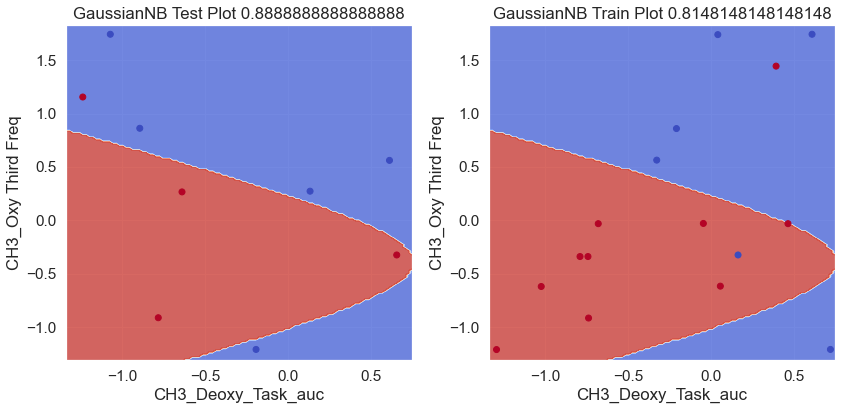

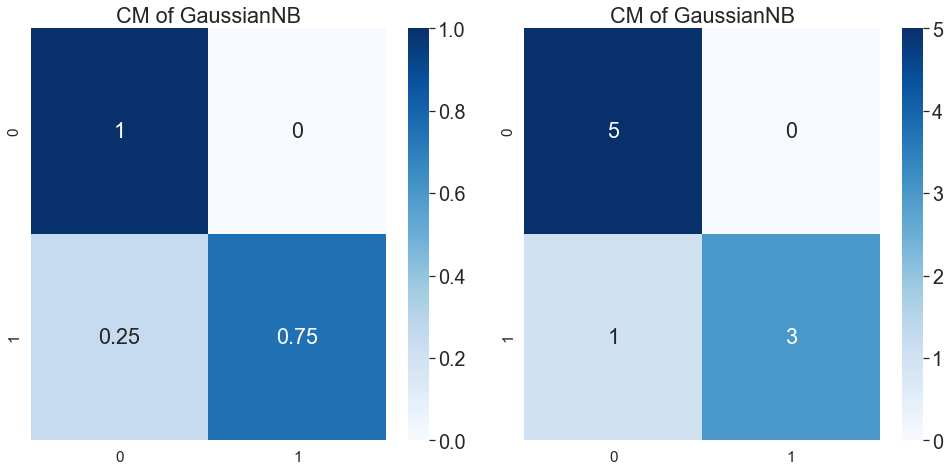

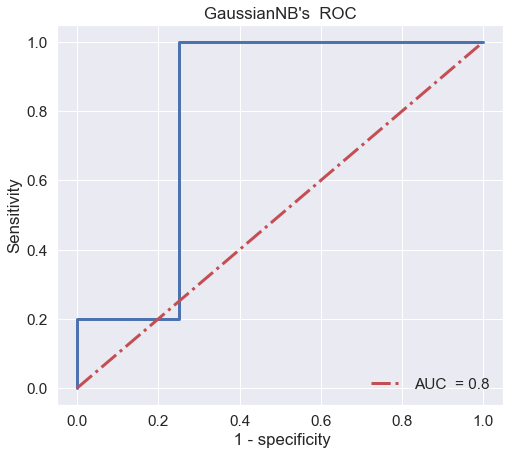

rand =  16
train  0.8518518518518519
test 0.8888888888888888


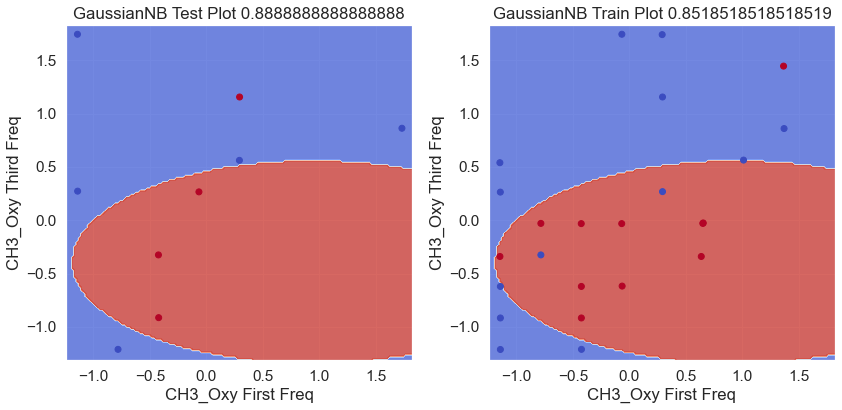

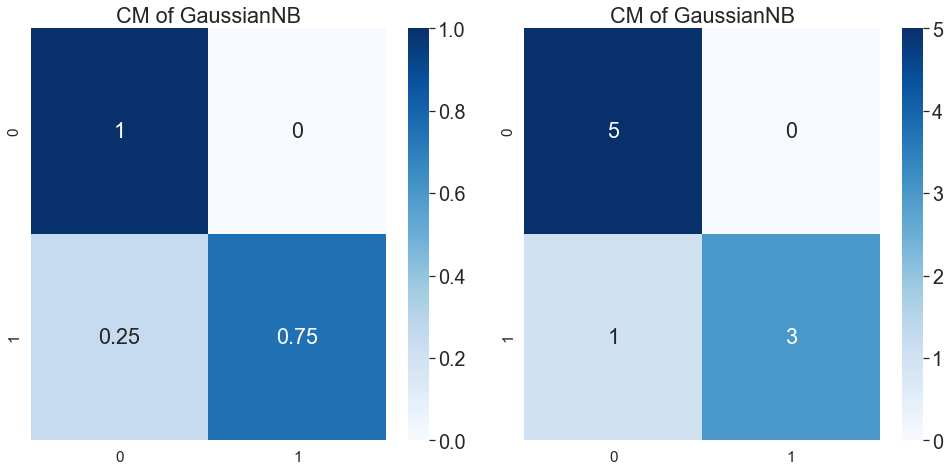

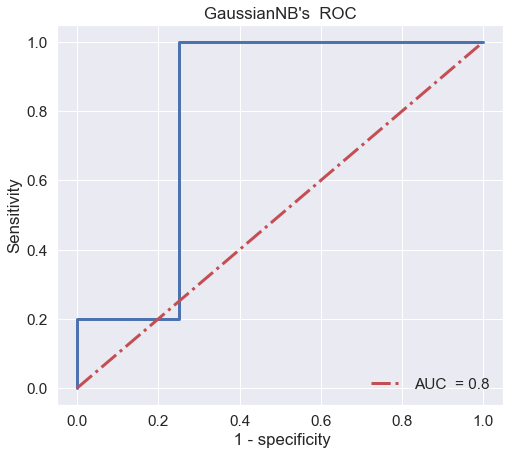

rand =  16
train  0.8148148148148148
test 0.8888888888888888


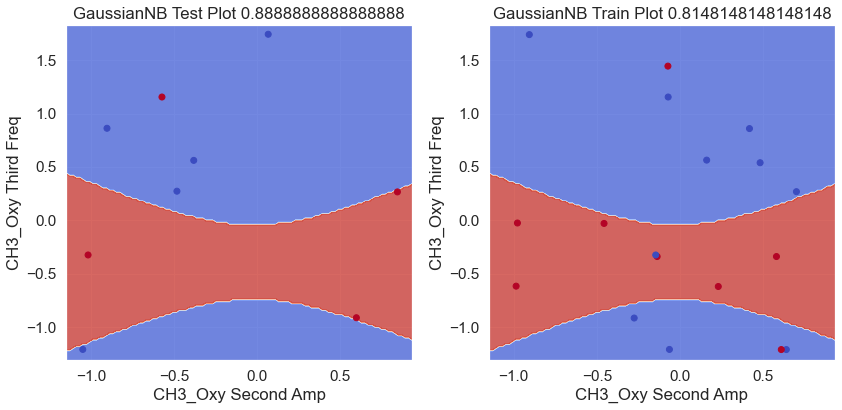

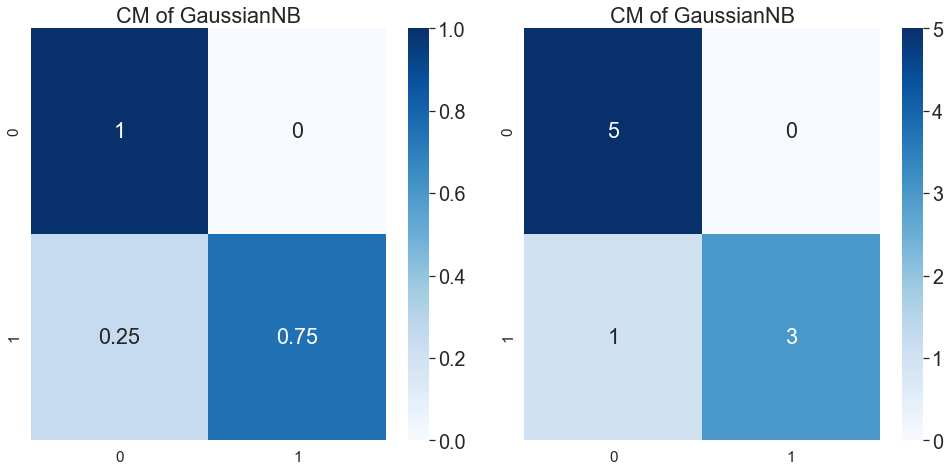

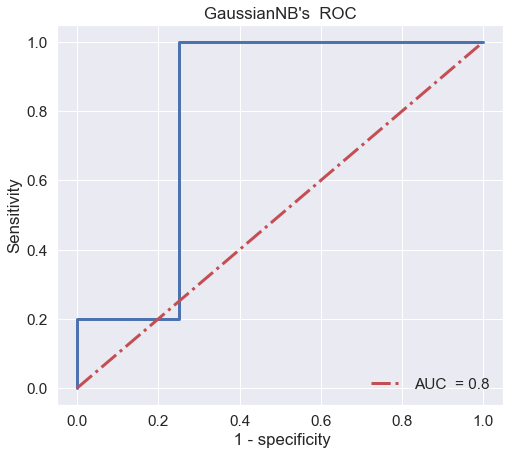

17 18 rand =  18
train  0.8518518518518519
test 0.8888888888888888


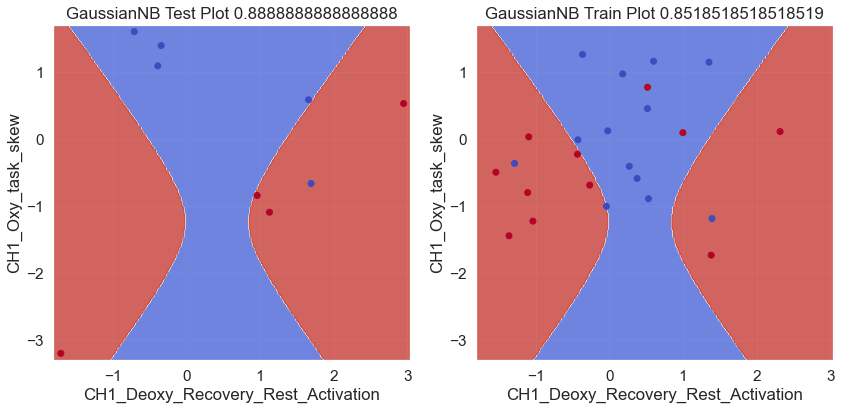

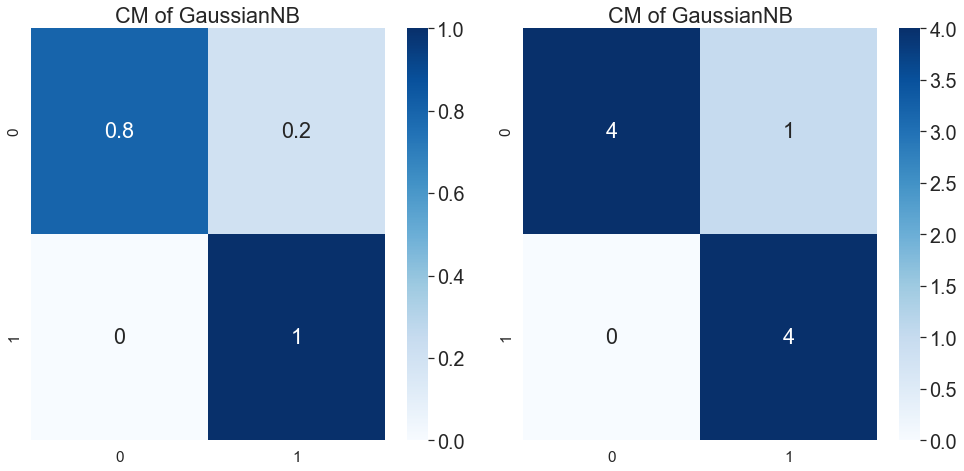

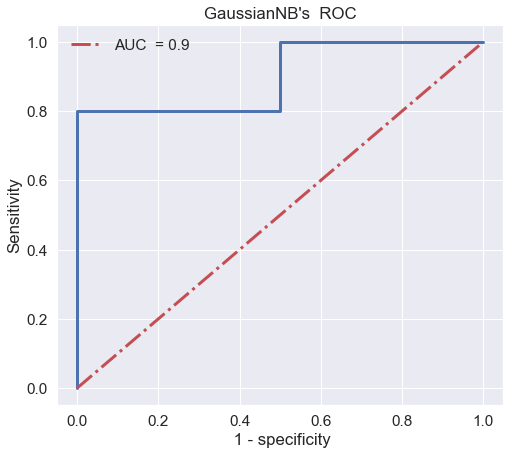

19 rand =  19
train  0.8148148148148148
test 0.8888888888888888


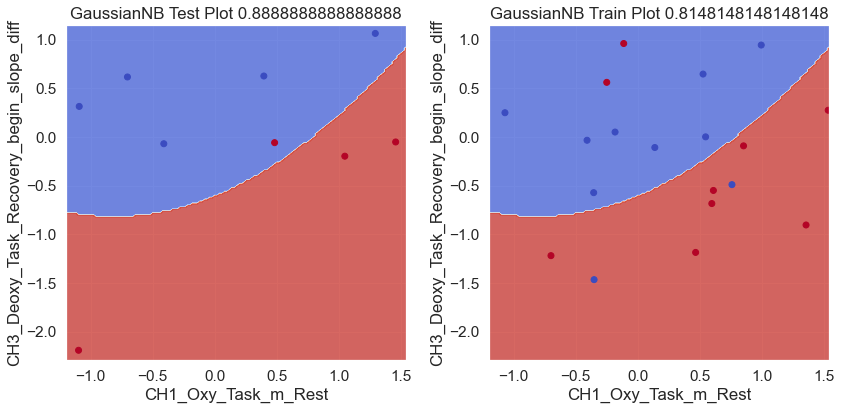

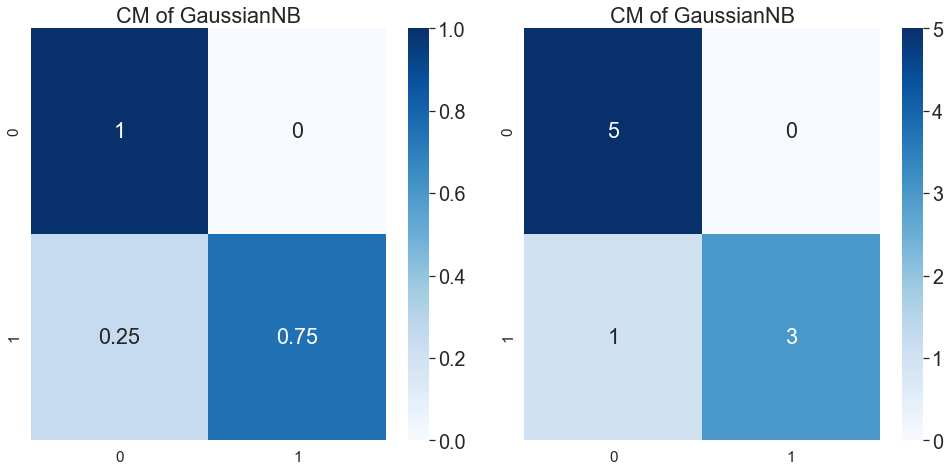

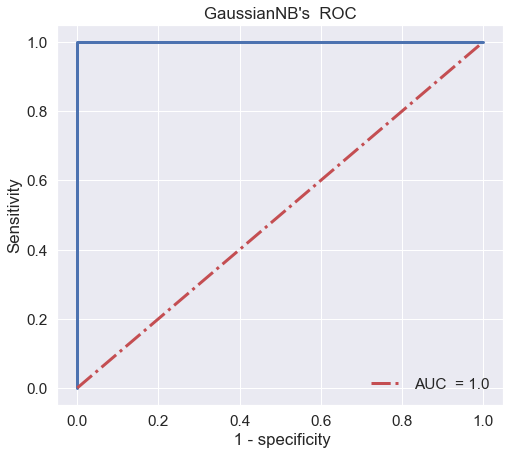

rand =  19
train  0.8148148148148148
test 0.8888888888888888


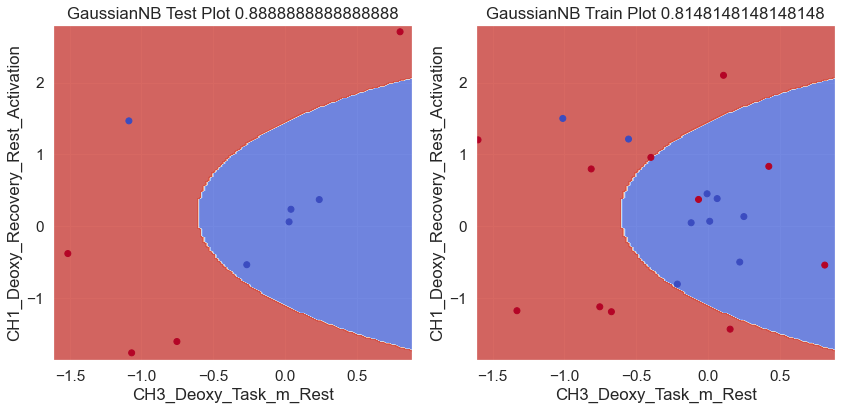

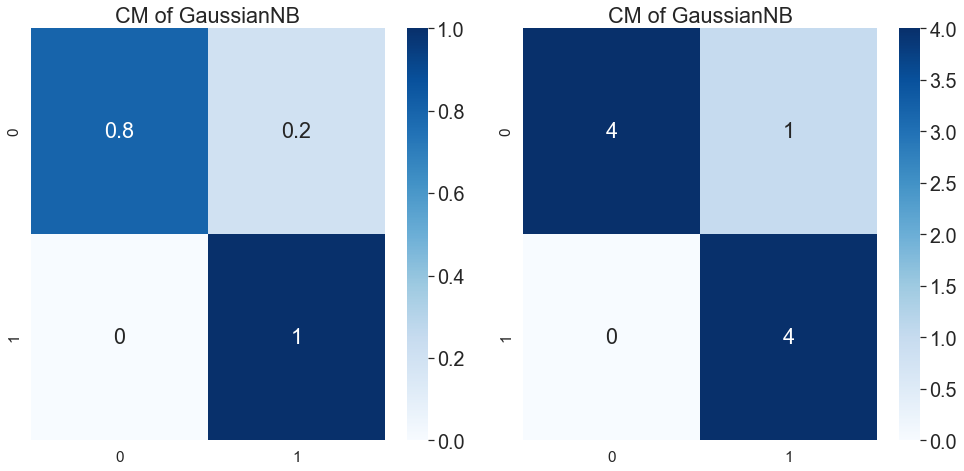

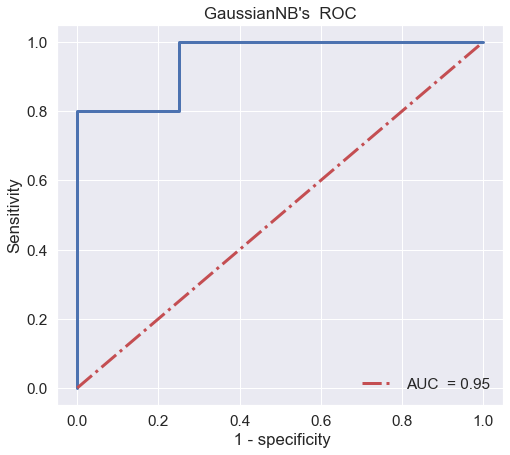

rand =  19
train  0.8148148148148148
test 0.8888888888888888


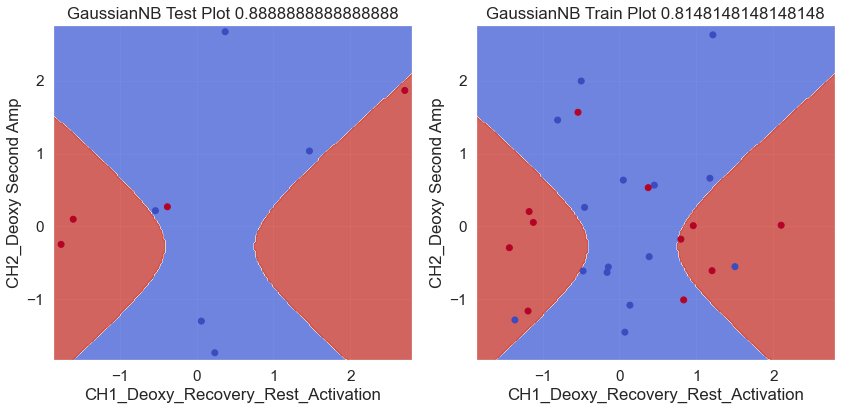

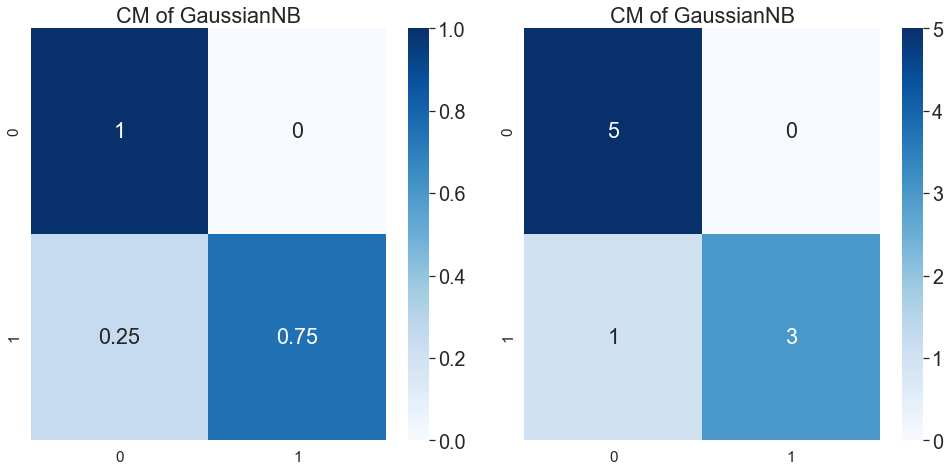

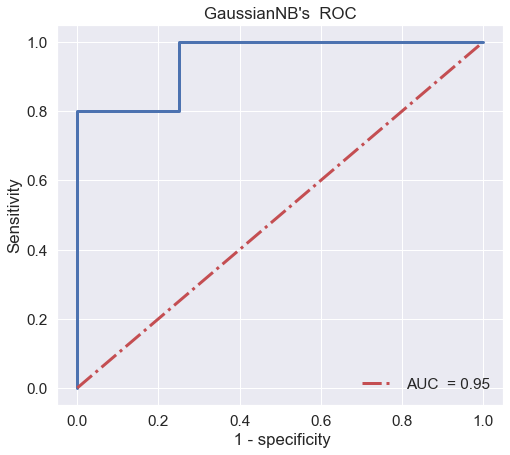

rand =  19
train  0.8148148148148148
test 0.8888888888888888


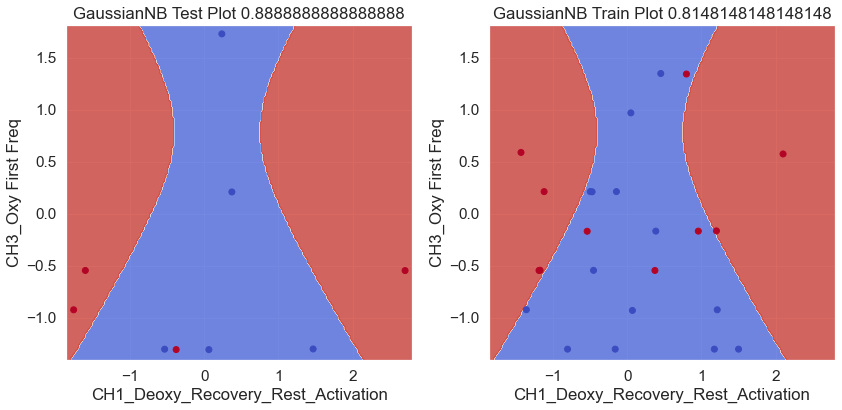

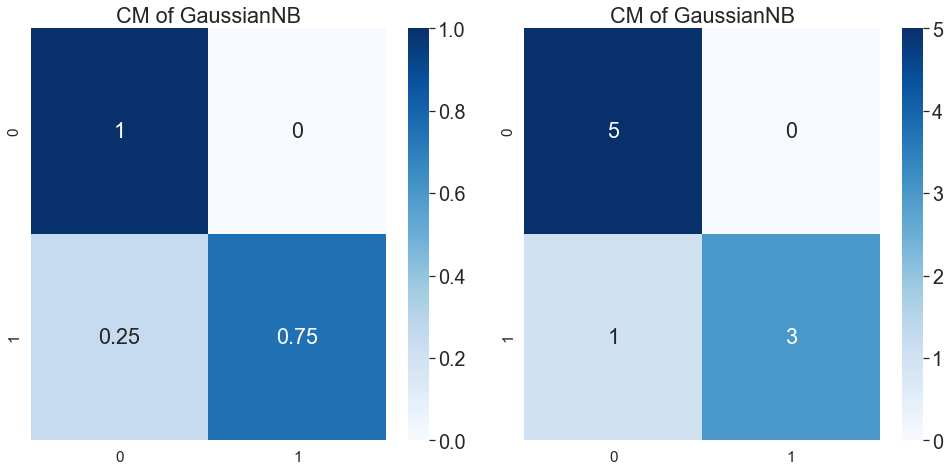

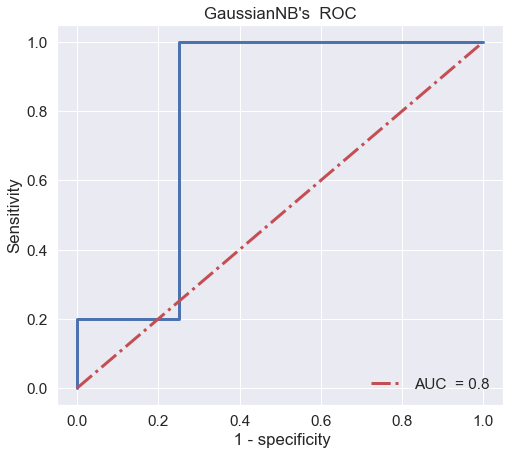

20 rand =  20
train  0.8148148148148148
test 0.8888888888888888


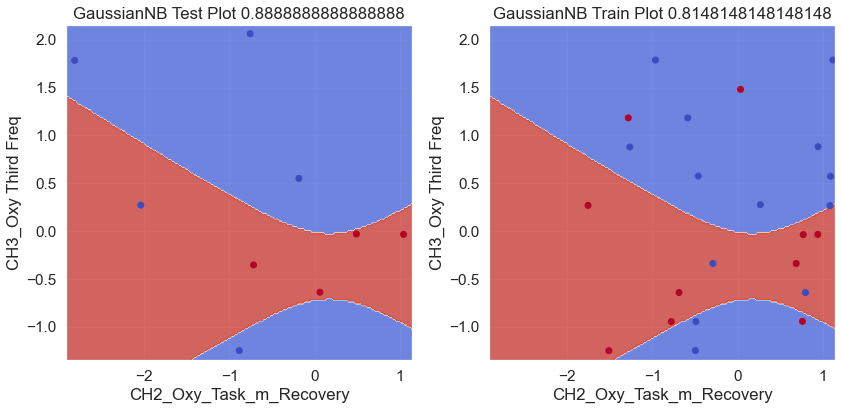

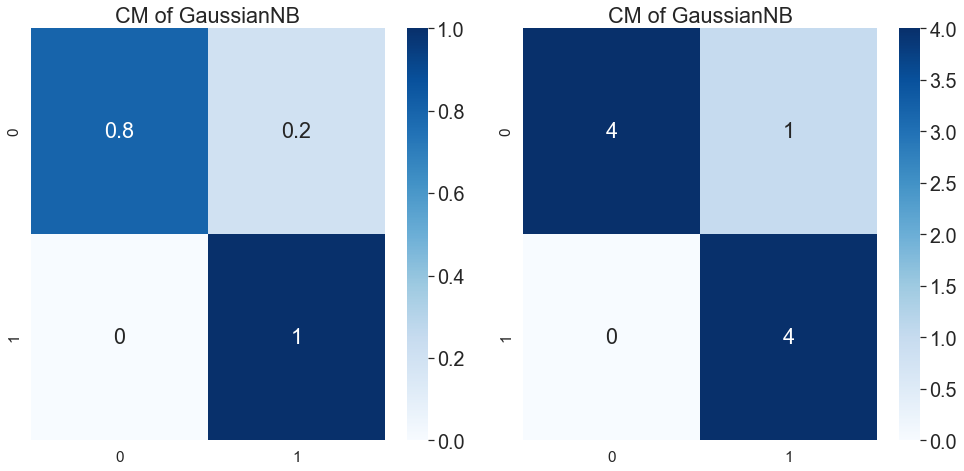

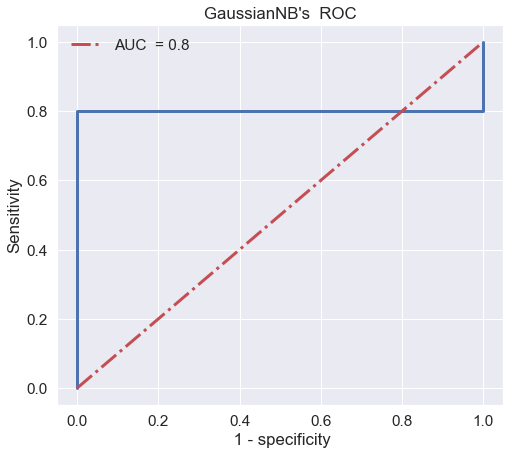

rand =  20
train  0.8148148148148148
test 0.8888888888888888


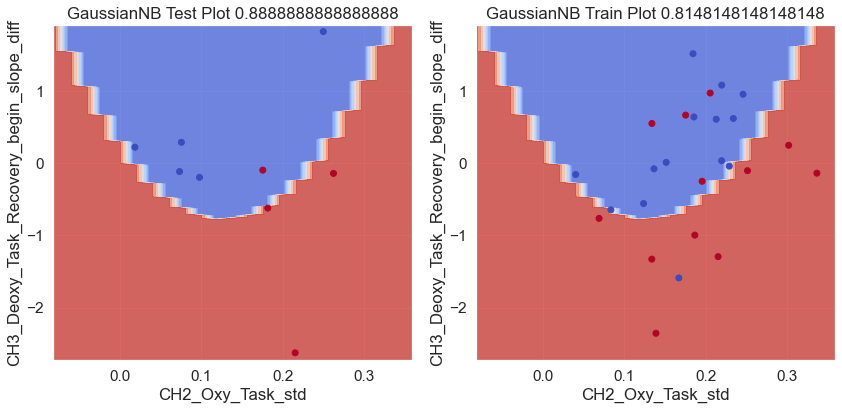

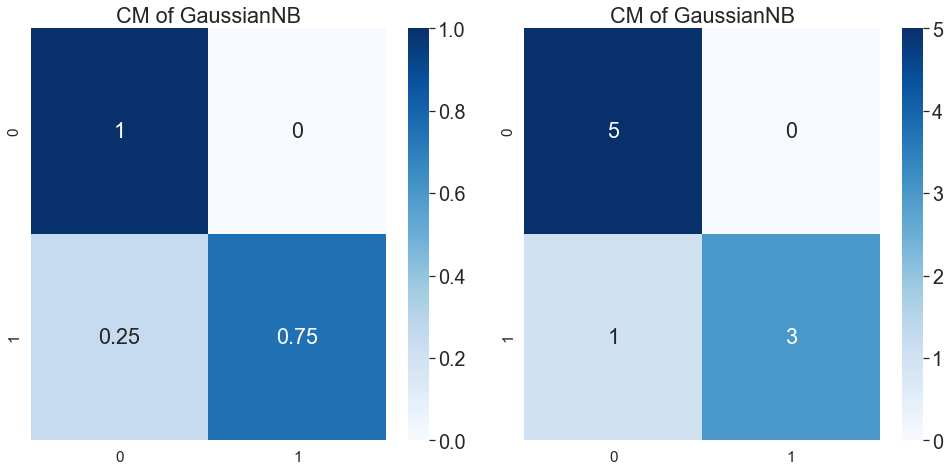

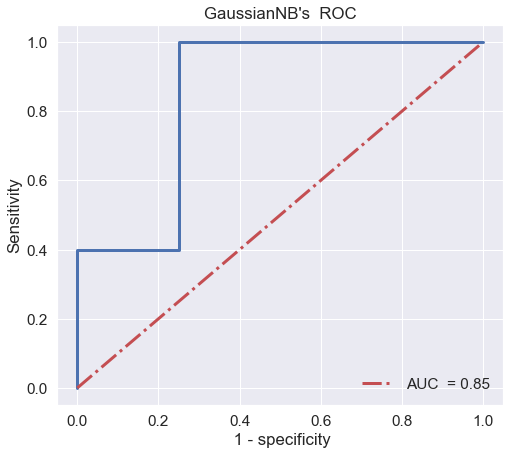

21 rand =  21
train  0.8148148148148148
test 0.8888888888888888


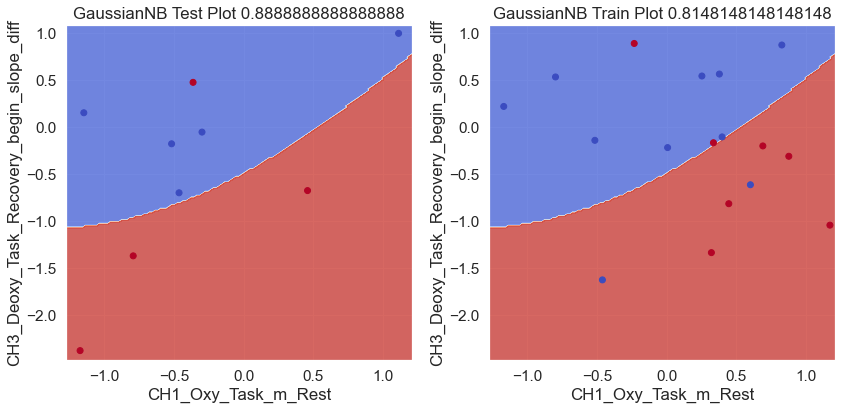

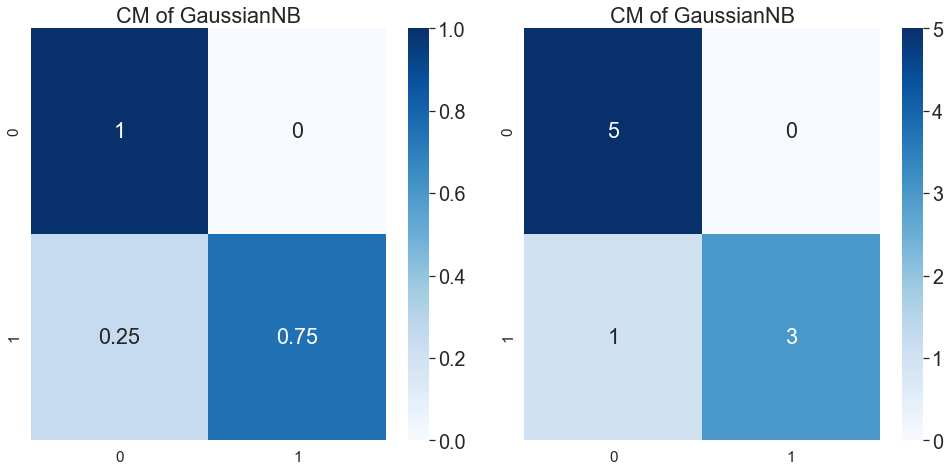

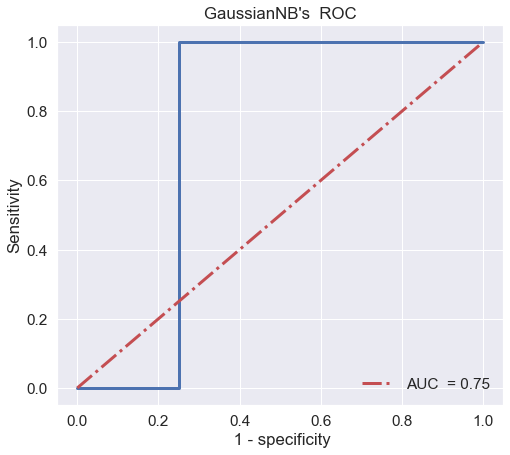

rand =  21
train  0.8148148148148148
test 0.8888888888888888


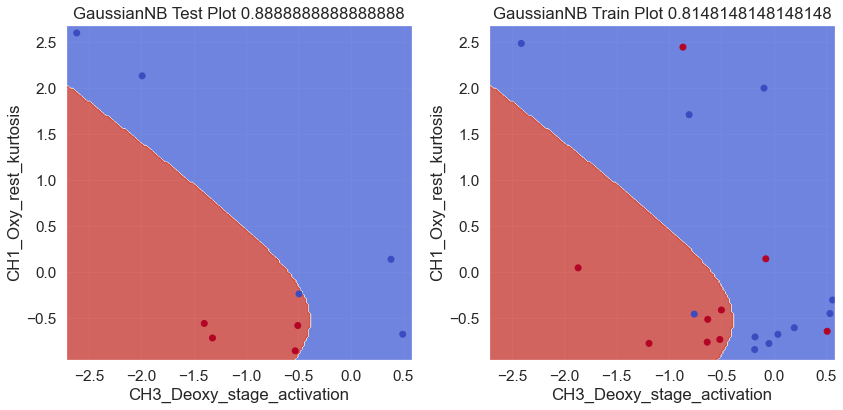

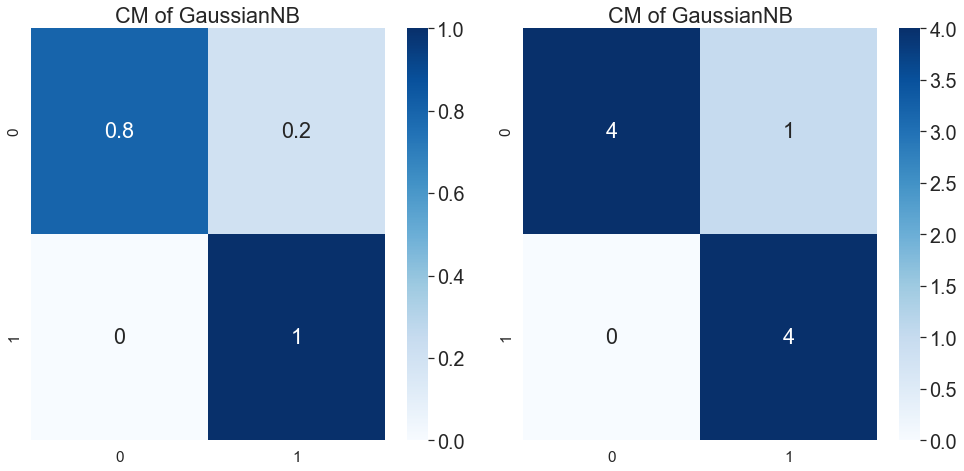

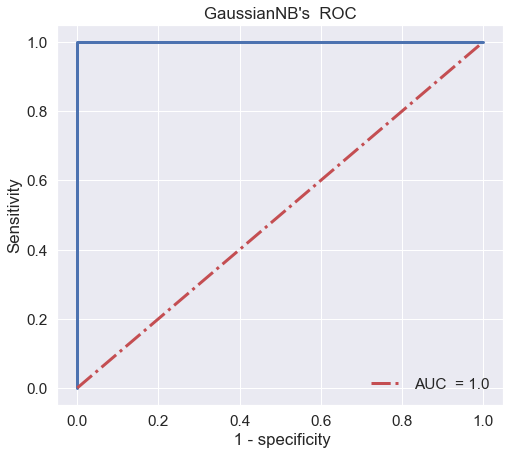

22 23 rand =  23
train  0.8148148148148148
test 0.8888888888888888


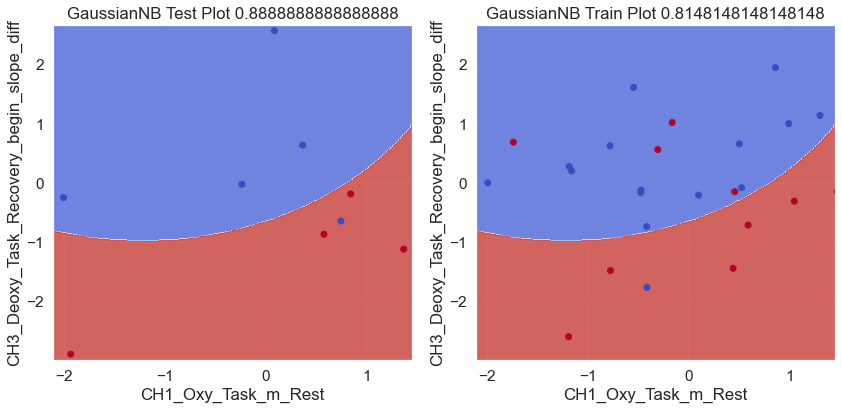

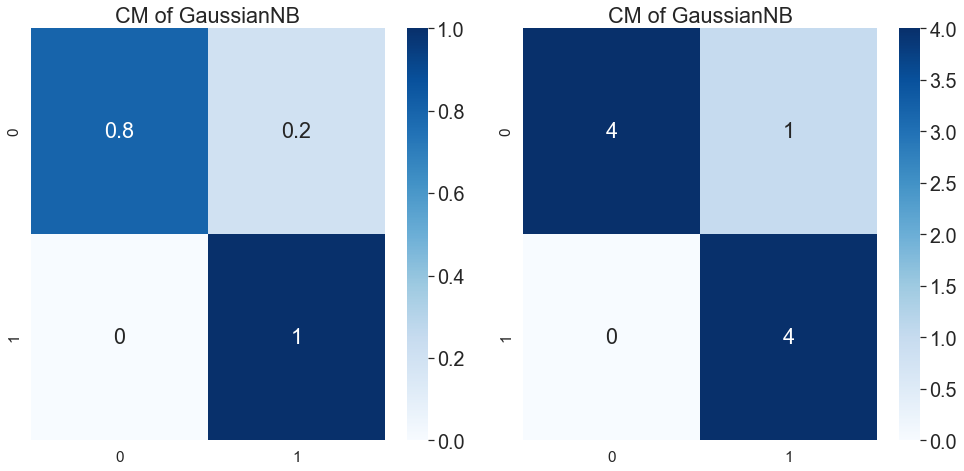

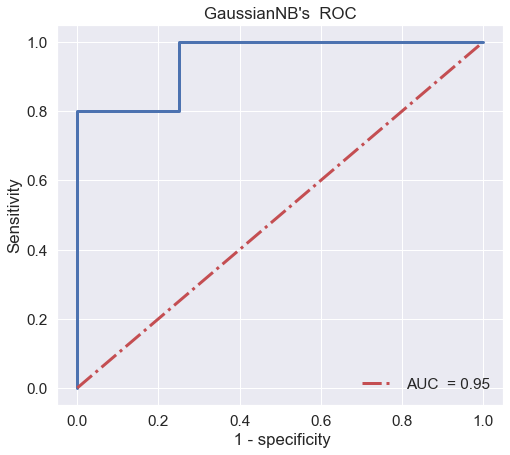

rand =  23
train  0.8148148148148148
test 0.8888888888888888


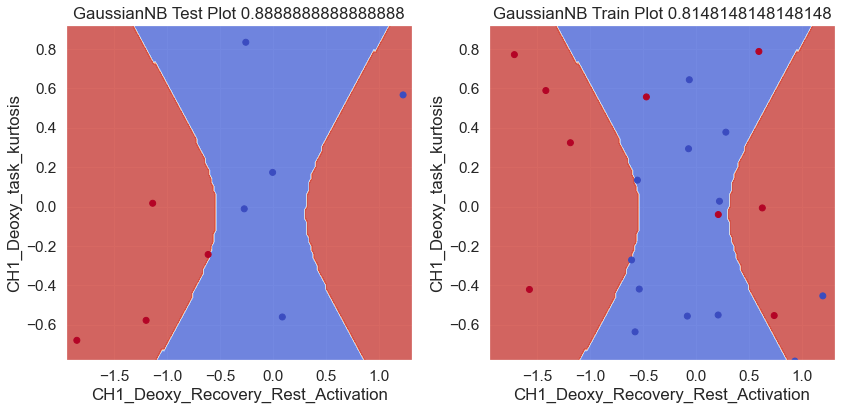

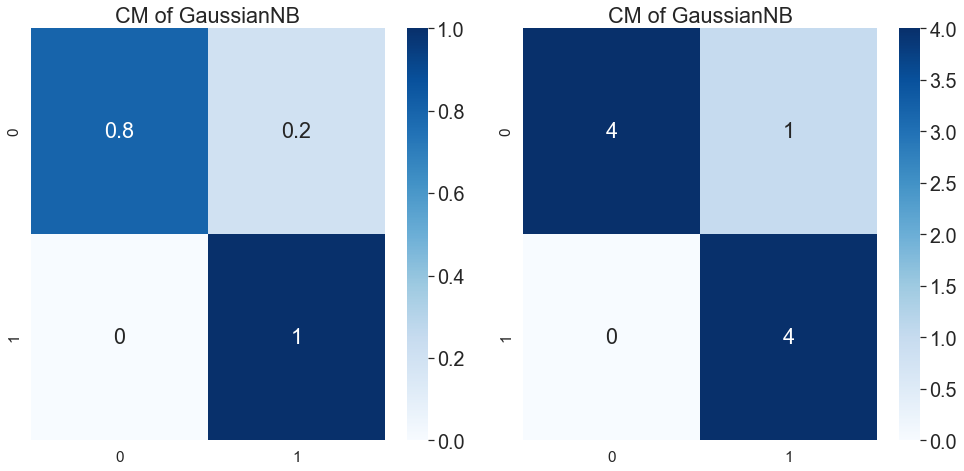

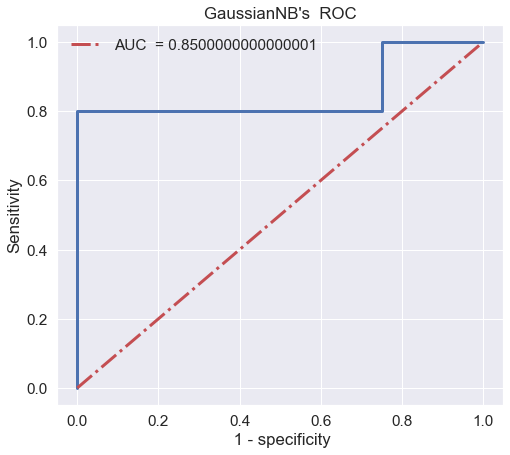

rand =  23
train  0.8148148148148148
test 0.8888888888888888


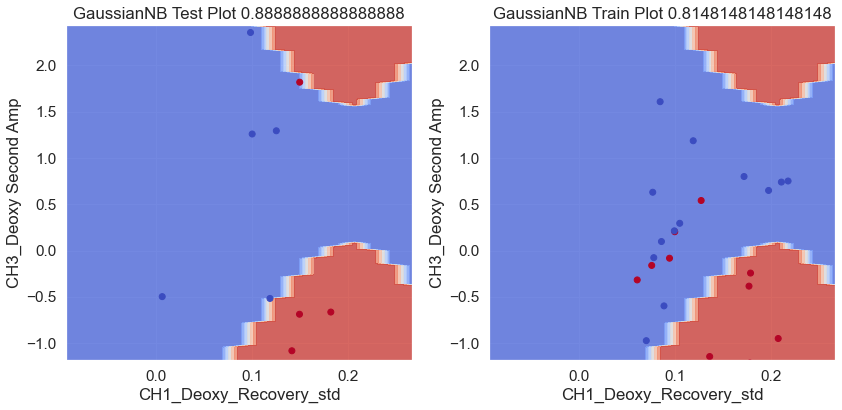

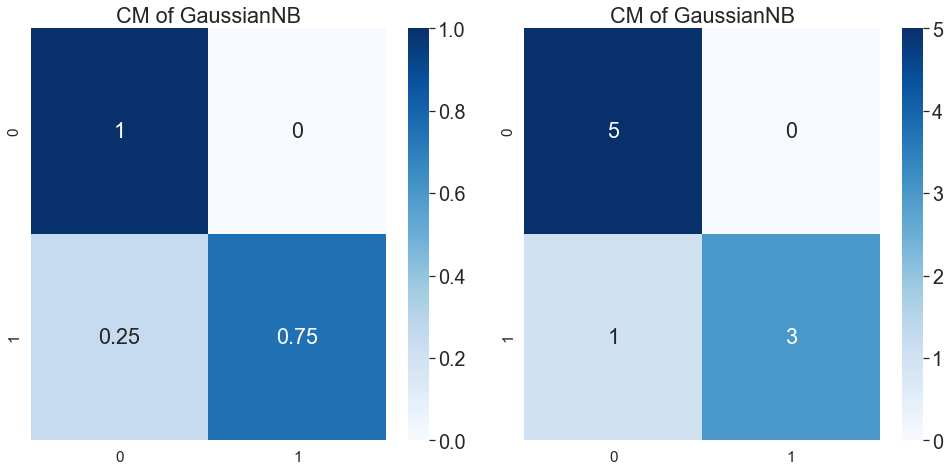

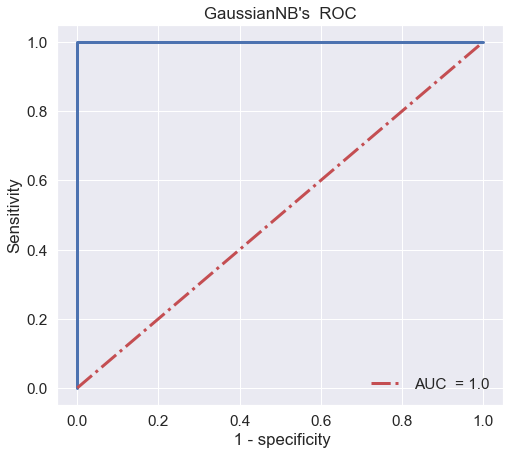

24 rand =  24
train  0.8148148148148148
test 0.8888888888888888


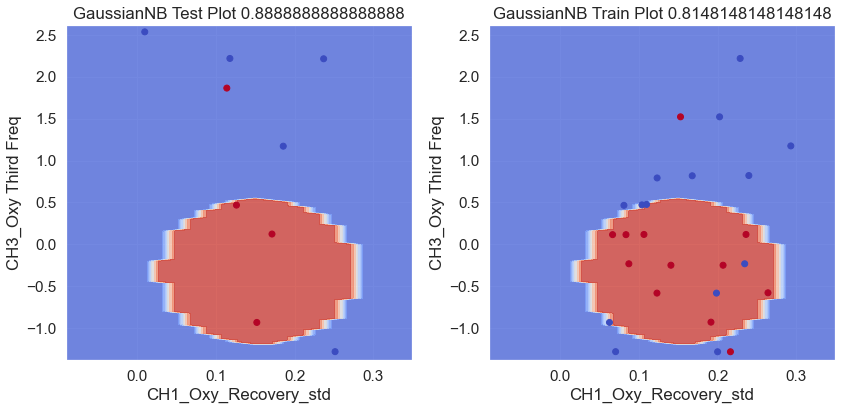

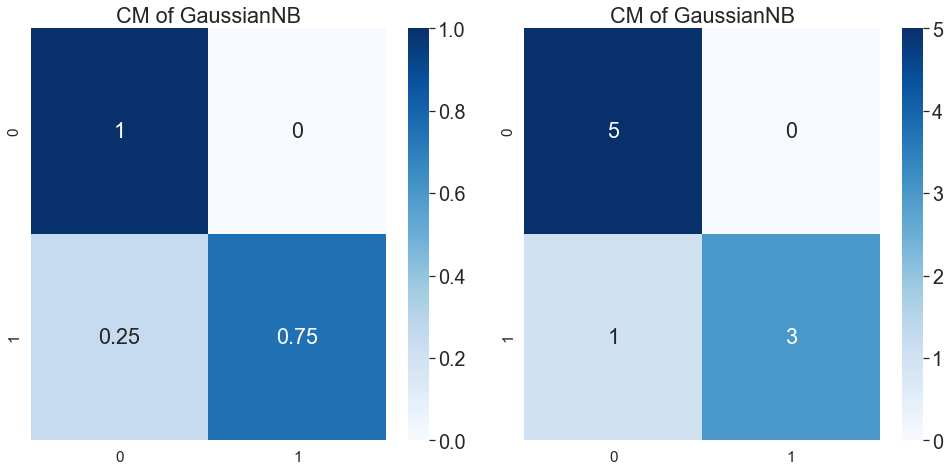

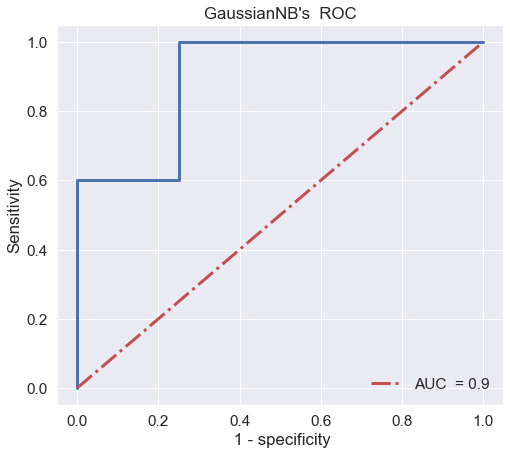

rand =  24
train  0.8148148148148148
test 0.8888888888888888


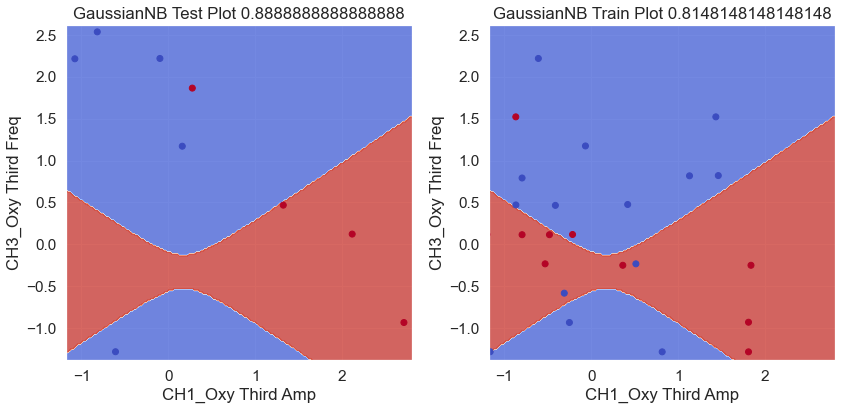

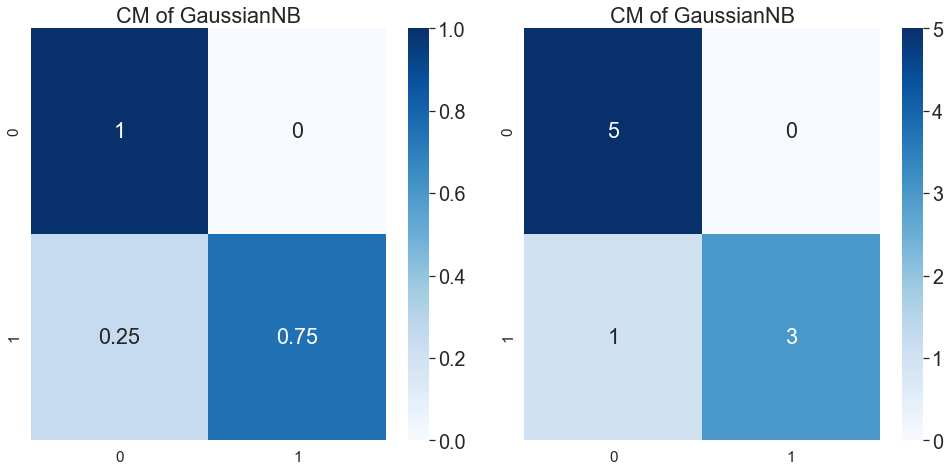

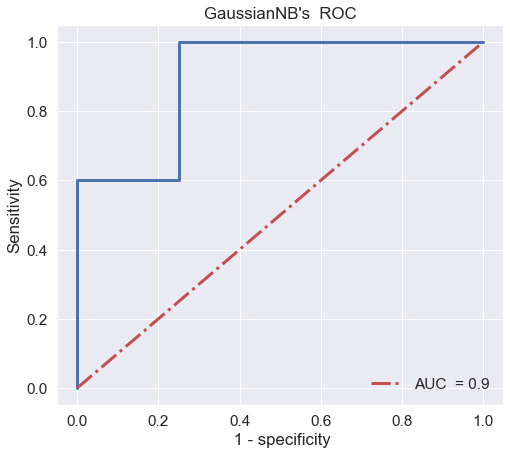

rand =  24
train  0.8148148148148148
test 0.8888888888888888


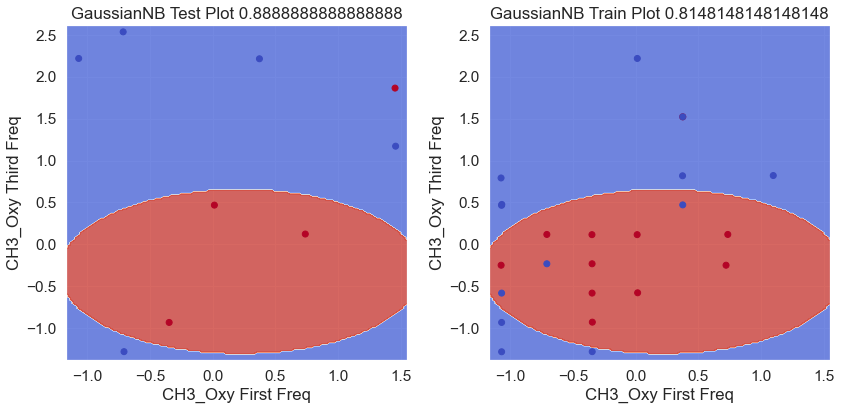

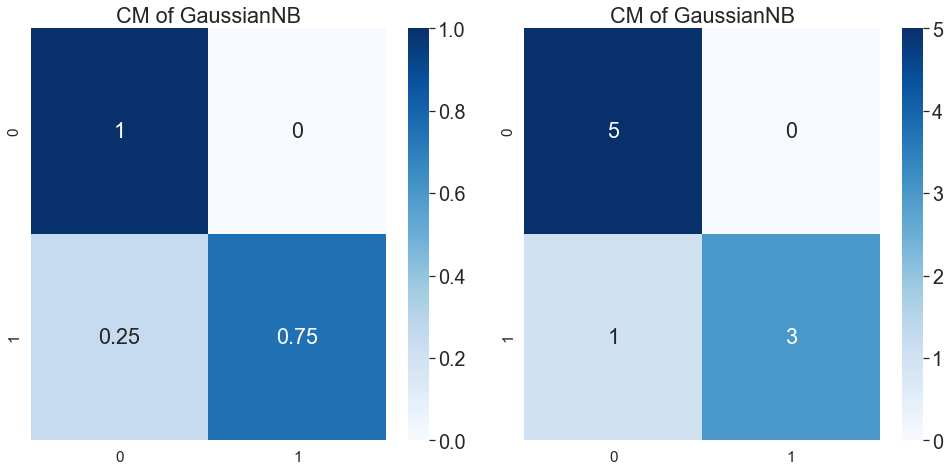

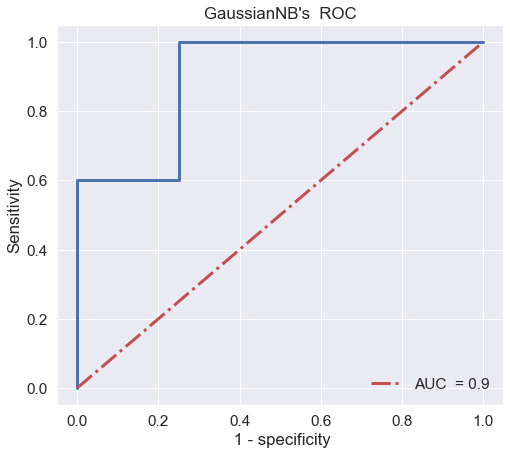

25 rand =  25
train  0.8148148148148148
test 0.8888888888888888


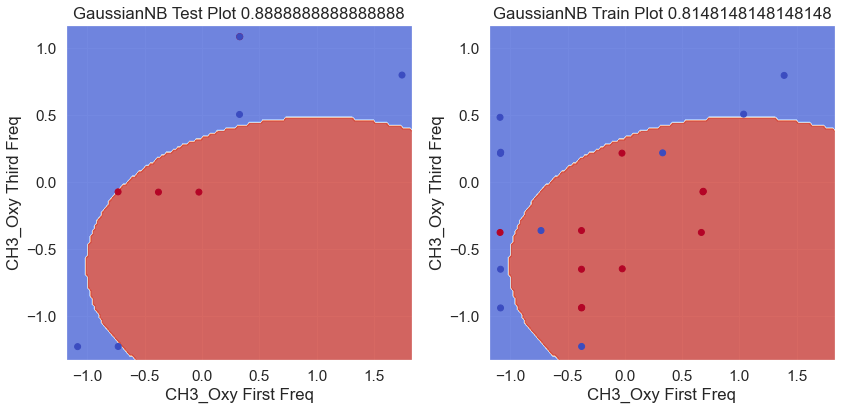

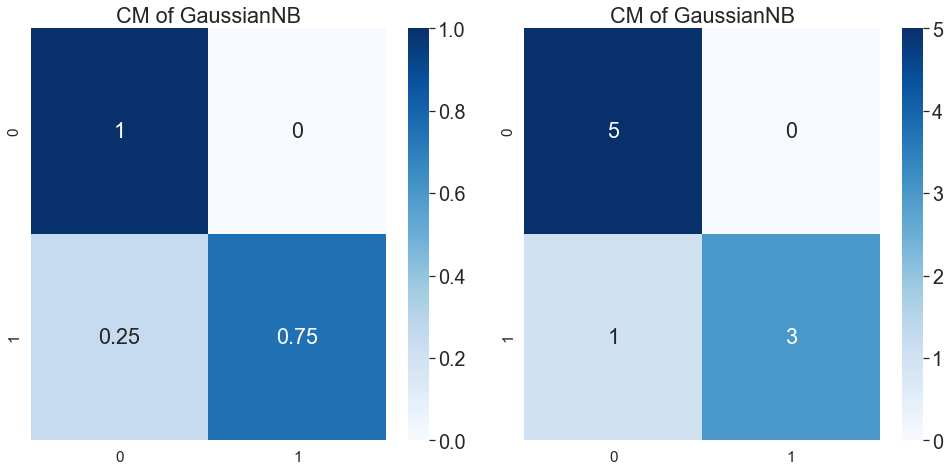

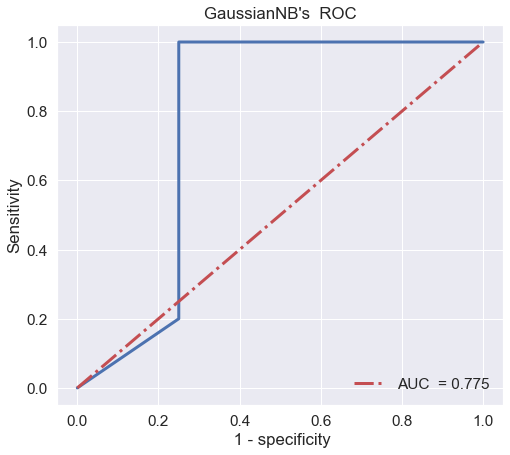

26 rand =  26
train  0.8148148148148148
test 0.8888888888888888


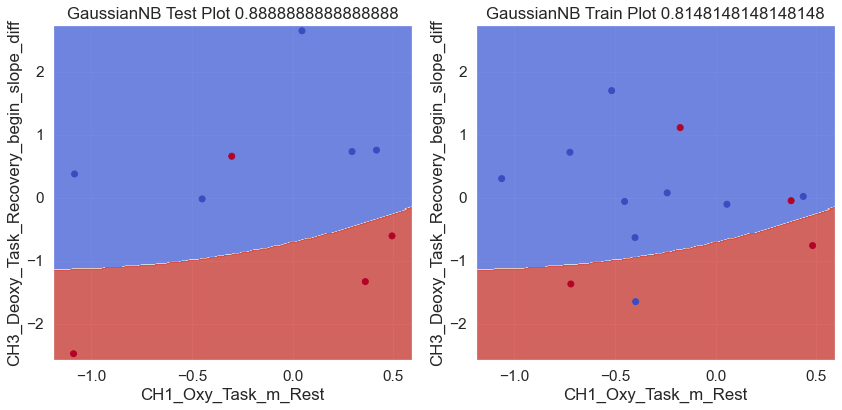

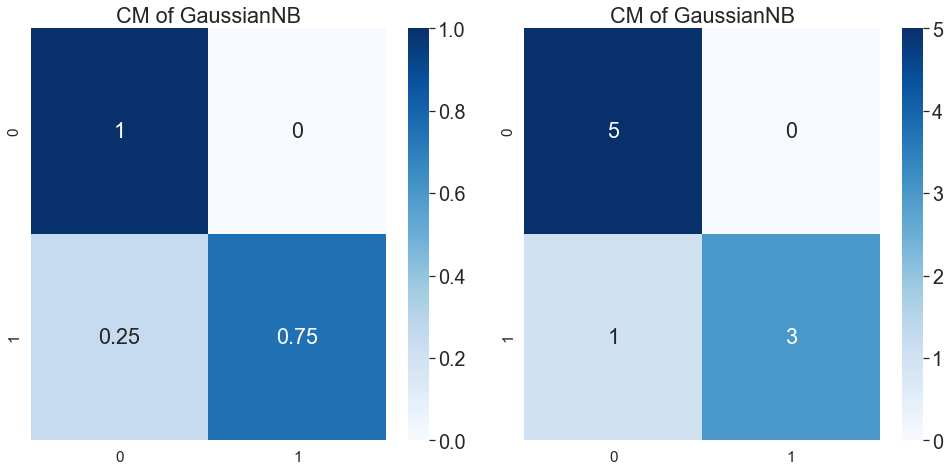

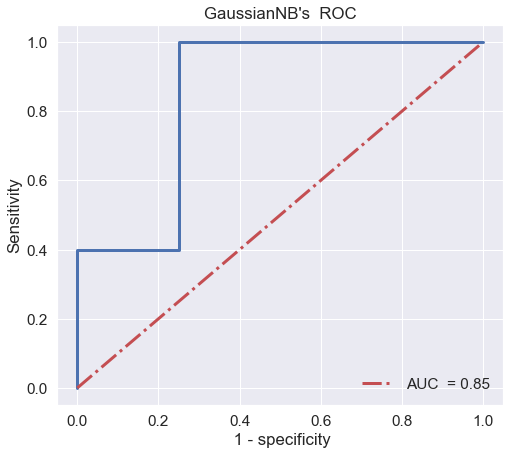

KeyboardInterrupt: 

In [101]:
for rand1 in range(200):
    print(rand1, end= " ")
    train_feas, train_labels, test_feas, test_labels = Starifieds(df_feature_cl, pure_feature["CBI_1_label"], random_state= rand1)
    train_feas = train_feas.drop(columns = "Name")
    test_feas = test_feas.drop(columns = "Name")

    coll = train_feas.columns
    all_col = combinations(coll, 2)
    all_cols = list(all_col)
   

    # ====================
    # print(train_feas.columns)
    for imm in train_feas.columns:
        if 'std' not in imm:     
            sd = StandardScaler()
            train_feasn = sd.fit_transform(train_feas[imm].values.reshape(-1,1))
            test_feasn = sd.transform(test_feas[imm].values.reshape(-1,1))

            train_feas[imm] = train_feasn
            test_feas[imm] = test_feasn

            # print('go')
            # print(f'trans {imm}')
    # print(test_feas)
    # ===================================

    for cols in all_cols:
        gb = GaussianNB()
        gb.fit(train_feas[list(cols)], train_labels)

        train_s = accuracy_score(train_labels, gb.predict(train_feas[list(cols)]))
        test_s = accuracy_score(test_labels, gb.predict(test_feas[list(cols)]))

        #print(train_s, test_s)
        #print(train_feas.iloc[:,rrf.get_support()].columns)

        if test_s  > 0.8 and train_s  > 0.8 and test_s < 1 and train_s < 1:
            print('rand = ', rand1)
            
            # print(train_feas.iloc[:,rrf.get_support()].columns)
            # colss = train_feas.iloc[:,rrf.get_support()].columns
            # print("train ", gc.best_score_)
            print('train ', train_s)
            print('test', test_s)
            # print("par = ", par)




            acc_plot(test_feas[list(cols)], test_labels, train_feas[list(cols)], train_labels, gb, bound= 0.1)
            condusion_m(test_feas[list(cols)], test_labels, gb)
            ROCP(test_feas[list(cols)], test_labels, gb, a= 0)

# 6.LDA全特徵 + 降維畫?? + plot

